# **Equipo 1**

Yocelin Ju√°rez Arroyo - A00819828

Luis Arturo Dan Fong - A01650672

Octavio Edelberto Reyes Torres - A00269987


# **Montar bases de datos y lectura de ellas**

####**Versionamiento**
**√öltima actualizaci√≥n**

Fecha: 14 octubre - 11:45pm

Por: Octavio

**Estatus:**
Disponible

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#folder_path = '/content/drive/My Drive/Proyecto Integrador/'
#folder_path = '/content/drive/My Drive/Proyecto Integrador/colab/'

#Octavio - Luis
folder_path = '/content/drive/My Drive/Proyecto Integrador/'

#Yocelin (owner)
#folder_path = '/content/drive/My Drive/Proyecto Integrador/Proyecto Integrador/'

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import gc

# Ruta del archivo de contactables de Egresados
ruta_archivo = folder_path + 'bases/contactables_EXATEC.csv'

# Leer el archivo Excel
df_contactables = pd.read_csv(ruta_archivo)


display(df_contactables.head())

In [ ]:
import warnings
warnings.filterwarnings("ignore")

**Categor√≠a de dominio** (categoria_dominio_correo)

**Descripci√≥n**: Variable categ√≥rica que clasifica los dominios de correo en: "Gen√©rico", "Corporativo", "Educativo", "Gobierno". Los dominios del Tec (e.g., "tec.mx", "exatec.tec.mx") se clasificar√°n como "Educativo"

**Justificaci√≥n**: Categorizar los correos electr√≥nicos en funci√≥n de si son corporativos, educativos, gubernamentales, o gen√©ricos puede ayudar a establecer un perfil m√°s claro del contacto. Identificar si un egresado usa un correo corporativo, del sector p√∫blico o un correo del Tec podr√≠a ser √∫til para adaptar la estrategia de comunicaci√≥n

In [ ]:
# Definir las categor√≠as de dominios
educativos = ['tec.mx', 'exatec.tec.mx', 'itesm.mx']
gobierno = ['gob.mx', 'senado.gob.mx']
gen√©ricos = ['gmail.com', 'hotmail.com', 'yahoo.com']

# Crear la funci√≥n de categorizaci√≥n
def categorizar_dominio(dominio):
    if dominio in educativos:
        return 'Educativo'
    elif dominio in gobierno:
        return 'Gobierno'
    elif dominio in gen√©ricos:
        return 'Gen√©rico'
    else:
        return 'Otros'

# Aplicar la funci√≥n a la columna 'contactable_dominio_correo'
df_contactables['categoria_dominio_correo'] = df_contactables['contactable_dominio_correo'].apply(categorizar_dominio)


#Eliminaci√≥n de variables
columnas_a_eliminar = ['contactable_dominio_correo']
df_contactables = df_contactables.drop(columns=columnas_a_eliminar)
display(df_contactables.columns)
#display(df_marketing.head())

In [ ]:
# Calcular el porcentaje de valores vac√≠os en cada columna
porcentaje_vacios = df_contactables.isnull().mean() * 100

# Filtrar solo las columnas que tienen valores vac√≠os
porcentaje_vacios = porcentaje_vacios[porcentaje_vacios > 0]

# Mostrar el porcentaje de vac√≠os
display(porcentaje_vacios)

**Preprocesamiento**:
La variable **contactable_estatus** solo tiene 2 valores: Ciclo anterior y ciclo actual, por ello se har√° num√©rica


In [ ]:
#ciclo anterior = 1
#ciclo actual = 2

# Convertir "ciclo anterior" a 1 y "ciclo actual" a 0
#df_contactables['ciclo_numerico'] = df_contactables['contactable_estatus'].map({'Ciclo Anterior': 1, 'Ciclo Actual': 2})

#Eliminar la variable contactable_estatus
columnas_a_eliminar = ['contactable_estatus', 'Unnamed: 3']
df_contactables = df_contactables.drop(columns=columnas_a_eliminar)


display(df_contactables.head())


In [ ]:
# Ruta del archivo con informaci√≥n del comportamiento de marketing de los egresados
ruta_archivo = folder_path + 'bases/MailCampana.csv'

# Leer el archivo Excel
df_marketing = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del archivo
display(df_marketing.head())

In [ ]:
# Calcular el porcentaje de valores vac√≠os en cada columna
porcentaje_vacios = df_marketing.isnull().mean() * 100

# Filtrar solo las columnas que tienen valores vac√≠os
porcentaje_vacios = porcentaje_vacios[porcentaje_vacios > 0]

# Mostrar el porcentaje de vac√≠os
display(porcentaje_vacios)

In [ ]:
# Mostrar un resumen de las variables categ√≥ricas y sus valores √∫nicos
categorical_columns = df_marketing.select_dtypes(include=['object', 'category']).columns

# Crear un df con el conteo de valores √∫nicos para cada columna categ√≥rica
categorical_summary = pd.DataFrame({
    'Variable': categorical_columns,
    'Cantidad de Valores Distintos': [df_marketing[col].nunique() for col in categorical_columns]
})

# Mostrar el resumen de variables categ√≥ricas
display(categorical_summary)


In [ ]:
# Eliminar variables que ya no se usan
del categorical_summary

# Forzar la recolecci√≥n de basura
gc.collect()


**Preprocesamiento**:

Las variables **object_id** y **Contacto ID** son un identificador local del egresado, tiene el mismo funcionamiento que IA_ID por ello se eliminar√°n.

In [ ]:
#Eliminaci√≥n de variables
columnas_a_eliminar = ['object_id', 'Contacto ID']
df_marketing = df_marketing.drop(columns=columnas_a_eliminar)
display(df_marketing.columns)
#display(df_marketing.head())

In [ ]:
# Ruta del archivo con informaci√≥n intereses, residencia, laborales, premios de los egresados
ruta_archivo =  folder_path +  'bases/Infoadicional.csv'

# Leer el archivo Excel
df_intereses = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del archivo
display(df_intereses.head())

In [ ]:
# Mostrar un resumen de las variables categ√≥ricas y sus valores √∫nicos
categorical_columns = df_intereses.select_dtypes(include=['object', 'category']).columns

# Crear un df con el conteo de valores √∫nicos para cada columna categ√≥rica
categorical_summary = pd.DataFrame({
    'Variable': categorical_columns,
    'Cantidad de Valores Distintos': [df_intereses[col].nunique() for col in categorical_columns]
})

# Mostrar el resumen de variables categ√≥ricas
display(categorical_summary)


In [ ]:
# Calcular el porcentaje de valores vac√≠os en cada columna
porcentaje_vacios = df_intereses.isnull().mean() * 100

# Filtrar solo las columnas que tienen valores vac√≠os
porcentaje_vacios = porcentaje_vacios[porcentaje_vacios > 0]

# Mostrar el porcentaje de vac√≠os
display(porcentaje_vacios)

**Preprocesamiento**:

La variable info_TIPO_DOMICILIO tiene un solo valor que es "Domicilio Local" y la tienen aquellos que poseen un domicilio, por ello se eliminar√°

La variable info_NUMERO_CELULAR tiene Si o No refiri√©ndose a si tiene celular o no, por ello se har√° binario

La variable info_SOCIAL_LINKEDIN tiene Si o No refiri√©ndose a si tiene linkedin o no, por ello se har√° binario

La variable info_EMPLEO_ACTUAL1[1-5] tiene Y o N refiri√©ndose a es empleo actual o no, por ello se har√° binario

Los premios que comparten son tecleados por el egresado, lo que significa que no est√° validado por ello se eliminar√° la columna pues no genera un valor

Las variables:
info_FECHA_PREMIO5	info_interes_EDUCACION	info_interes_TECNOLOGIA	info_interes_CIENCIA	info_interes_POLITICA	info_interes_SUSTENTABILIDAD	info_interes_HISTORIA	info_interes_ARTE	info_interes_ECONOMIA	info_interes_NEGOCIOS	info_interes_ORGANIZACIONES_SIN_FINES_LUCRO	info_interes_DEPORTES	info_interes_CULTURA	info_interes_VIAJES	info_interes_SALUD	info_interes_ANIMALES	info_interes_NUTRICION	info_interes_LIDERAZGO	info_interes_BIENESTAR	info_interes_ESCRITURA	info_interes_MODA	info_interes_HOGAR	info_interes_MUSICA

Tienen "Si" o son nullas, por ello se har√° binaria 1:0


Aunque las columnas de intereses tienne m√°s del 99% vac√≠o, se eliminan

In [ ]:
# Convertir "S√≠" a 1 y "No" a 0
df_intereses['tiene_numero_celular'] = df_intereses['info_NUMERO_CELULAR'].map({'S√≠': 1, 'No': 0})
df_intereses['tiene_linkedin'] = df_intereses['info_SOCIAL_LINKEDIN'].map({'S√≠': 1, 'No': 0})
df_intereses['es_empleo_actual'] = df_intereses['info_EMPLEO_ACTUAL1'].map({'Y': 1, 'N': 0})
df_intereses['es_empleo_actua2'] = df_intereses['info_EMPLEO_ACTUAL2'].map({'Y': 1, 'N': 0})
df_intereses['es_empleo_actua3'] = df_intereses['info_EMPLEO_ACTUAL3'].map({'Y': 1, 'N': 0})
df_intereses['es_empleo_actua4'] = df_intereses['info_EMPLEO_ACTUAL4'].map({'Y': 1, 'N': 0})
df_intereses['es_empleo_actua5'] = df_intereses['info_EMPLEO_ACTUAL5'].map({'Y': 1, 'N': 0})

#df_intereses['interes_EDUCACION'] = np.where(df_intereses['info_interes_EDUCACION'] == 'S√≠', 1, 0)
#df_intereses['interes_TECNOLOGIA'] = np.where(df_intereses['info_interes_TECNOLOGIA'] == 'S√≠', 1, 0)
#df_intereses['interes_CIENCIA'] = np.where(df_intereses['info_interes_CIENCIA'] == 'S√≠', 1, 0)
#df_intereses['interes_POLITICA'] = np.where(df_intereses['info_interes_POLITICA'] == 'S√≠', 1, 0)
#df_intereses['interes_SUSTENTABILIDAD'] = np.where(df_intereses['info_interes_SUSTENTABILIDAD'] == 'S√≠', 1, 0)
#df_intereses['interes_HISTORIA'] = np.where(df_intereses['info_interes_HISTORIA'] == 'S√≠', 1, 0)
#df_intereses['interes_ARTE'] = np.where(df_intereses['info_interes_ARTE'] == 'S√≠', 1, 0)
#df_intereses['interes_ECONOMIA'] = np.where(df_intereses['info_interes_ECONOMIA'] == 'S√≠', 1, 0)
#df_intereses['interes_NEGOCIOS'] = np.where(df_intereses['info_interes_NEGOCIOS'] == 'S√≠', 1, 0)
#df_intereses['interes_ORGANIZACIONES_SIN_FINES_LUCRO'] = np.where(df_intereses['info_interes_ORGANIZACIONES_SIN_FINES_LUCRO'] == 'S√≠', 1, 0)
#df_intereses['interes_DEPORTES'] = np.where(df_intereses['info_interes_DEPORTES'] == 'S√≠', 1, 0)
#df_intereses['interes_CULTURA'] = np.where(df_intereses['info_interes_CULTURA'] == 'S√≠', 1, 0)
#df_intereses['interes_VIAJES'] = np.where(df_intereses['info_interes_EDUCACION'] == 'S√≠', 1, 0)
#df_intereses['interes_SALUD'] = np.where(df_intereses['info_interes_SALUD'] == 'S√≠', 1, 0)
#df_intereses['interes_ANIMALES'] = np.where(df_intereses['info_interes_ANIMALES'] == 'S√≠', 1, 0)
#df_intereses['interes_NUTRICION'] = np.where(df_intereses['info_interes_NUTRICION'] == 'S√≠', 1, 0)
#df_intereses['interes_LIDERAZGO'] = np.where(df_intereses['info_interes_LIDERAZGO'] == 'S√≠', 1, 0)
#df_intereses['interes_BIENESTAR'] = np.where(df_intereses['info_interes_BIENESTAR'] == 'S√≠', 1, 0)
#df_intereses['interes_ESCRITURA'] = np.where(df_intereses['info_interes_ESCRITURA'] == 'S√≠', 1, 0)
#df_intereses['interes_MODA'] = np.where(df_intereses['info_interes_MODA'] == 'S√≠', 1, 0)
#df_intereses['interes_HOGAR'] = np.where(df_intereses['info_interes_HOGAR'] == 'S√≠', 1, 0)
#df_intereses['interes_MUSICA'] = np.where(df_intereses['info_interes_MUSICA'] == 'S√≠', 1, 0)


#Eliminaci√≥n de variables
columnas_a_eliminar = ['info_TIPO_DOMICILIO', 'info_NUMERO_CELULAR', 'info_SOCIAL_LINKEDIN', 'info_EMPLEO_ACTUAL1', 'info_EMPLEO_ACTUAL2', 'info_EMPLEO_ACTUAL3', 'info_EMPLEO_ACTUAL4', 'info_EMPLEO_ACTUAL5', 'info_TIPO_PREMIO1', 'info_TIPO_PREMIO2', 'info_TIPO_PREMIO3', 'info_TIPO_PREMIO4', 'info_TIPO_PREMIO5', 'info_interes_EDUCACION',
                      'info_interes_TECNOLOGIA', 'info_interes_CIENCIA', 'info_interes_POLITICA', 'info_interes_SUSTENTABILIDAD', 'info_interes_HISTORIA', 'info_interes_ARTE', 'info_interes_ECONOMIA', 'info_interes_NEGOCIOS',
                       'info_interes_ORGANIZACIONES_SIN_FINES_LUCRO', 'info_interes_DEPORTES', 'info_interes_CULTURA', 'info_interes_VIAJES', 'info_interes_SALUD', 'info_interes_ANIMALES', 'info_interes_NUTRICION',
                       'info_interes_LIDERAZGO', 'info_interes_BIENESTAR', 'info_interes_ESCRITURA', 'info_interes_MODA', 'info_interes_HOGAR', 'info_interes_MUSICA']

df_intereses = df_intereses.drop(columns=columnas_a_eliminar)
display(df_intereses.columns)
#display(df_marketing.head())

In [ ]:
# Eliminar variables que ya no se usan
del categorical_summary

# Forzar la recolecci√≥n de basura
gc.collect()


In [ ]:
# Ruta del archivo con informaci√≥n escolar de los egresados
ruta_archivo = folder_path +  'bases/IA_BaseEXATEC_entregada.csv'

# Leer el archivo Excel
df_escolar = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del archivo
display(df_escolar.head())

##Revisemos los valores √∫nicos de cada atributo

In [ ]:
# Mostrar un resumen de las variables categ√≥ricas y sus valores √∫nicos
categorical_columns = df_escolar.select_dtypes(include=['object', 'category']).columns

# Crear un df con el conteo de valores √∫nicos para cada columna categ√≥rica
categorical_summary = pd.DataFrame({
    'Variable': categorical_columns,
    'Cantidad de Valores Distintos': [df_escolar[col].nunique() for col in categorical_columns]
})

# Mostrar el resumen de variables categ√≥ricas
display(categorical_summary)

Como el Estado ofrece mayor valor para el modelo, las ciudades se eliminar√°n, adem√°s que es un campo abierto.

In [ ]:
#Eliminar ciudades
#Eliminaci√≥n de variables
columnas_a_eliminar = ['base_CIUDAD_RESIDENCIA', 'base_CIUDADNACIMIENTO']
df_escolar = df_escolar.drop(columns=columnas_a_eliminar)
display(df_escolar.columns)

##Estandarizamos la columna 'base_a√±o nac' al formato num√©rico.

Mostramos el total de valores diferentes encontrando que tenemos valores en formato numerico y en formato texto.

In [ ]:
display(df_escolar['base_a√±o nac'].unique())

In [ ]:
# Intentamos convertir todos los valores de la columna "base_a√±o nac" a n√∫meros, errores se reemplazan por NaN
df_escolar["base_a√±o nac"] = pd.to_numeric(df_escolar["base_a√±o nac"], errors='coerce')

# Calculamos la media aritm√©tica de la columna "base_a√±o nac", ignorando los NaN
media_anio = df_escolar["base_a√±o nac"].mean()

# Reemplazamos los valores NaN con la media aritm√©tica
df_escolar["base_a√±o nac"].fillna(media_anio, inplace=True)

# Reemplazamos los valores mayores a 2008 por la media aritm√©tica
df_escolar.loc[df_escolar["base_a√±o nac"] > 2008, "base_a√±o nac"] = media_anio

# Convertimos los valores restantes a enteros
df_escolar["base_a√±o nac"] = df_escolar["base_a√±o nac"].astype(int)

# Mostramos el resultado
display(df_escolar['base_a√±o nac'].unique())

##Revisar si existen pa√≠ses escritos de distintas formas

In [ ]:
display(df_escolar['base_PAIS_RESIDENCIA'].unique())

In [ ]:
!pip install unidecode

In [ ]:
from unidecode import unidecode
# Create a pandas Series for easier manipulation

countries_series = df_escolar['base_PAIS_RESIDENCIA']

# 1. Standardize Case

countries_series = countries_series.str.lower()

# 2. Handle Accents and Special Characters

countries_series = countries_series.apply(lambda x: unidecode(str(x)) if pd.notna(x) else x)

# 3. Create a mapping of normalized names to a chosen standard# (You'll need to decide on the preferred names - I'm using English here)

country_mapping = {
'republica dominicana': 'Dominican Republic',
'mexico': 'Mexico',
'estados unidos de america': 'United States',
'venezuela': 'Venezuela',
'costa rica': 'Costa Rica',
'honduras': 'Honduras',
'panama': 'Panama',
'nicaragua': 'Nicaragua',
'canada': 'Canada',
'colombia': 'Colombia',
'guatemala': 'Guatemala',
'el salvador': 'El Salvador',
'francia': 'France',
'united states': 'United States',
'espana': 'Spain',
'ecuador': 'Ecuador',
'bolivia': 'Bolivia',
'belgica': 'Belgium',
'taiwan': 'Taiwan',
'suiza': 'Switzerland',
'brasil': 'Brazil',
'puerto rico': 'Puerto Rico',
'australia': 'Australia',
'italia': 'Italy',
'japon': 'Japan',
'peru': 'Peru',
'suecia': 'Sweden',
'spain': 'Spain',
'canada': 'Canada',
'chile': 'Chile',
'libano': 'Lebanon',
'paises bajos': 'Netherlands',
'israel': 'Israel',
'alemania': 'Germany',
'reino unido': 'United Kingdom',
'uruguay': 'Uruguay',
'corea del sur': 'South Korea',
' ': np.nan,  # Replace empty strings with NaN'japan': 'Japan',
'austria': 'Austria',
'singapur': 'Singapore',
'ireland': 'Ireland',
'qatar': 'Qatar',
'united kingdom': 'United Kingdom',
'filipinas': 'Philippines',
'finlandia': 'Finland',
'dinamarca': 'Denmark',
'emiratos arabes unidos': 'United Arab Emirates',
'argentina': 'Argentina',
'republica popular china': 'China',
'china': 'China',
'germany': 'Germany',
'hong kong': 'Hong Kong',
'cyprus': 'Cyprus',
'netherlands': 'Netherlands',
'noruega': 'Norway',
'switzerland': 'Switzerland',
'nueva zelandia': 'New Zealand',
'polonia': 'Poland',
'republica checa': 'Czech Republic',
'arabia saudita': 'Saudi Arabia',
'france': 'France',
'sweden': 'Sweden',
'rusia': 'Russia',
'hungria': 'Hungary',
'portugal': 'Portugal',
'irlanda': 'Ireland',
'guadalupe': 'Guadeloupe',
'islas virgenes britanicas': 'British Virgin Islands',
'tanzania': 'Tanzania',
'estonia': 'Estonia',
'brazil': 'Brazil',
'turquia': 'Turkey',
'luxembourg': 'Luxembourg',
'india': 'India',
'belice': 'Belize',
'haiti': 'Haiti',
'malasia': 'Malaysia',
'trinidad y tobago': 'Trinidad and Tobago',
'united arab emirates': 'United Arab Emirates',
'eslovaquia': 'Slovakia',
'finland': 'Finland',
'ukraine': 'Ukraine',
'nigeria': 'Nigeria',
'djibuti': 'Djibouti',
'paraguay': 'Paraguay',
'denmark': 'Denmark',
'italy': 'Italy',
'norway': 'Norway',
'czech republic': 'Czech Republic',
'south korea': 'South Korea',
'peru': 'Peru',
'xxx': np.nan, # Assuming 'xxx' is an invalid entry
}

# 4. Apply the mapping to your DataFrame column

df_escolar['base_PAIS_RESIDENCIA']= countries_series.map(country_mapping)
df_escolar['base_PAISNACIMIENTO']= countries_series.map(country_mapping)


In [ ]:
display(df_escolar['base_PAIS_RESIDENCIA'].unique())

##Realizar limpieza de nombres de estado


In [ ]:
display(df_escolar['base_ESTADO_RESIDENCIA'].unique())

In [ ]:
import unicodedata

# Diccionario para normalizar nombres de estados y regiones
estado_equivalencias = {
    # M√©xico
    'nuevo leon': 'Nuevo Le√≥n', 'cdmx': 'CDMX',
    'distrito federal': 'CDMX', 'estado de mexico': 'Edomex',
    'mexico city': 'CDMX', 'mexico df': 'CDMX',
    'baja california sur': 'Baja California Sur', 'baja california': 'Baja California',
    'queretaro': 'Quer√©taro', 'san luis potosi': 'San Luis Potos√≠',
    'guadalajara': 'Guadalajara', 'yucatan': 'Yucat√°n',
    'veracruz': 'Veracruz de Ignacio de la Llave', 'michoacan': 'Michoac√°n',
    # Estados Unidos
    'texas': 'Texas', 'california': 'California', 'washington': 'Washington',
    'florida': 'Florida', 'new york': 'New York', 'arizona': 'Arizona',
    'louisiana': 'Louisiana', 'illinois': 'Illinois', 'georgia': 'Georgia',
    'virginia': 'Virginia', 'north carolina': 'North Carolina',
    'west virginia': 'West Virginia', 'missouri': 'Missouri', 'ohio': 'Ohio',
    'michigan': 'Michigan', 'oregon': 'Oregon', 'minnesota': 'Minnesota',
    'colorado': 'Colorado', 'nevada': 'Nevada', 'utah': 'Utah',
    'alabama': 'Alabama', 'arkansas': 'Arkansas', 'kansas': 'Kansas',
    'new jersey': 'New Jersey', 'connecticut': 'Connecticut',
    # Canad√°
    'ontario': 'Ontario', 'quebec': 'Quebec', 'alberta': 'Alberta',
    'british columbia': 'British Columbia', 'nova scotia': 'Nova Scotia',
    # Am√©rica Latina
    'guatemala': 'Guatemala', 'san salvador': 'El Salvador',
    'panama': 'Panam√°', 'bogota': 'Bogot√°', 'buenos aires': 'Buenos Aires',
    'lima': 'Lima', 'montevideo': 'Montevideo', 'santa cruz': 'Santa Cruz',
    'cochabamba': 'Cochabamba', 'antofagasta': 'Antofagasta', 'havana': 'Habana',
    # Europa
    'madrid': 'Madrid', 'cataluna': 'Catalu√±a', 'andalucia': 'Andaluc√≠a',
    'valencia': 'Valencia', 'galicia': 'Galicia', 'lombardy': 'Lombardy',
    'bavaria': 'Baviera', 'berlin': 'Berl√≠n', 'hamburg': 'Hamburgo',
    'zurich': 'Zurich', 'vienna': 'Viena', 'lisbon': 'Lisboa',
    # Asia y Ocean√≠a
    'tokyo': 'Tokio', 'hong kong': 'Hong Kong', 'new south wales': 'New South Wales',
    'queensland': 'Queensland', 'auckland': 'Auckland',
    # Otros
    'santiago': 'Santiago', 'region metropolitana de santia': 'Santiago',
    'distrito nacional': 'Distrito Nacional', 'xxx': 'Indefinido',
    ' ': 'Indefinido'
}

# Funci√≥n para eliminar acentos y normalizar cadenas
def normalizar_string(s):
    if pd.isna(s):  # Manejar NaN
        return s
    s = str(s).strip().lower()  # Convertir a min√∫sculas y eliminar espacios
    s = ''.join((c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn'))  # Eliminar acentos
    return s

# Funci√≥n para normalizar los nombres de estados o regiones
def normalizar_estados(df, columna, diccionario):
    df[columna] = df[columna].apply(normalizar_string)  # Primero normalizar las cadenas
    df[columna] = df[columna].replace(diccionario)  # Luego aplicar el diccionario de equivalencias
    return df

# E#
#data = {'base_ESTADO_RESIDENCIA': ['Nuevo Leon', 'CDMX', 'Queretaro', 'nuevo leon', np.nan, 'Ciudad de M√©xico', 'Veracruz de Ignacio de la Llave', 'Michoacan', 'San Luis Potosi']}
#df_escolar = pd.DataFrame(data)

# Aplicar la normalizaci√≥n
df_escolar = normalizar_estados(df_escolar, 'base_ESTADO_RESIDENCIA', estado_equivalencias)
df_escolar = normalizar_estados(df_escolar, 'base_ESTADONACIMIENTO', estado_equivalencias)

# Verificar el resultado
display(df_escolar[['base_ESTADO_RESIDENCIA']])

In [ ]:
display(df_escolar['base_ESTADO_RESIDENCIA'].unique())

##Homologar formato de siglas del programa

In [ ]:
display(df_escolar['base_SIGLASDELPROGRAMA'].unique())

In [ ]:
import re
# Funci√≥n para limpiar las siglas: eliminar espacios, n√∫meros y dejar solo las primeras letras
def limpiar_siglas(siglas):
 if isinstance(siglas, str):
# Verifica si es una cadena# Eliminar n√∫meros y espacios, luego mantener solo las primeras letras
  return re.sub(r'[^A-Za-z]', '', siglas)
# Eliminar todo lo que no sea letras
 return siglas
# Devuelve el valor original si no es cadena

# Aplicar la funci√≥n a la columna 'base_SIGLASDELPROGRAMA'
df_escolar['base_SIGLASDELPROGRAMA'] = df_escolar['base_SIGLASDELPROGRAMA'].apply(limpiar_siglas)

In [ ]:
display(df_escolar['base_SIGLASDELPROGRAMA'].unique())

In [ ]:
# Mostrar un resumen de las variables categ√≥ricas y sus valores √∫nicos
categorical_columns = df_escolar.select_dtypes(include=['object', 'category']).columns

# Crear un df con el conteo de valores √∫nicos para cada columna categ√≥rica
categorical_summary = pd.DataFrame({
    'Variable': categorical_columns,
    'Cantidad de Valores Distintos': [df_escolar[col].nunique() for col in categorical_columns]
})

# Mostrar el resumen de variables categ√≥ricas
display(categorical_summary)

In [ ]:
#columnas_vacias = df_escolar.columns[df_escolar.isna().all()].tolist()
#display(df_escolar.isna().sum())
# Calcular el porcentaje de valores vac√≠os en cada columna
porcentaje_vacios = df_escolar.isnull().mean() * 100

# Filtrar solo las columnas que tienen valores vac√≠os
porcentaje_vacios = porcentaje_vacios[porcentaje_vacios > 0]

# Mostrar el porcentaje de vac√≠os
display(porcentaje_vacios)


**Preprocesamiento**:

La variable pa√≠s de nacimiento se pude obtener la nacionalidad, habr√° excepciones que se hayan nauralizado pero son pocos, po ello se eliminar√° el pa√≠s de nacimiento

La variable base_ha_actualizado_tel√©fono es Si o no, por ello se cambiar√° a Si=1 No=0

La variable base_FECHAGRADUACION tiene toda la fecha, sin embargo existe otra con el a√±o y es lo importante, por ello se borrar√°

La variable base_PROGRAMAACADEMICO es la descripci√≥n de la variable SIGLAS del programa, por ello la descripci√≥n se eliminar√°

La variable base_NOMBRECAMPUS es la descripcion de la variable ICAMPUS, por ello la descripci√≥n se borrar√°

La variable base_NIVELes la descripci√≥n de la variable NIVELACADEMICO por ello se eliminar√°, igual que la variable Nivel_general

La variable base_RESPONSABILIDADES es un campo abierto y se llen√≥ con informaci√≥n distinta, por ello no genera valor se eliminar√°

Las variables base_ASOCIACIONES	base_PUESTOASOCIACIONES	base_PREMIOSRECONOCIMIENTOS tienen el 99.9% vac√≠os, por ello se eliminar√°n y la de intereses 96% pero ya tenemos esa informaci√≥n en otro df

La variable base_HizoPrepaTec es Si o no, por ello se cambiar√° a Si=1 No=0

In [ ]:
#1 y 9
df_escolar['no_contactar'] = np.where(df_escolar['base_NOCONTACTAR'] == 1, 1, 0)
df_escolar['ha_actualizado_tel√©fono'] = df_escolar['base_ha_actualizado_tel√©fono'].map({'S√≠': 1, 'No': 0})
df_escolar['HizoPrepaTec'] = df_escolar['base_HizoPrepaTec'].map({'S√≠': 1, 'No': 0})

#Eliminaci√≥n de variables
columnas_a_eliminar = ['base_PAISNACIMIENTO', 'base_NOCONTACTAR', 'base_ha_actualizado_tel√©fono', 'base_FECHAGRADUACION', 'base_PROGRAMAACADEMICO', 'base_NOMBRECAMPUS', 'base_NIVEL', 'Nivel_general', 'base_RESPONSABILIDADES', 'base_ASOCIACIONES',	'base_PUESTOASOCIACIONES',	'base_PREMIOSRECONOCIMIENTOS',
                       'base_INTERESES', 'base_HizoPrepaTec']
df_escolar = df_escolar.drop(columns=columnas_a_eliminar)
display(df_escolar.columns)
#display(df_marketing.head())

display(df_escolar.head())

# Eliminar variables que ya no se usan
del categorical_summary

# Forzar la recolecci√≥n de basura
gc.collect()

In [ ]:
# Ruta del archivo con informaci√≥n egresados suscritos a un medio de comunicaci√≥n
ruta_archivo =  folder_path + 'bases/egresados_suscritos_medios.csv'

# Leer el archivo Excel
df_suscritos = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del archivo
display(df_suscritos.head())

In [ ]:
# Ruta del archivo con informaci√≥n de egresados que participaron en la ultima campa√±a
ruta_archivo =  folder_path + 'bases/giveaway_actualizacion.csv'

# Leer el archivo Excel
df_giveaway = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del archivo
display(df_giveaway.head())

In [ ]:
# Ruta del archivo con informaci√≥n de egresados que participaron en la ultima campa√±a
ruta_archivo =  folder_path + 'bases/EXA_Evento_EXATEC_asistentes.csv'

# Leer el archivo Excel
df_eventos = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del archivo
display(df_eventos.head())

**Preprocesamiento:**

Las variables: evento_StartDateTime, evento_Status,evento_AttendeeId, evento_AttendeeID es informaci√≥n interna del evento por ello no generan valor y se eliminar√°n

La variable Ticket Type: Item Name se repite con el event name, por ello se eliminar√°

La variable evento_attendee_rol tiene la informaci√≥n que en la base principal se repite, por ello se eliminar√°

In [ ]:
#Eliminaci√≥n de variables
columnas_a_eliminar = ['evento_StartDateTime', 'evento_Status', 'Ticket Type: Item Name', 'evento_AttendeeId', 'evento_AttendeeID', 'evento_attendee_rol']
df_eventos = df_eventos.drop(columns=columnas_a_eliminar)
display(df_eventos.columns)
#display(df_marketing.head())

display(df_eventos.head())

# Forzar la recolecci√≥n de basura
gc.collect()

In [ ]:
# Uniremos los DataFrames utilizando 'IA_ID' como clave
df_unido = pd.merge(df_contactables, df_marketing, on='IA_ID', how='inner')
df_unido = pd.merge(df_unido, df_intereses, on='IA_ID', how='inner')
df_unido = pd.merge(df_unido, df_escolar, on='IA_ID', how='inner')
df_unido = pd.merge(df_unido, df_suscritos, on='IA_ID', how='inner')
df_unido = pd.merge(df_unido, df_giveaway, on='IA_ID', how='inner')
df_unido = pd.merge(df_unido, df_eventos, on='IA_ID', how='inner')

# Mostrar el DataFrame resultante
display(df_unido)

In [ ]:
display(df_unido.head())

In [ ]:
df_unido["evento_CheckedIn"]

**Preprocesamiento:**
Se eliminar√°n las columnas que contienen m√°s del 30% valores nulos

In [ ]:
# Calcular el porcentaje de valores vac√≠os en cada columna
porcentaje_vacios = df_unido.isnull().mean() * 100

# Filtrar solo las columnas con m√°s del 30% de vac√≠os
columnas_mas_del_30_vacios = porcentaje_vacios[porcentaje_vacios > 30]

# Mostrar las columnas con m√°s del 30% de vac√≠os y sus porcentajes
display(columnas_mas_del_30_vacios)


In [ ]:
def drop_columns_with_missing_values(df, threshold=0.7):# Calculate the percentage of missing values in each column
  missing_percent = df.isnull().mean()

  # Identify columns exceeding the threshold
  columns_to_drop = missing_percent[missing_percent >= threshold].index

  # Drop the identified columns
  df_dropped = df.drop(columns=columns_to_drop)

  return df_dropped

df_dropped = drop_columns_with_missing_values(df_unido)

# display the remaining columns
display(df_dropped.columns)


In [ ]:
df_dropped

In [ ]:
df_unido = df_dropped

In [ ]:
# Calcular el porcentaje de valores vac√≠os en cada columna
porcentaje_vacios = df_unido.isnull().mean() * 100

# Filtrar solo las columnas con m√°s del 90% de vac√≠os
columnas_mas_del_30_vacios = porcentaje_vacios[porcentaje_vacios > 10]

# Mostrar las columnas con m√°s del 90% de vac√≠os y sus porcentajes
display(columnas_mas_del_30_vacios)

In [ ]:
df_unido

In [ ]:
#Unir DF con una iniciativa LDG Incubadora
ruta_archivo =  folder_path + 'bases/LDG incubadora.csv'

# Leer el archivo Excel
df_incubadora = pd.read_csv(ruta_archivo)


# Mostrar las primeras filas del archivo
display(df_incubadora.head())


In [ ]:
# Mostrar un resumen de las variables categ√≥ricas y sus valores √∫nicos
categorical_columns = df_incubadora.select_dtypes(include=['object', 'category']).columns

# Crear un df con el conteo de valores √∫nicos para cada columna categ√≥rica
categorical_summary = pd.DataFrame({
    'Variable': categorical_columns,
    'Cantidad de Valores Distintos': [df_incubadora[col].nunique() for col in categorical_columns]
})

# Mostrar el resumen de variables categ√≥ricas
display(categorical_summary)

**Preprocesamiento:**

La informaci√≥n de las variables A√±o Graduaci√≥n	Mes Graduaci√≥n	Carrera	Nivel (Carrera) se encuentran en otra base de datos m√°s completa, por ello se eliminar√°n

Las variablea **L√≠der de Generaci√≥n: Id.** y	**L√≠der de Generaci√≥n: Folio L√≠der de Generaci√≥n** son IDs de la inciativa que no generan valor

Las variables **L√≠der Hist√≥rico** y	**Incubadora de lideres** tienen TRUE o FALSE se converit√°n a 1 o 0

In [ ]:
#1 y 9
df_incubadora['LiderHistorico'] = df_incubadora['L√≠der Hist√≥rico'].map({'TRUE': 1, 'FALSE': 0})
df_incubadora['IncubadoralIderes'] = df_incubadora['Incubadora de lideres'].map({'TRUE': 1, 'FALSE': 0})


#Eliminaci√≥n de variables
columnas_a_eliminar = ['A√±o Graduaci√≥n',	'Mes Graduaci√≥n',	'Carrera',	'Nivel (Carrera)', 'L√≠der de Generaci√≥n: Id.',	'L√≠der de Generaci√≥n: Folio L√≠der de Generaci√≥n', 'L√≠der Hist√≥rico', 'Incubadora de lideres']
df_incubadora = df_incubadora.drop(columns=columnas_a_eliminar)
display(df_incubadora.columns)
#display(df_marketing.head())

display(df_incubadora.head())

# Eliminar variables que ya no se usan
del categorical_summary

# Forzar la recolecci√≥n de basura
gc.collect()

In [ ]:
#se eliminar√° la variable info_poblacion_activo
#Eliminaci√≥n de variables
columnas_a_eliminar = ['Categor√≠a Lider',	'Campus',	'Fecha Inicio', 'Fecha Fin', 'Fecha Inicio de Incubadora', 'Fecha Fin de Incubadora', 'LiderHistorico', 'IncubadoralIderes']
df_incubadora = df_incubadora.drop(columns=columnas_a_eliminar)

display(df_unido.columns)
#display(df_marketing.head())

# Forzar la recolecci√≥n de basura
gc.collect()


In [ ]:
display(df_incubadora.head())

In [ ]:
df_incubadora['es_LDGincubadora'] = 1
df_unidoLDG = pd.merge(df_unido, df_incubadora, on='IA_ID', how='left', indicator=True)
df_unidoLDG['es_LDGincubadora'] = np.where(df_unidoLDG['es_LDGincubadora'] == 1, 1, 0)

display(df_unidoLDG['_merge'].value_counts())  # Mostrar conteo de coincidencias y no coincidencias


# Mostrar las primeras filas del archivo
display(df_incubadora.head())
# Mostrar el DataFrame resultante
display(df_unidoLDG)

In [ ]:
# Calcular el porcentaje de valores NaN en cada columna
porcentaje_nan = df_unidoLDG.isna().mean() * 100

# Filtrar solo las columnas que tienen al menos un valor NaN
columnas_con_nan = porcentaje_nan[porcentaje_nan > 0]

# Mostrar las columnas con su porcentaje de valores NaN
display("Columnas con valores NaN y porcentaje correspondiente:")
display(columnas_con_nan)


In [ ]:
#Unir con voluntariado
#Unir DF con una iniciativa LDG Incubadora
ruta_archivo =  folder_path + 'bases/Voluntariado.csv'

# Leer el archivo Excel
df_voluntariado = pd.read_csv(ruta_archivo)

In [ ]:
# Mostrar un resumen de las variables categ√≥ricas y sus valores √∫nicos
categorical_columns = df_voluntariado.select_dtypes(include=['object', 'category']).columns

# Crear un df con el conteo de valores √∫nicos para cada columna categ√≥rica
categorical_summary = pd.DataFrame({
    'Variable': categorical_columns,
    'Cantidad de Valores Distintos': [df_voluntariado[col].nunique() for col in categorical_columns]
})

# Mostrar el resumen de variables categ√≥ricas
display(categorical_summary)

In [ ]:
#se eliminar√° la variable info_poblacion_activo
#Eliminaci√≥n de variables
columnas_a_eliminar = ['Proyectos Voluntariado',	'Fecha Inicio', 'Fecha Fin', 'Estatus']
df_voluntariado = df_voluntariado.drop(columns=columnas_a_eliminar)

display(df_unido.columns)
#display(df_marketing.head())

# Forzar la recolecci√≥n de basura
gc.collect()

In [ ]:
df_voluntariado['es_Voluntariado'] = 1
df_unidoVoluntariado = pd.merge(df_unido, df_voluntariado, on='IA_ID', how='left', indicator=True)
df_unidoVoluntariado['es_Voluntariado'] = np.where(df_unidoVoluntariado['es_Voluntariado'] == 1, 1, 0)

display(df_unidoVoluntariado['_merge'].value_counts())  # Mostrar conteo de coincidencias y no coincidencias


# Mostrar las primeras filas del archivo
display(df_voluntariado.head())
# Mostrar el DataFrame resultante
display(df_unidoVoluntariado)

In [ ]:
#Unir DF con una iniciativa Historia de √©xito
ruta_archivo =  folder_path + 'bases/HistoriaExito.csv'

# Leer el archivo Excel
df_historiaexito = pd.read_csv(ruta_archivo)

df_historiaexito['es_HistoriaExito'] = 1

df_historiaexito


In [ ]:
#se eliminar√° la variable info_poblacion_activo
#Eliminaci√≥n de variables
columnas_a_eliminar = ['HistoriaExito_Historia', 'HistoriaExito_Resumen',	'HistoriaExito_Frase',	'HistoriaExito_Trayectoria',	'HistoriaExito_Reconocimientos',	'HistoriaExito_CompromisoSocial',	'HistoriaExito_Referencia',	'HistoriaExito_Categor√≠a',	'HistoriaExito_Origen', 'HistoriaExito_Estatus',	'HistoriaExito_FechaConversi√≥nDestacado',	'HistoriaExito_Rol','HistoriaExito_FechadeCreaci√≥n']
df_historiaexito = df_historiaexito.drop(columns=columnas_a_eliminar)

display(df_historiaexito.columns)
#display(df_marketing.head())

# Forzar la recolecci√≥n de basura
gc.collect()

In [ ]:
# Calcular el porcentaje de valores vac√≠os en cada columna
porcentaje_vacios = df_historiaexito.isnull().mean() * 100

# Filtrar solo las columnas con m√°s del 90% de vac√≠os
columnas_mas_del_30_vacios = porcentaje_vacios[porcentaje_vacios > 10]

# Mostrar las columnas con m√°s del 90% de vac√≠os y sus porcentajes
display(columnas_mas_del_30_vacios)

**Preprocesamiento**

La variable Rol ya se tiene en base principal por ello se eliminar√°

La variable HistoriaExito_Resumen tiene el 97% vac√≠o y tambie¬¥n la variable Trayectoria y Comprmiso Social, por ello se eliminar√°n

In [ ]:


#1 y 9
#df_incubadora['LiderHistorico'] = df_incubadora['L√≠der Hist√≥rico'].map({'TRUE': 1, 'FALSE': 0})
#df_incubadora['IncubadoralIderes'] = df_incubadora['Incubadora de lideres'].map({'TRUE': 1, 'FALSE': 0})


#Eliminaci√≥n de variables
#columnas_a_eliminar = ['HistoriaExito_Rol', 'HistoriaExito_Resumen', 'HistoriaExito_Trayectoria', 'HistoriaExito_CompromisoSocial']
#df_historiaexito = df_historiaexito.drop(columns=columnas_a_eliminar)
display(df_historiaexito.columns)
#display(df_marketing.head())

display(df_historiaexito.head())

# Eliminar variables que ya no se usan
del categorical_summary

# Calcular el porcentaje de valores vac√≠os en cada columna
porcentaje_vacios = df_historiaexito.isnull().mean() * 100

# Filtrar solo las columnas con m√°s del 90% de vac√≠os
columnas_mas_del_30_vacios = porcentaje_vacios[porcentaje_vacios > 10]

# Mostrar las columnas con m√°s del 90% de vac√≠os y sus porcentajes
display(columnas_mas_del_30_vacios)

# Forzar la recolecci√≥n de basura
gc.collect()

In [ ]:
df_unidoHistoriaExito = pd.merge(df_unido, df_historiaexito, on='IA_ID', how='left', indicator=True)
df_unidoHistoriaExito['es_HistoriaExito'] = np.where(df_unidoHistoriaExito['es_HistoriaExito'] == 1, 1, 0)

display(df_unidoHistoriaExito['_merge'].value_counts())  # Mostrar conteo de coincidencias y no coincidencias


# Mostrar las primeras filas del archivo
display(df_historiaexito.head())
# Mostrar el DataFrame resultante
display(df_unidoHistoriaExito)

In [ ]:
#Unir DF con una iniciativa Talks
ruta_archivo =  folder_path + 'bases/Talks.csv'

# Leer el archivo Excel
df_talks = pd.read_csv(ruta_archivo)

display(df_talks)

In [ ]:
# Mostrar un resumen de las variables categ√≥ricas y sus valores √∫nicos
categorical_columns = df_talks.select_dtypes(include=['object', 'category']).columns

# Crear un df con el conteo de valores √∫nicos para cada columna categ√≥rica
categorical_summary = pd.DataFrame({
    'Variable': categorical_columns,
    'Cantidad de Valores Distintos': [df_talks[col].nunique() for col in categorical_columns]
})

# Mostrar el resumen de variables categ√≥ricas
display(categorical_summary)

In [ ]:
# Calcular el porcentaje de valores vac√≠os en cada columna
porcentaje_vacios = df_talks.isnull().mean() * 100

# Filtrar solo las columnas que tienen valores vac√≠os
porcentaje_vacios = porcentaje_vacios[porcentaje_vacios > 0]

# Mostrar el porcentaje de vac√≠os
display(porcentaje_vacios)


**Preprocesamiento:**

Las variables Biograf√≠a, Historia, Motivo Declinado, est√°n vac√≠as por ello se elinar√°n

La variable Estatus para todas es Speaker por ello se eliminar√°


In [ ]:
#Eliminaci√≥n de variables
columnas_a_eliminar = ['Biograf√≠a del ponente',	'Regi√≥n',	'Campus',	'Historia',	'Estatus',	'Fecha Conversi√≥n a Speaker',	'Motivo Declinado',	'Postulado: Rol con TEC']
df_talks = df_talks.drop(columns=columnas_a_eliminar)
display(df_talks.columns)
#display(df_marketing.head())

display(df_talks.head())

# Eliminar variables que ya no se usan
#del categorical_summary

# Forzar la recolecci√≥n de basura
gc.collect()

In [ ]:
df_talks['es_Talks'] = 1
df_unidoTalks = pd.merge(df_unido, df_talks, on='IA_ID', how='left', indicator=True)
df_unidoTalks['es_Talks'] = np.where(df_unidoTalks['es_Talks'] == 1, 1, 0)

display(df_unidoTalks['_merge'].value_counts())  # Mostrar conteo de coincidencias y no coincidencias


# Mostrar las primeras filas del archivo
display(df_talks.head())
# Mostrar el DataFrame resultante
display(df_unidoTalks)

##Eliminar IA_ID ya que no genera valor en el modelo

In [ ]:
#Eliminaci√≥n de variables
columnas_a_eliminar = ['IA_ID']
df_unido = df_unido.drop(columns=columnas_a_eliminar)
df_unidoHistoriaExito = df_unidoHistoriaExito.drop(columns=columnas_a_eliminar)
df_unidoLDG = df_unidoLDG.drop(columns=columnas_a_eliminar)
df_unidoTalks = df_unidoTalks.drop(columns=columnas_a_eliminar)
df_unidoVoluntariado = df_unidoVoluntariado.drop(columns=columnas_a_eliminar)

#display(df_marketing.head())

#**Avance 1. An√°lisis exploratorio de datos**

##**Pregunta 1: ¬øHay valores faltantes en el conjunto de datos? ¬øSe pueden identificar patrones de ausencia?**

In [ ]:
#Verificamos datos faltantes
display(df_unido.isnull().sum())  # Muestra cu√°ntos valores faltantes hay en cada columna


**Preprocesamiento**

Se elimir√°n los usuarios que no desean ser contactados

In [ ]:
#if(df_unido['no_contactar'] equals TRUE)
  #df_unido.reset_index(drop=True, inplace=True)

if (df_unido['no_contactar'] == 1).any():
  df_unido.reset_index(drop=True, inplace=True)

#display(df)
#Verificamos datos faltantes
display(df_unido.isnull().sum())  # Muestra cu√°ntos valores faltantes hay en cada columna


In [ ]:
def drop_rows_with_value(df, column_name, value): # Filter out rows where the column is equal to the value
  df_filtered = df[df[column_name] != value]

  return df_filtered

df_unido = drop_rows_with_value(df_unido, 'no_contactar', 1)



In [ ]:
#Eliminaci√≥n de variables
columnas_a_eliminar = ['no_contactar']
df_unido = df_unido.drop(columns=columnas_a_eliminar)
display(df_unido.columns)
#display(df_marketing.head())

# Forzar la recolecci√≥n de basura
gc.collect()

In [ ]:
df_unido

In [ ]:
# Calcular el porcentaje de valores vac√≠os en cada columna
porcentaje_vacios = df_unido.isnull().mean() * 100

# Filtrar solo las columnas con m√°s del 90% de vac√≠os
columnas_mas_del_95_vacios = porcentaje_vacios[porcentaje_vacios > 70]

# Mostrar las columnas con m√°s del 90% de vac√≠os y sus porcentajes
display(columnas_mas_del_95_vacios)


In [ ]:
#Necesitaremos visualizar de una mejor manera la cantidad relativa de datos faltantes por ello se requiere ver el porcenaje
# Porcentaje de valores faltantes en cada columna
missing_data_percent = (df_unido.isnull().sum() / len(df_unido)) * 100
display("Porcentaje de valores faltantes en cada columna:\n", missing_data_percent)


In [ ]:
for column in df_unido.columns:
    display(f"Columna: {column}, Tipo: {df_unido[column].dtype}")

In [ ]:
display(df_unido['giveaway_fecha'].head())

In [ ]:
#cambiaremos giveaway_fecha a datetime
df_unido['giveaway_fecha'] = pd.to_datetime(df_unido['giveaway_fecha'], format='%d/%m/%Y %H:%M')

In [ ]:
display(df_unido['giveaway_fecha'].head())

**Preprocesamiento:**
El egresado que ha participado en alguna iniciativa actualiz√≥ su tel√©fono cuando se registro, por ello se eliminar√° la columna

In [ ]:
#Eliminaci√≥n de variables
columnas_a_eliminar = ['ha_actualizado_tel√©fono']
df_unido = df_unido.drop(columns=columnas_a_eliminar)
display(df_unido.columns)
#display(df_marketing.head())

# Forzar la recolecci√≥n de basura
gc.collect()

In [ ]:
#Necesitaremos visualizar de una mejor manera la cantidad relativa de datos faltantes por ello se requiere ver el porcenaje
# Porcentaje de valores faltantes en cada columna
missing_data_percent = (df_unido.isnull().sum() / len(df_unido)) * 100
display("Porcentaje de valores faltantes en cada columna:\n", missing_data_percent)

In [ ]:
display(df_unido['base_Tipo Escuela'])

Visualizar los valores faltantes

In [ ]:
#Usaremos un mapa de calor para tenerlo m√°s visual
sns.heatmap(df_unido.isnull(), cbar=False)
plt.show()

###**Respuesta:**
* Mostraremos los valores faltantes de la columnas que creemos importantes para el modelo

* Patrones: Se puede detectar que los egresados solo insertan informaci√≥n de un puesto de trabajo y empresa. Atributos como:
Nombre_Empresa2,3,4,5
Puesto2,3,4,5
Se encuentran vac√≠os por ello en el preprocesamiento se eliminaron



In [ ]:
#Necesitaremos visualizar de una mejor manera la cantidad relativa de datos faltantes por ello se requiere ver el porcenaje
# Porcentaje de valores faltantes en cada columna
missing_data_percent = (df_unido.isnull().sum() / len(df_unido)) * 100
display("Porcentaje de valores faltantes en cada columna:\n", missing_data_percent)

In [ ]:
#Tambi√©n es importante revisar la correlaci√≥n entre atributos, es decir, es com√∫no que si en una columna falta informaci√≥n en otra tambi√©n
# Mapa de calor para visualizar la correlaci√≥n entre valores faltantes
sns.heatmap(df_unido.isnull().corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de correlaci√≥n de valores faltantes")
plt.show()


In [ ]:
#Al existir atributos con mucha informaci√≥n faltante, vemos conveniente hacer una clasificaci√≥n de columnas seg√∫n la cantidad de valores faltantes:
#Bajo porcentaje de valores faltantes (<5%)
#Medio (entre 5% y 30%)
#Alto (>30%)

# Clasificaci√≥n de columnas seg√∫n la cantidad de valores faltantes
missing_data_classification = pd.DataFrame({
    'Columnas': df_unido.columns,
    'Porcentaje de Faltantes': missing_data_percent
})

# Filtrar columnas seg√∫n niveles de valores faltantes
bajo_faltantes = missing_data_classification[missing_data_classification['Porcentaje de Faltantes'] < 5]
medio_faltantes = missing_data_classification[(missing_data_classification['Porcentaje de Faltantes'] >= 5) & (missing_data_classification['Porcentaje de Faltantes'] < 30)]
alto_faltantes = missing_data_classification[missing_data_classification['Porcentaje de Faltantes'] >= 30]

display("Columnas con bajo porcentaje de faltantes (<5%):\n", bajo_faltantes)
display("Columnas con porcentaje moderado de faltantes (5%-30%):\n", medio_faltantes)
display("Columnas con alto porcentaje de faltantes (>30%):\n", alto_faltantes)


##Asegurar que no existan NAN

In [ ]:
# Encontrar las columnas que tienen al menos un valor NaN
columnas_con_nan = df_unido.columns[df_unido.isna().any()].tolist()

# Mostrar el resultado
display("Columnas con valores NaN:", columnas_con_nan)

##Estrategia de imputaci√≥n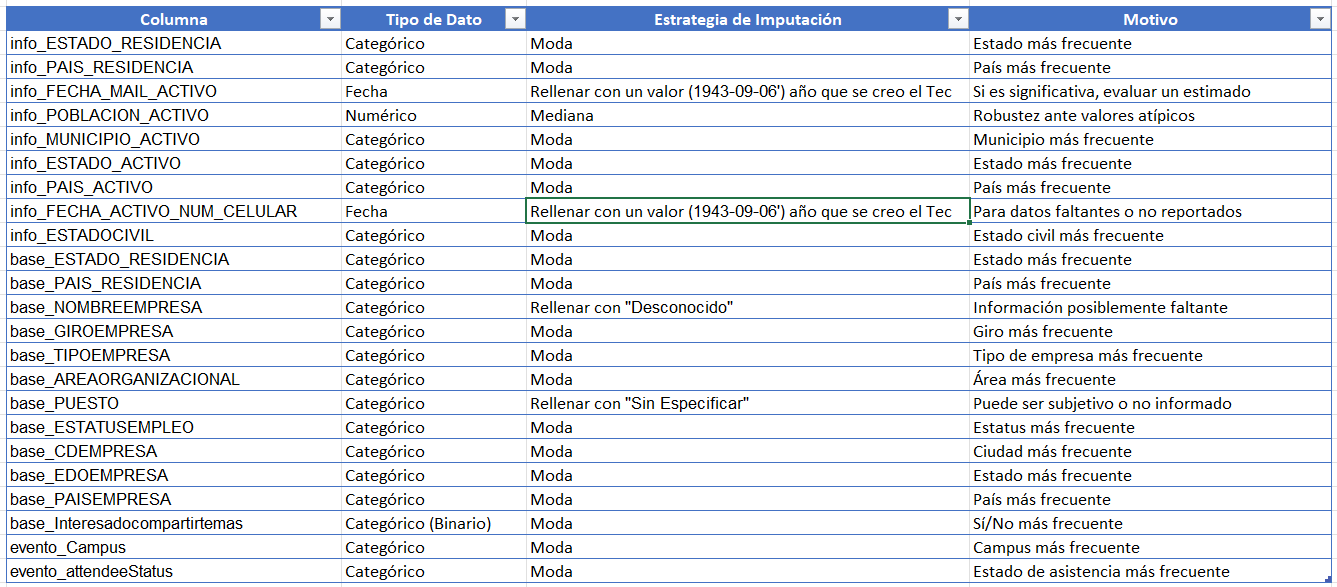

In [ ]:
# Verificar el tipo de la columna 'base_A√±oGrad'
tipo_base_A√±oGrad = df_unido['base_A√±oGrad'].dtype

# Mostrar el tipo de dato
print("El tipo de dato de 'base_A√±oGrad' es:", tipo_base_A√±oGrad)


In [ ]:
# Convertir la columna 'base_A√±oGrad' a tipo num√©rico (int), manejando posibles errores
df_unido['base_A√±oGrad'] = pd.to_numeric(df_unido['base_A√±oGrad'], errors='coerce')
df_unidoLDG['base_A√±oGrad'] = pd.to_numeric(df_unidoLDG['base_A√±oGrad'], errors='coerce')
df_unidoTalks['base_A√±oGrad'] = pd.to_numeric(df_unidoTalks['base_A√±oGrad'], errors='coerce')
df_unidoVoluntariado['base_A√±oGrad'] = pd.to_numeric(df_unidoVoluntariado['base_A√±oGrad'], errors='coerce')
df_unidoHistoriaExito['base_A√±oGrad'] = pd.to_numeric(df_unidoHistoriaExito['base_A√±oGrad'], errors='coerce')

# Despu√©s de convertir a num√©rico, rellena los NaN (si los hay) con un valor por defecto, como la mediana, por ejemplo
df_unido['base_A√±oGrad'].fillna(df_unido['base_A√±oGrad'].median(), inplace=True)
df_unidoLDG['base_A√±oGrad'].fillna(df_unidoLDG['base_A√±oGrad'].median(), inplace=True)
df_unidoTalks['base_A√±oGrad'].fillna(df_unidoTalks['base_A√±oGrad'].median(), inplace=True)
df_unidoVoluntariado['base_A√±oGrad'].fillna(df_unidoVoluntariado['base_A√±oGrad'].median(), inplace=True)
df_unidoHistoriaExito['base_A√±oGrad'].fillna(df_unidoHistoriaExito['base_A√±oGrad'].median(), inplace=True)

# Convertir la columna a entero
df_unido['base_A√±oGrad'] = df_unido['base_A√±oGrad'].astype(int)
df_unidoLDG['base_A√±oGrad'] = df_unidoLDG['base_A√±oGrad'].astype(int)
df_unidoTalks['base_A√±oGrad'] = df_unidoTalks['base_A√±oGrad'].astype(int)
df_unidoVoluntariado['base_A√±oGrad'] = df_unidoVoluntariado['base_A√±oGrad'].astype(int)
df_unidoHistoriaExito['base_A√±oGrad'] = df_unidoHistoriaExito['base_A√±oGrad'].astype(int)

# Verificar el tipo de dato despu√©s de la conversi√≥n
print("El tipo de dato de 'base_A√±oGrad' despu√©s de la conversi√≥n es:", df_unido['base_A√±oGrad'].dtype)


In [ ]:
# Calcular la mediana de la columna 'base_A√±oGrad' en el DataFrame df_unido
mediana_ano_grad = df_unido['base_A√±oGrad'].median()

# Mostrar la mediana calculada
print("La mediana del a√±o de graduaci√≥n es:", mediana_ano_grad)

In [ ]:
# Imputaci√≥n usando la moda
def imputar_moda(df, column):
    moda = df[column].mode()[0]
    df[column].fillna(moda, inplace=True)

# Imputaci√≥n usando la mediana (con conversi√≥n a num√©rico)
def imputar_mediana(df, column):
    # Convertimos la columna a num√©rico, errores se convierten a NaN
    df[column] = pd.to_numeric(df[column], errors='coerce')
    mediana = df[column].median()
    df[column].fillna(mediana, inplace=True)

# Listas de columnas para imputar
columnas_moda = [
    'info_ESTADO_RESIDENCIA', 'info_PAIS_RESIDENCIA', 'info_MUNICIPIO_ACTIVO',
    'info_ESTADO_ACTIVO', 'info_PAIS_ACTIVO', 'info_ESTADOCIVIL',
    'base_ESTADO_RESIDENCIA', 'base_PAIS_RESIDENCIA', 'base_GIROEMPRESA',
    'base_TIPOEMPRESA', 'base_AREAORGANIZACIONAL', 'base_ESTATUSEMPLEO',
    'base_CDEMPRESA', 'base_EDOEMPRESA', 'base_PAISEMPRESA',
    'base_Interesadocompartirtemas', 'evento_Campus', 'evento_attendeeStatus'
]

columnas_mediana = ['info_POBLACION_ACTIVO']

# Aplicar imputaci√≥n
for col in columnas_moda:
    imputar_moda(df_unido, col)
    imputar_moda(df_unidoHistoriaExito, col)
    imputar_moda(df_unidoVoluntariado, col)
    imputar_moda(df_unidoTalks, col)
    imputar_moda(df_unidoLDG, col)

for col in columnas_mediana:
    imputar_mediana(df_unido, col)
    imputar_mediana(df_unidoHistoriaExito, col)
    imputar_mediana(df_unidoVoluntariado, col)
    imputar_mediana(df_unidoTalks, col)
    imputar_mediana(df_unidoLDG, col)

# Imputaci√≥n para fechas con valor por defecto
fechas_defecto = [
    'info_FECHA_MAIL_ACTIVO', 'info_FECHA_ACTIVO_NUM_CELULAR'
]

for col in fechas_defecto:
    df_unido[col].fillna(pd.Timestamp('2005-09-06'), inplace=True)
    df_unidoHistoriaExito[col].fillna(pd.Timestamp('2005-09-06'), inplace=True)
    df_unidoVoluntariado[col].fillna(pd.Timestamp('2005-09-06'), inplace=True)
    df_unidoTalks[col].fillna(pd.Timestamp('2005-09-06'), inplace=True)
    df_unidoLDG[col].fillna(pd.Timestamp('2005-09-06'), inplace=True)

    # Rellenar con texto en columnas de empresa
df_unido['base_NOMBREEMPRESA'].fillna('Desconocido', inplace=True)
df_unido['base_PUESTO'].fillna('Sin Especificar', inplace=True)

df_unidoHistoriaExito['base_NOMBREEMPRESA'].fillna('Desconocido', inplace=True)
df_unidoHistoriaExito['base_PUESTO'].fillna('Sin Especificar', inplace=True)

df_unidoVoluntariado['base_NOMBREEMPRESA'].fillna('Desconocido', inplace=True)
df_unidoVoluntariado['base_PUESTO'].fillna('Sin Especificar', inplace=True)

df_unidoTalks['base_NOMBREEMPRESA'].fillna('Desconocido', inplace=True)
df_unidoTalks['base_PUESTO'].fillna('Sin Especificar', inplace=True)

df_unidoLDG['base_NOMBREEMPRESA'].fillna('Desconocido', inplace=True)
df_unidoLDG['base_PUESTO'].fillna('Sin Especificar', inplace=True)

display("Imputaci√≥n completada.")


In [ ]:
# Encontrar las columnas que tienen al menos un valor NaN
columnas_con_nan = df_unido.columns[df_unido.isna().any()].tolist()

# Mostrar el resultado
display("Columnas con valores NaN:", columnas_con_nan)

In [ ]:
display(df_unido['info_POBLACION_ACTIVO'])

In [ ]:
# Contar los valores vac√≠os (NaN) en la columna 'info_POBLACION_ACTIVO'
valores_vacios = df_unido['info_POBLACION_ACTIVO'].isna().sum()

# Calcular el total de filas en el DataFrame
total_filas = len(df_unido)

# Calcular el porcentaje de valores vac√≠os
porcentaje_vacios = (valores_vacios / total_filas) * 100

# Mostrar los resultados
display(f"Cantidad de valores vac√≠os en 'info_POBLACION_ACTIVO': {valores_vacios}")
display(f"Cantidad de valores vac√≠os en 'info_POBLACION_ACTIVO': {valores_vacios}")
(f"Porcentaje de valores vac√≠os: {porcentaje_vacios:.2f}%")


In [ ]:
#se eliminar√° la variable info_poblacion_activo
#Eliminaci√≥n de variables
columnas_a_eliminar = ['info_POBLACION_ACTIVO']
df_unido = df_unido.drop(columns=columnas_a_eliminar)
df_unidoHistoriaExito = df_unidoHistoriaExito.drop(columns=columnas_a_eliminar)
df_unidoVoluntariado = df_unidoVoluntariado.drop(columns=columnas_a_eliminar)
df_unidoTalks = df_unidoTalks.drop(columns=columnas_a_eliminar)
df_unidoLDG = df_unidoLDG.drop(columns=columnas_a_eliminar)

display(df_unido.columns)
#display(df_marketing.head())

# Forzar la recolecci√≥n de basura
gc.collect()

In [ ]:
# Calcular el porcentaje de valores NaN en cada columna
porcentaje_nan = df_unidoLDG.isna().mean() * 100

# Filtrar solo las columnas que tienen al menos un valor NaN
columnas_con_nan = porcentaje_nan[porcentaje_nan > 0]

# Mostrar las columnas con su porcentaje de valores NaN
display("Columnas con valores NaN y porcentaje correspondiente:")
display(columnas_con_nan)


## **Pregunta 2: ¬øCu√°les son las estad√≠sticas resumidas del conjunto de datos?**



In [ ]:
display(df_unido.describe())  # Muestra estad√≠sticas resumidas de todas las columnas

In [ ]:
# Seleccionar solo las variables num√©ricas
numeric_df = df_unido.select_dtypes(include=[np.number])

# Calcular estad√≠sticas avanzadas para las variables num√©ricas
numeric_stats = numeric_df.describe().transpose()

# Calcular skewness (asimetr√≠a)
numeric_stats['Skewness'] = numeric_df.skew()

# Calcular el coeficiente de variaci√≥n (CV = std/mean) con manejo de divisi√≥n por cero
numeric_stats['Coeficiente de Variaci√≥n'] = numeric_stats.apply(
    lambda row: row['std'] / row['mean'] if row['mean'] != 0 else np.nan, axis=1
)

# Mostrar las estad√≠sticas avanzadas
display(numeric_stats)


## **An√°lisis:**

**Variables num√©ricas**
Las estad√≠sticas resumidas para las variables num√©ricas fueron calculadas utilizando el m√©todo describe() de pandas, complementado con m√©tricas avanzadas como skewness (asimetr√≠a) y el coeficiente de variaci√≥n. Estas m√©tricas nos permiten entender la distribuci√≥n y variabilidad de las variables, y determinar si es necesario aplicar transformaciones adicionales para corregir distribuciones sesgadas.

**Observaciones**
* **opened**: Tiene un sesgo altamente positivo de 6.95, lo que indica que la mayor√≠a de los valores son bajos. El coeficiente de variaci√≥n es 0.75, lo cual sugiere una gran variaci√≥n respecto a la media.
* **clicked**: Muestra un sesgo positivo a√∫n mayor de 11.18, que nos dice que existe una una distribuci√≥n muy asim√©trica. El coeficiente de variaci√≥n es 5.00, indicando que la mayor√≠a de los registros no tienen clicks

**Variables categ√≥ricas**
Las estad√≠sticas para las variables categ√≥ricas se calcularon con value_counts() y se presentaron como frecuencias relativas (% de cada categor√≠a). Esto permiti√≥ identificar la proporci√≥n de cada categor√≠a en relaci√≥n con el total.

**Observaciones**
* **contactable_dominio_correo**: La mayor√≠a de los correos pertenecen a dominios como gmail.com (43.94%), hotmail.com (16.09%) y tec.mx (11.48%). El resto se distribuye en m√°s de 7,769 dominios diferentes.
* **contactable_estatus**: La mayor√≠a de los registros est√°n clasificados como Ciclo Anterior (92.46%), con solo el 7.53% en Ciclo Actual. Revisaremos con el egresados esto posiblemente es porque se encuentran en "inicio de ciclo".
* **base_SEXO**: Hay un mayor n√∫mero de hombres (60.89%) que de mujeres (39.10%).
* **base_NACIONALIDAD**: Predominantemente Mexicana (95.91%), seguida por Colombiana (0.75%) y Ecuatoriana (0.59%). Las otras nacionalidades tienen una representaci√≥n m√≠nima.

**Identificaci√≥n de patrones**
Se observ√≥ una alta concentraci√≥n de valores en ciertos dominios de correo y en el estado de residencia (Nuevo Le√≥n y Ciudad de M√©xico). Adem√°s, las variables relacionadas con premios y reconocimientos mostraron distribuciones sesgadas hacia premios recientes.

**Distribuciones sesgadas**: Las variables num√©ricas como opened y clicked presentaron un alto sesgo positivo. Aplicaremos transformaciones logar√≠tmicas para las variables con sesgo positivo

**Siguientes pasos para tratamiento de datos**
Dado que algunas variables tienen alta dispersi√≥n y sesgo, aplicaremos algunas transformaciones como:
* **Transformaci√≥n logar√≠tmica**: Para variables como opened y clicked para reducir el sesgo positivo.

**Conclusi√≥n** El an√°lisis estad√≠stico ha permitido identificar caracter√≠sticas clave del conjunto de datos, como la existencia de distribuciones sesgadas, alta variabilidad en ciertas columnas y patrones de ausencia significativos. Las t√©cnicas de visualizaci√≥n y m√©tricas adicionales sugieren que se deben aplicar transformaciones y normalizaciones antes de proceder con un an√°lisis m√°s profundo.

## **Pregunta 3: ¬øHay valores at√≠picos en el conjunto de datos?**

Los valores at√≠picos son puntos de datos que se alejan significativamente del resto de las observaciones y pueden distorsionar an√°lisis estad√≠sticos, regresiones o modelos predictivos. Identificarlos nos ayudar√° a decidir si se deben eliminar, transformar o estudiar m√°s a fondo.

In [ ]:
#Identificar valores at√≠picos con boxplots:

#for column in df_unido.select_dtypes(include=[np.number]).columns:
 #   sns.boxplot(x=df_unido[column])
  #  plt.show()

for column in df_unido.select_dtypes(include=[np.number]).columns:
    if not df_unido[column].empty:
        try:
            sns.boxplot(x=df_unido[column])
            plt.show()
        except ValueError:
            display(f"No se grafica la columna: {column} ya que no es un valor num√©rico o v√°lido.")

In [ ]:
# Seleccionar solo las columnas num√©ricas del DataFrame
df_unido_numeric = df_unido.select_dtypes(include=['number'])

# Calcular los cuartiles y el IQR solo para las columnas num√©ricas
Q1 = df_unido_numeric.quantile(0.25)
Q3 = df_unido_numeric.quantile(0.75)
IQR = Q3 - Q1

# Identificar valores at√≠picos (outliers) en el DataFrame num√©rico
outliers = ((df_unido_numeric < (Q1 - 1.5 * IQR)) | (df_unido_numeric > (Q3 + 1.5 * IQR))).sum()

# Crear un resumen de outliers para cada columna
outlier_summary = pd.DataFrame({'Column': df_unido_numeric.columns, 'Outliers': outliers.values})

# Mostrar el resumen de valores at√≠picos usando display
display(outlier_summary)


##**Respuesta**:

**Recomendaciones para el tratamiento de valores at√≠picos**
* Transformaci√≥n usando logaritmos
* Imputaci√≥n con la mediana o con valores calculados basados en otras variables para mantener la integridad del conjunto de datos

**Descripci√≥n de los m√©todos utilizados**

**Boxplot**: Nos ayud√≥ a resaltar visualmente los valores at√≠picos como puntos fuera del rango esperado (por encima o debajo de los bigotes).

**IQR**: Cualquier valor por debajo de
ùëÑ
1
‚àí
1.5
√ó
ùêº
ùëÑ
ùëÖ
Q1‚àí1.5√óIQR o por encima de
ùëÑ
3
+
1.5
√ó
ùêº
ùëÑ
ùëÖ
Q3+1.5√óIQR se considera un valor at√≠pico.

No todos nuestros datos num√©ricos son relevantes o requieren el uso de un box plot. Por ejemplo, los valores que representan ID son simplemente identificadores asignados y no aportan informaci√≥n estad√≠stica √∫til. Por otro lado, las variables binarias num√©ricas (1,0), aunque son n√∫meros, representan en realidad variables categ√≥ricas transformadas.

**Conclusi√≥n de la pregunta:**
Para identificar los valores at√≠picos en el conjunto de datos, se realizaron dos an√°lisis principales: un an√°lisis visual con boxplots y un an√°lisis estad√≠stico utilizando el rango intercuart√≠lico (IQR).

Se encontr√≥ que las columnas 'opened' y 'clicked' presentan un n√∫mero significativo de valores at√≠picos, posiblemente debido a la distribuci√≥n sesgada de estos valores. Estos valores podr√≠an ser estudiados para determinar si se deben eliminar, transformar o mantener como casos especiales.

## **Pregunta 4: ¬øCu√°l es la cardinalidad de las variables categ√≥ricas?**



In [ ]:
#Obtener el n√∫mero de categor√≠as √∫nicas en las columnas categ√≥ricas
for col in df_unido.select_dtypes(include=['object']).columns:
    display(f"{col}: {df_unido[col].nunique()} categor√≠as")


In [ ]:
#df_unido.select_dtypes(include=['object']).nunique()
df_unido['info_FECHA_MAIL_ACTIVO']

In [ ]:
df_unido['suscrito_FechaRegistro']

In [ ]:
#convertir las columnas de tiempo en tipo datetime
#df_unido['info_FECHA_MAIL_ACTIVO'] = pd.to_datetime(df_unido['info_FECHA_MAIL_ACTIVO'], format='%d/%m/%Y', errors='coerce')
#df_unido['info_FECHA_ACTIVO'] = pd.to_datetime(df_unido['info_FECHA_ACTIVO'], format='%d/%m/%Y', errors='coerce')
#df_unido['info_FECHA_ACTIVO_NUM_CELULAR'] = pd.to_datetime(df_unido['info_FECHA_ACTIVO_NUM_CELULAR'], format='%d/%m/%Y', errors='coerce')
#df_unido['suscrito_FechaRegistro'] = pd.to_datetime(df_unido['suscrito_FechaRegistro'], format='%d/%m/%Y', errors='coerce')

df_unido['info_FECHA_MAIL_ACTIVO'] = pd.to_datetime(df_unido['info_FECHA_MAIL_ACTIVO'], format='%d/%m/%Y %H:%M')
df_unido['info_FECHA_ACTIVO'] = pd.to_datetime(df_unido['info_FECHA_ACTIVO'], format='%d/%m/%Y %H:%M')
df_unido['info_FECHA_ACTIVO_NUM_CELULAR'] = pd.to_datetime(df_unido['info_FECHA_ACTIVO_NUM_CELULAR'], format='%d/%m/%Y %H:%M')



In [ ]:
df_unido['suscrito_FechaRegistro']

In [ ]:
df_unido['suscrito_FechaRegistro'] = pd.to_datetime(df_unido['suscrito_FechaRegistro'], format='%d/%m/%Y %H:%M')

In [ ]:
df_unido['suscrito_FechaRegistro']

In [ ]:
#Obtener el n√∫mero de categor√≠as √∫nicas en las columnas categ√≥ricas
for col in df_unido.select_dtypes(include=['object']).columns:
    display(f"{col}: {df_unido[col].nunique()} categor√≠as")


## **An√°lisis**:
Esta pregunta nos ayuda a revisar los cat√°logos que existen

In [ ]:
#En este c√≥digo trataremos de hacer m√°s visual la informaci√≥n de los cat√°logos

# Crear una lista para almacenar los resultados
resultados = []

# Obtener los valores √∫nicos de cada columna categ√≥rica
for col in df_unido.select_dtypes(include=['object']).columns:
    valores_unicos = df_unido[col].unique()
    num_valores = len(valores_unicos)

    # Si hay m√°s de 10 valores √∫nicos, mostrar solo los primeros 10
   #if num_valores > 10:
        #valores_mostrados = ", ".join(map(str, valores_unicos[:10])) + "..."
    #else:
    valores_mostrados = ", ".join(map(str, valores_unicos))

    # Agregar la columna, cantidad de categor√≠as y los valores √∫nicos (limitados a 10 si es el caso)
    resultados.append([col, num_valores, valores_mostrados])

# Crear un DataFrame con los resultados
df_resultados = pd.DataFrame(resultados, columns=['Columna', 'N√∫mero de Categor√≠as', 'Valores √önicos (primeros 10)'])

# Mostrar la tabla resultante
from IPython.display import display
display(df_resultados)


## **An√°lisis**

Existen atributos con m√°s de 100 categor√≠as, esto puede afectar el rendimiento del modelo o dificultar su interpretaci√≥n.

Para estas columnas evaluaremos la opci√≥n de agrupar categor√≠as similares o reducir la cardinalidad mediante t√©cnicas como el one-hot encoding limitado o target encoding

**Transformaciones**
Existen columnas categ√≥ricas con cardinalidad muy baja (por ejemplo, columnas binarias o con tres categor√≠as como base_HizoPrepaTec), se aplicar√°n t√©cnicas como el label encoding en lugar de one-hot encoding para simplificar la codificaci√≥n y evitar la explosi√≥n de variables dummy


## **Pregunta 5: ¬øExisten distribuciones sesgadas en el conjunto de datos? ¬øNecesitamos aplicar alguna transformaci√≥n no lineal?**


In [ ]:
#Visualizar distribuciones: histogramas para ver la distribuci√≥n de cada columna.
for column in df_unido.select_dtypes(include=[np.number]).columns:
    sns.histplot(df_unido[column], kde=True)
    plt.show()


An√°lisis pasa saber si hay sesgos y aplicar transformaciones

In [ ]:
#Revisaremos si existen sesgos num√©ricos
for column in df_unido.select_dtypes(include=[np.number]).columns:
    skewness = df_unido[column].skew()
    display(f"Skewness de {column}: {skewness}")

#el valor de skewness ayudar√° a definir r√°pidamente el sesgo
#Cercano a 0: La distribuci√≥n podr√≠a tomarse como sim√©trica.
#Mayor a 0.5: Existe un sesgo positivo (derecha).
#Menor a -0.5: Existe un sesgo negativo (izquierda).

In [ ]:
from scipy.stats import skew, kurtosis

for column in df_unido.select_dtypes(include=[np.number]).columns:
    skewness = skew(df_unido[column].dropna())  # Calcular asimetr√≠a
    kurt = kurtosis(df_unido[column].dropna())  # Calcular curtosis
    display(f"Variable: {column}, Asimetr√≠a (Skewness): {skewness:.2f}, Curtosis: {kurt:.2f}")


**An√°lisis de resultado**

Variables con sesgo positivo significativo:
*   opened (6.95)
*   clicked (11.17)
*   Contacto ID (2.58)
*   base_NIVELACADEMICO (1.97)

**¬øQu√© transformaci√≥n aplicar?**: transformaci√≥n logar√≠tmica o ra√≠z cuadrada. Esto ayudar√° a normalizar las distribuciones


In [ ]:
#Transformaci√≥n logar√≠tmica para sesgo positivo (valores mayores a 0)
#df_unido['opened_log'] = np.log1p(df_unido['opened'])  # Log(1 + x)
#df_unido['clicked_log'] = np.log1p(df_unido['clicked'])
#df_unido['Contacto_ID_log'] = np.log1p(df_unido['Contacto ID'])
#df_unido['base_NIVELACADEMICO_log'] = np.log1p(df_unido['base_NIVELACADEMICO'])


In [ ]:
#Transformaci√≥n Yeo-Johnson para sesgo negativo
#from sklearn.preprocessing import PowerTransformer

#pt = PowerTransformer(method='yeo-johnson')
#df_unido['Correo_marketing_ID_trans'] = pt.fit_transform(df_unido[['Correo de marketing ID']])
#df_unido['info_FECHA_PREMIO1_trans'] = pt.fit_transform(df_unido[['info_FECHA_PREMIO1']])
#df_unido['info_FECHA_PREMIO2_trans'] = pt.fit_transform(df_unido[['info_FECHA_PREMIO2']])
#df_unido['info_FECHA_PREMIO3_trans'] = pt.fit_transform(df_unido[['info_FECHA_PREMIO3']])
#df_unido['info_FECHA_PREMIO4_trans'] = pt.fit_transform(df_unido[['info_FECHA_PREMIO4']])

#El sesgo no se dar√° en las fechas por el tipo de dato


Asimetr√≠a o skewness:
* Positivo (> 1): Distribuci√≥n sesgada a la derecha.
* Negativo (< -1): Distribuci√≥n sesgada a la izquierda.
* Entre -1 y 1: Distribuci√≥n aproximadamente sim√©trica.

Curtosis:
* Valor alto (>3): Distribuci√≥n con colas m√°s pesadas de lo normal (leptoc√∫rtica).
* Valor bajo (<3): Distribuci√≥n con colas m√°s ligeras de lo normal (platic√∫rtica).

##**An√°lisis**

El an√°lisis de la distribuci√≥n de las variables num√©ricas utilizando las m√©tricas de asimetr√≠a (skewness) y curtosis nos di√≥ luz para saber que muchas de las variables en el conjunto de datos presentan distribuciones sesgadas, por lo que es necesario aplicar transformaciones no lineales en ciertos casos para mejorar la calidad del an√°lisis y la efectividad de los futuros modelos predictivos. A continuaci√≥n se presenta un resumen de los hallazgos:

**An√°lisis de la asimetr√≠a- skewness**

Asimetr√≠a positiva: La mayor√≠a de las variables presentan un alto grado de asimetr√≠a positiva (valores superiores a 1), lo cual indica que las distribuciones est√°n sesgadas hacia la derecha, con pocos valores extremos en el lado superior:
* opened: Asimetr√≠a de 6.95.
* clicked: Asimetr√≠a de 11.18.

**An√°lisis de la curtosis**
La curtosis permite identificar la presencia de colas largas o pesadas en la distribuci√≥n.
Una curtosis muy alta (> 3) indica que la variable tiene colas m√°s pesadas de lo normal (leptoc√∫rtica), mientras que una curtosis baja (< 3) indica colas m√°s ligeras (platic√∫rtica).

Variables con curtosis alta:
* opened: Curtosis de 100.19.
* clicked: Curtosis de 276.56.

Estas variables tienen distribuciones con valores extremos que se desv√≠an significativamente de la media, lo que puede afectar el desempe√±o de los modelos de aprendizaje autom√°tico.


**Conclusi√≥n**
La mayor√≠a de las variables num√©ricas presentan distribuciones altamente sesgadas y con curtosis elevada. Aplicaremos transformaciones no lineales como el logaritmo y Box-Cox antes de proceder con la fase de modelado.
Estas transformaciones ayudar√°n a estabilizar la varianza, reducir la asimetr√≠a y mejorar la capacidad de los algoritmos para detectar patrones en el conjunto de datos.

## **Pregunta 6: ¬øSe identifican tendencias temporales? (En caso de que el conjunto incluya una dimensi√≥n de tiempo)**


In [ ]:
# Obtener los valores √∫nicos de la columna 'HizoPrepaTec'
valores_unicos = df_unido['HizoPrepaTec'].unique()

# Contar la cantidad de valores √∫nicos
cantidad_valores_unicos = len(valores_unicos)

# Mostrar los resultados
print("Valores √∫nicos:", valores_unicos)
print("Cantidad de valores √∫nicos:", cantidad_valores_unicos)


In [ ]:
#convertir las columnas de tiempo en tipo datetime
#df_unido['base_FECHAGRADUACION'] = pd.to_datetime(df_unido['base_FECHAGRADUACION'], format='%d/%m/%Y', errors='coerce')
#Visualizar tendencias temporales usando gr√°ficos de l√≠neas para ver tendencias a lo largo del tiempo.
df_unido.set_index('info_FECHA_MAIL_ACTIVO').resample('M').count()['HizoPrepaTec'].plot() # Select the 'HizoPrepaTec' column after resampling and count to plot the trend
plt.show()


In [ ]:
df_unido[df_unido['info_FECHA_MAIL_ACTIVO'] > '2024-12-01']

**Preprocesamiento:**

Identificamos que en la columna 'info_FECHA_MAIL_ACTIVO' de la gr√°fica exist√≠an valores con fechas posteriores a la actual. Por ello, realizamos una limpieza para eliminar las incongruencias y establecer esos valores como nulos.

In [ ]:
#df_unido2 = df_unido
df_unido.loc[df_unido['info_FECHA_MAIL_ACTIVO'] > '2024-10-01', 'info_FECHA_MAIL_ACTIVO'] = pd.NaT


In [ ]:
#convertir las columnas de tiempo en tipo datetime
#df_unido['base_FECHAGRADUACION'] = pd.to_datetime(df_unido['base_FECHAGRADUACION'], format='%d/%m/%Y', errors='coerce')
#Visualizar tendencias temporales usando gr√°ficos de l√≠neas para ver tendencias a lo largo del tiempo.
df_unido.set_index('info_FECHA_MAIL_ACTIVO').resample('M').count()['HizoPrepaTec'].plot() # Select the 'HizoPrepaTec' column after resampling and count to plot the trend
plt.show()


In [ ]:
#convertir las columnas de tiempo en tipo datetime
#df_unido['base_A√±oGrad'] = pd.to_datetime(df_unido['base_A√±oGrad'],format='%Y', errors='coerce')
#Visualizar tendencias temporales usando gr√°ficos de l√≠neas para ver tendencias a lo largo del tiempo.
df_unido.set_index('info_FECHA_ACTIVO').resample('M').count()['HizoPrepaTec'].plot() # Select the 'HizoPrepaTec' column after resampling and count to plot the trend
#plt.show()

In [ ]:
#convertir las columnas de tiempo en tipo datetime
#df_unido['base_A√±oGrad'] = pd.to_datetime(df_unido['base_A√±oGrad'], errors='coerce')
#Visualizar tendencias temporales usando gr√°ficos de l√≠neas para ver tendencias a lo largo del tiempo.
df_unido.set_index('info_FECHA_ACTIVO_NUM_CELULAR').resample('M').count()['HizoPrepaTec'].plot() # Select the 'HizoPrepaTec' column after resampling and count to plot the trend
#plt.show()

In [ ]:
#convertir las columnas de tiempo en tipo datetime
#df_unido['base_A√±oGrad'] = pd.to_datetime(df_unido['base_A√±oGrad'], errors='coerce')
#Visualizar tendencias temporales usando gr√°ficos de l√≠neas para ver tendencias a lo largo del tiempo.
df_unido.set_index('suscrito_FechaRegistro').resample('M').count()['HizoPrepaTec'].plot() # Select the 'HizoPrepaTec' column after resampling and count to plot the trend
#plt.show()

**An√°lisis**

Las gr√°ficas nos permitieron identificar valores at√≠picos, como en el caso de la columna 'info_FECHA_MAIL_ACTIVO', donde realizamos la limpieza de datos correspondiente. Adem√°s, verificamos la coherencia de los gr√°ficos con la definici√≥n de cada columna, y los picos de actividad coinciden con las campa√±as que ha llevado a cabo el √°rea de egresados.

##Generar cat√°logo de variables y su definici√≥n

## **Pregunta 7: ¬øHay correlaci√≥n entre las variables dependientes e independientes?**

In [ ]:
#Matriz de correlaci√≥n
corr_matrix = df_unido.select_dtypes(include=np.number).corr() # Select only numerical columns for correlation calculation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
df_unido['replied']

**An√°lisis**

**IA_ID y HizoPrepaTec:** Tienen una correlaci√≥n positiva moderada de 0.28, lo que sugiere que, en cierta medida, los usuarios con este ID pueden estar relacionados con haber hecho Prepa Tec.

**Clicked y Opened: **La correlaci√≥n entre estas variables es de 0.15, lo que indica que existe una leve tendencia de que los usuarios que abren el correo tienden a hacer clic en √©l, aunque no es una relaci√≥n particularmente fuerte.

**Correo de Marketing ID y base_NIVELACADEMICO:** La correlaci√≥n es baja, alrededor de 0.049, lo que indica que pr√°cticamente no hay relaci√≥n entre estas dos variables.

**Ciclo Numerico y tiene_numero_celular: **Presentan una correlaci√≥n de 0.17, lo cual es una relaci√≥n positiva leve.
Un ejemplo claro es que en el ciclo anterior se hizo la campa√±a de actualizaci√≥n de datos por ello estas variables tienen una relaci√≥n.


**Variables con baja correlaci√≥n:**

La mayor√≠a de las variables tienen correlaciones cercanas a 0, lo que sugiere que no tienen una relaci√≥n lineal clara. Esto incluye variables como:

**IA_ID y opened: **Correlaci√≥n muy baja (-0.006), lo que indica que no hay relaci√≥n entre el ID y si se abri√≥ el correo.

**Tiene_numero_celular y tiene_linkedin:** Presentan una correlaci√≥n casi nula (0.035), lo que implica que tener un n√∫mero de celular no est√° relacionado con tener un perfil en LinkedIn.


**Preprocesamiento**

 Observamos que la variable replied parece no tener correlaci√≥n con ninguna otra variable, lo que probablemente indica falta de datos o que no se registraron suficientes respuestas como para establecer una relaci√≥n. Por esta raz√≥n hemos obtado por eliminar la variable.

 Lo anterior es congruente, ya que al analizar la columna, observamos que mide el n√∫mero de respuestas, y los correos fueron enviados desde una cuenta 'Noreply', lo que explica la ausencia de respuestas. Por ello, tomamos la decisi√≥n de eliminar la columna 'Replied' del DataFrame.




In [ ]:
# Encontrar las columnas categ√≥ricas (de tipo 'object')
categorical_columns = df_unido.select_dtypes(include=['object']).columns

# Mostrar las columnas categ√≥ricas
display("Columnas categ√≥ricas en df_unido:")
for col in categorical_columns:
    display(col)

In [ ]:
#Eliminaci√≥n de variables
columnas_a_eliminar = ['replied']
df_unido = df_unido.drop(columns=columnas_a_eliminar)

# Forzar la recolecci√≥n de basura
gc.collect()

## **Pregunta 8: ¬øC√≥mo se distribuyen los datos en funci√≥n de diferentes categor√≠as?**

In [ ]:
# Ver las columnas categ√≥ricas
categorical_columns = df_unido.select_dtypes(include=['object']).columns

# Mostrar las primeras filas para asegurarse de que los datos se cargaron correctamente
display(df_unido.head())

# Generar gr√°ficos de barras para cada columna categ√≥rica
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_unido, y=col, order=df_unido[col].value_counts().index[:10])  # Mostrar el top 10 para columnas con muchas categor√≠as
    plt.title(f'Distribuci√≥n de la columna: {col}')
    plt.xlabel('Frecuencia')
    plt.ylabel(col)
    plt.show()

# Mostrar una tabla con la distribuci√≥n de frecuencias de cada columna categ√≥rica
for col in categorical_columns:
    display(f"Distribuci√≥n de la columna '{col}':")
    display(df_unido[col].value_counts())
    display("\n" + "-"*50 + "\n")


###An√°lisis bivariado

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Verificar que las columnas existen en el DataFrame
if 'info_ESTADO_ACTIVO' in df_unido.columns and 'clicked' in df_unido.columns and 'opened' in df_unido.columns:

    # Gr√°fico de Boxplot para analizar la distribuci√≥n de `clicked` por `estado`
    plt.figure(figsize=(14, 6))
    sns.boxplot(x='info_ESTADO_ACTIVO', y='clicked', data=df_unido)
    plt.title('Distribuci√≥n de la variable clicked por estado')
    plt.xticks(rotation=45)
    plt.show()

    # Gr√°fico de Boxplot para analizar la distribuci√≥n de `opened` por `estado`
    plt.figure(figsize=(14, 6))
    sns.boxplot(x='info_ESTADO_ACTIVO', y='opened', data=df_unido)
    plt.title('Distribuci√≥n de la variable opened por estado')
    plt.xticks(rotation=45)
    plt.show()

    # Gr√°fico de Violin Plot para analizar `clicked` por `estado`
    plt.figure(figsize=(14, 6))
    sns.violinplot(x='info_ESTADO_ACTIVO', y='clicked', data=df_unido)
    plt.title('Distribuci√≥n de la variable clicked por estado (Violin Plot)')
    plt.xticks(rotation=45)
    plt.show()

    # Gr√°fico de Bar Plot para el promedio de `clicked` por estado
    plt.figure(figsize=(14, 6))
    sns.barplot(x='info_ESTADO_ACTIVO', y='clicked', data=df_unido, estimator='mean')
    plt.title('Promedio de la variable clicked por estado')
    plt.xticks(rotation=45)
    plt.show()

    # Gr√°fico de Bar Plot para el promedio de `opened` por estado
    plt.figure(figsize=(14, 6))
    sns.barplot(x='info_ESTADO_ACTIVO', y='opened', data=df_unido, estimator='mean')
    plt.title('Promedio de la variable opened por estado')
    plt.xticks(rotation=45)
    plt.show()

else:
    display("Las columnas 'info_ESTADO_ACTIVO', 'clicked' o 'opened' no est√°n disponibles en el DataFrame.")



Se agrupar√°n para mejor visualizaci√≥n

In [ ]:
#Reemplazar NaNs en la columna antes de agrupar
df_unido['info_ESTADO_ACTIVO'].fillna('Desconocido', inplace=True)

# Contar la frecuencia de cada estado, incluyendo 'Desconocido'
estado_counts = df_unido['info_ESTADO_ACTIVO'].value_counts()

# Definir un umbral para incluir solo los estados con suficientes observaciones
umbral = 50  # Ajusta este valor seg√∫n el an√°lisis
df_unido['info_ESTADO_ACTIVO_agrupado'] = df_unido['info_ESTADO_ACTIVO'].apply(lambda x: x if estado_counts[x] > umbral else 'Otros')

# Filtrar los valores at√≠picos extremos para mejorar la visualizaci√≥n
df_filtered = df_unido[df_unido['opened'] < 30]  # Ajusta el valor seg√∫n la distribuci√≥n

# Crear el gr√°fico con estados agrupados
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_filtered, x='info_ESTADO_ACTIVO_agrupado', y='opened')
plt.xticks(rotation=45, ha='right')  # Ajustar las etiquetas del eje X
plt.title('Distribuci√≥n de la variable opened por estado (Agrupado)')
plt.xlabel('Estado Activo (Agrupado)')
plt.ylabel('Opened')
plt.show()


## An√°lisis

## 1. **Distribuci√≥n Geogr√°fica**
- **info_ESTADO_ACTIVO:**
  - **Nuevo Le√≥n** tiene la mayor concentraci√≥n de datos, significativamente superior a cualquier otro estado.
  - Le siguen la **Ciudad de M√©xico**, **Estado de M√©xico**, **Jalisco**, **Quer√©taro**, entre otros, aunque en proporciones mucho menores.
  
- **info_PAIS_ACTIVO:**
  - **M√©xico** es el pa√≠s dominante en los datos, con una abrumadora mayor√≠a siendo sede de la mayoria de los campus.
  - En menor proporci√≥n, algunos registros est√°n asociados a **Estados Unidos**, seguido por pa√≠ses de Am√©rica Latina como **Honduras**, **Bolivia**, **Panam√°**, y otros.

## 2. **Distribuci√≥n Temporal**
- **info_FECHA_ACTIVO:**
  - La fecha m√°s com√∫n de actividad registrada es **14/08/2022**.
  - Hay picos adicionales en **05/07/2023** y otras fechas en a√±os anteriores, lo que sugiere actividad en varios periodos a lo largo de los a√±os.

- **info_FECHA_ACTIVO_NUM_CELULAR:**
  - La fecha m√°s registrada es **14/10/2019**.
  - Tambi√©n hay una actividad destacada en **04/12/2023** y fechas posteriores como **20/06/2024**, lo que sugiere que los n√∫meros celulares activos han sido actualizados recientemente.

## 3. **Distribuci√≥n de Estado Civil**
- **info_ESTADOCIVIL:**
  - **Soltero** es el estado civil predominante.
  - Una proporci√≥n considerable de registros corresponde a **Casado**, mientras que las otras categor√≠as como **Divorciado**, **Viudo**, o **Uni√≥n libre** tienen una representaci√≥n m√≠nima.

## 4. **Distribuci√≥n por Intereses**
- **Intereses** (como **info_interes_TECNOLOGIA**, **info_interes_EDUCACION**, **info_interes_LIDERAZGO**, etc.):
  - Las personas que han indicado intereses en categor√≠as como **tecnolog√≠a**, **educaci√≥n**, **liderazgo**, **negocios**, **cultura**, y **salud** presentan distribuciones uniformes.
  - En todas estas categor√≠as, los registros que afirman tener estos intereses son numerosos, indicando un alto nivel de afinidad hacia estos temas.

## 5. **Distribuci√≥n por G√©nero**
- **base_SEXO:**
  - Hay m√°s registros de personas de **sexo masculino** en comparaci√≥n con **femenino**.

## 6. **Distribuci√≥n por A√±o de Nacimiento**
- **base_a√±o_nac:**
  - La mayor parte de los registros corresponde a personas nacidas entre **1993** y **2002**, lo que sugiere que la mayor√≠a de los egresados en la base de datos son j√≥venes adultos, de entre 21 y 30 a√±os.

## 7. **Distribuci√≥n por Nacionalidad**
- **base_NACIONALIDAD:**
  - **Mexicana** es, de manera abrumadora, la nacionalidad m√°s com√∫n, seguida en proporciones muy menores por **Colombiana**, **Ecuatoriana**, **Peruana**, **Estadounidense**, y otras nacionalidades de Am√©rica Latina.

## 8. **Distribuci√≥n de la Presencia en LinkedIn**
- **info_SOCIAL_LINKEDIN:**
  - La mayor√≠a de las personas **no tienen** un perfil activo en **LinkedIn**, lo que podr√≠a indicar que prefieren otros canales de contacto o no est√°n tan activos en redes profesionales.

## 9. **Distribuci√≥n por N√∫mero de Celular**
- **info_NUMERO_CELULAR:**
  - La mayor√≠a de los registros indican tener un n√∫mero de celular registrado, lo que sugiere que existe un alto nivel de accesibilidad para contactarlos.

##Acerca de las bivariables por estado

**Alta variabilidad entre estados** El gr√°fico muestra que hay una alta variabilidad en la distribuci√≥n de la variable opened dependiendo del estado de residencia del egresado.
Estados como Nuevo Le√≥n, Ciudad de M√©xico y Quer√©taro tienen una mayor cantidad de aperturas de correos comparado con otros estados. Esto sugiere un mayor nivel de interacci√≥n en estas regiones.

**Estados con Mayor Cantidad de Outliers** Algunos estados como Nuevo Le√≥n y Quer√©taro presentan un n√∫mero considerable de outliers, lo que indica que hay un subconjunto de egresados que abren los correos con una frecuencia muy alta comparada con el promedio del resto de usuarios en su misma regi√≥n.

Muchos estados como Durango, Aguascalientes, Morelos y Tabasco muestran una distribuci√≥n concentrada en los valores m√°s bajos de opened. Esto podr√≠a indicar un menor inter√©s o participaci√≥n de los egresados en estas √°reas.

**Regiones Internacionales** Algunos estados no pertenecientes a M√©xico (como: Panam√°, Guatemala, California, New York) tienen interacciones muy bajas y pocas observaciones, por lo que la cantidad de datos podr√≠a ser insuficiente para sacar conclusiones significativas.

## **Pregunta 9: ¬øExisten patrones o agrupaciones (clusters) en los datos con caracter√≠sticas similares?**


In [ ]:
# Seleccionar solo las columnas num√©ricas (K-means solo trabaja con datos num√©ricos)
numeric_columns = df_unido.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df_unido[numeric_columns].dropna()  # Eliminar filas con valores NaN

# Normalizar los datos para que todas las caracter√≠sticas tengan la misma escala
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Aplicar K-means para encontrar clusters
# Definir el n√∫mero de clusters que queremos encontrar
kmeans = KMeans(n_clusters=5, random_state=42)  # Cambia n_clusters para buscar m√°s o menos grupos
kmeans.fit(df_scaled)

# Agregar los clusters al DataFrame original
df_numeric['Cluster'] = kmeans.labels_

# Visualizar los clusters usando PCA (reducci√≥n de dimensionalidad a 2 componentes)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Crear un DataFrame con los resultados de PCA
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = kmeans.labels_

# Graficar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100, alpha=0.7)
plt.title('Clusters encontrados mediante K-means')
plt.show()

# Evaluar el n√∫mero √≥ptimo de clusters
# Utilizamos el m√©todo del codo para determinar el n√∫mero √≥ptimo de clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Graficar la inercia para encontrar el "codo"
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('N√∫mero de clusters')
plt.ylabel('Inercia')
plt.title('M√©todo del codo para encontrar el n√∫mero √≥ptimo de clusters')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
def calcular_coeficiente_silhouette(df, n_clusters):
  kmeans = KMeans(n_clusters=n_clusters)
  labels = kmeans.fit_predict(df)
  silhouette_avg = silhouette_score(df, labels)
  return silhouette_avg

coeficiente = calcular_coeficiente_silhouette(df_pca, 5)
print(f"Coeficiente de Silhouette para 5 clusters: {coeficiente}")

## An√°lisis
 - En el primer an√°lisis de clusters, observamos que las clases no presentaban una buena definici√≥n visual. Por ello, decidimos reincorporar las columnas de inter√©s. Aunque estas contienen numerosos valores vac√≠os, la informaci√≥n que aportan permite una mejor definici√≥n de los clusters.
  
  - Con las correcciones anteriores se observan patrones de agrupaci√≥n en los datos mas definidos. Usando la t√©cnica de **K-means**, indetificamos **seis clusters distintos**.
  - **M√©todo del codo**:El m√©todo del codo confirma que **3 o 6 clusters** es una opci√≥n razonable para segmentar los datos, ya que la reducci√≥n en la inercia comienza a estabilizarse despu√©s de estos puntos, sin embargo al momento de obtener los graficos, hay mayor limpieza con 3.
  - Los puntos representados en el gr√°fico de **PCA** muestran que los datos se agrupan en diferentes regiones del espacio bidimensional, lo que sugiere que hay caracter√≠sticas compartidas entre los individuos dentro de cada cluster.


  - La normalizaci√≥n y reducci√≥n de dimensionalidad nos permiten observar que los datos contienen variables que son √∫tiles para segmentar a los egresados en grupos con caracter√≠sticas similares. Esto ser√° crucial para definir perfiles de **LDG**, **Voluntariado**, **Historia de √©xito**, **Speaker en eventos**.





## ***Pregunta 10: ¬øSe deber√≠an normalizar las im√°genes para visualizarlas mejor? No se usan im√°genes***

No Aplica

##**Pregunta 11: ¬øHay desequilibrio en las clases de la variable objetivo?**

Para este an√°lisis haremos iniciativa por iniciativa

###**L√≠der de generaci√≥n**

In [ ]:
 df_unidoLDG['es_LDGincubadora'].unique()

In [ ]:
#An√°lisis estad√≠stico
# Conteo de las clases
class_counts = df_unidoLDG['es_LDGincubadora'].value_counts()

# Visualizaci√≥n del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribuci√≥n de la variable objetivo (es_LDGincubadora)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Incubadora (0)', 'Incubadora (1)'])
plt.show()

# Imprimir proporci√≥n
display(f"Proporci√≥n de clase 0 (No Incubadora): {class_counts[0] / sum(class_counts) * 100:.2f}%")
display(f"Proporci√≥n de clase 1 (Incubadora): {class_counts[1] / sum(class_counts) * 100:.2f}%")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# An√°lisis estad√≠stico
# Conteo de las clases
class_counts = df_unidoLDG['es_LDGincubadora'].value_counts()

# Visualizaci√≥n del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribuci√≥n de la variable objetivo (es_LDGincubadora)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Incubadora (0)', 'Incubadora (1)'])
plt.show()

# Imprimir proporci√≥n (con manejo de clases faltantes)
total = sum(class_counts)

# Proporci√≥n de clase 0
if 0 in class_counts.index:
    proporcion_clase_0 = class_counts[0] / total * 100
    print(f"Proporci√≥n de clase 0 (No Incubadora): {proporcion_clase_0:.2f}%")
else:
    print("Clase 0 (No Incubadora) no est√° presente en los datos.")

# Proporci√≥n de clase 1
if 1 in class_counts.index:
    proporcion_clase_1 = class_counts[1] / total * 100
    print(f"Proporci√≥n de clase 1 (Incubadora): {proporcion_clase_1:.2f}%")
else:
    print("Clase 1 (Incubadora) no est√° presente en los datos.")


T√©cnicas a usar

Submuestreo: Reducir el n√∫mero de ejemplos en la clase mayoritaria.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Definir la variable objetivo y las caracter√≠sticas
X = df_unidoLDG.drop('es_LDGincubadora', axis=1)
y = df_unidoLDG['es_LDGincubadora']

# Aplicar undersampling
undersample = RandomUnderSampler(sampling_strategy='majority')
X_resampled, y_resampled = undersample.fit_resample(X, y)

# Crear un nuevo DataFrame con las clases balanceadas
df_resampled_unidoLDG = X_resampled.copy()
df_resampled_unidoLDG['es_LDGincubadora'] = y_resampled

display("Distribuci√≥n de clases despu√©s del submuestreo:")
display(df_resampled_unidoLDG['es_LDGincubadora'].value_counts())


In [ ]:
#An√°lisis estad√≠stico
# Conteo de las clases
class_counts = df_resampled_unidoLDG['es_LDGincubadora'].value_counts()

# Visualizaci√≥n del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribuci√≥n de la variable objetivo (es_LDGincubadora)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Incubadora (0)', 'Incubadora (1)'])
plt.show()

# Imprimir proporci√≥n
display(f"Proporci√≥n de clase 0 (No Incubadora): {class_counts[0] / sum(class_counts) * 100:.2f}%")
display(f"Proporci√≥n de clase 1 (Incubadora): {class_counts[1] / sum(class_counts) * 100:.2f}%")

In [ ]:
df_unidoLDG = df_resampled_unidoLDG.copy()

In [ ]:
 df_unidoLDG['es_LDGincubadora'].unique()

###**Voluntariado**

In [ ]:
#An√°lisis estad√≠stico
# Conteo de las clases
class_counts = df_unidoVoluntariado['es_Voluntariado'].value_counts()

# Visualizaci√≥n del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribuci√≥n de la variable objetivo (es_Voluntariado)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Voluntariado (0)', 'Voluntariado (1)'])
plt.show()

# Imprimir proporci√≥n
display(f"Proporci√≥n de clase 0 (No Voluntariado): {class_counts[0] / sum(class_counts) * 100:.2f}%")
display(f"Proporci√≥n de clase 1 (Voluntariado): {class_counts[1] / sum(class_counts) * 100:.2f}%")

Submuestreo: Reducir el n√∫mero de ejemplos en la clase mayoritaria.

In [ ]:
#from imblearn.under_sampling import RandomUnderSampler

# Definir la variable objetivo y las caracter√≠sticas
X = df_unidoVoluntariado.drop('es_Voluntariado', axis=1)
y = df_unidoVoluntariado['es_Voluntariado']

# Aplicar undersampling
undersample = RandomUnderSampler(sampling_strategy='majority')
X_resampled, y_resampled = undersample.fit_resample(X, y)

# Crear un nuevo DataFrame con las clases balanceadas
df_resampled_unidoVoluntatiado = X_resampled.copy()
df_resampled_unidoVoluntatiado['es_Voluntariado'] = y_resampled

display("Distribuci√≥n de clases despu√©s del submuestreo:")
display(df_resampled_unidoVoluntatiado['es_Voluntariado'].value_counts())


In [ ]:
#An√°lisis estad√≠stico
# Conteo de las clases
class_counts = df_resampled_unidoVoluntatiado['es_Voluntariado'].value_counts()

# Visualizaci√≥n del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribuci√≥n de la variable objetivo (es_Voluntariado)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Voluntariado (0)', 'Voluntariado (1)'])
plt.show()

# Imprimir proporci√≥n
display(f"Proporci√≥n de clase 0 (No Voluntariado): {class_counts[0] / sum(class_counts) * 100:.2f}%")
display(f"Proporci√≥n de clase 1 (Voluntariado): {class_counts[1] / sum(class_counts) * 100:.2f}%")

In [ ]:
df_unidoVoluntariado = df_resampled_unidoVoluntatiado

###**Historia de √©xito**

In [ ]:
#An√°lisis estad√≠stico
# Conteo de las clases
class_counts = df_unidoHistoriaExito['es_HistoriaExito'].value_counts()

# Visualizaci√≥n del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribuci√≥n de la variable objetivo (es_HistoriaExito)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Historia de √âxito (0)', 'Historia de √âxito (1)'])
plt.show()

# Imprimir proporci√≥n
display(f"Proporci√≥n de clase 0 (No Historia de √âxito): {class_counts[0] / sum(class_counts) * 100:.2f}%")
display(f"Proporci√≥n de clase 1 (Historia de √âxito): {class_counts[1] / sum(class_counts) * 100:.2f}%")

Submuestreo: Reducir el n√∫mero de ejemplos en la clase mayoritaria.

In [ ]:
#from imblearn.under_sampling import RandomUnderSampler

# Definir la variable objetivo y las caracter√≠sticas
X = df_unidoHistoriaExito.drop('es_HistoriaExito', axis=1)
y = df_unidoHistoriaExito['es_HistoriaExito']

# Aplicar undersampling
undersample = RandomUnderSampler(sampling_strategy='majority')
X_resampled, y_resampled = undersample.fit_resample(X, y)

# Crear un nuevo DataFrame con las clases balanceadas
df_resampled_HistoriaExito = X_resampled.copy()
df_resampled_HistoriaExito['es_HistoriaExito'] = y_resampled

display("Distribuci√≥n de clases despu√©s del submuestreo:")
display(df_resampled_HistoriaExito['es_HistoriaExito'].value_counts())


In [ ]:
#An√°lisis estad√≠stico
# Conteo de las clases
class_counts = df_resampled_HistoriaExito['es_HistoriaExito'].value_counts()

# Visualizaci√≥n del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribuci√≥n de la variable objetivo (es_HistoriaExito)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Historia de √âxito (0)', 'Historia de √âxito (1)'])
plt.show()

# Imprimir proporci√≥n
display(f"Proporci√≥n de clase 0 (No Historia de √âxito): {class_counts[0] / sum(class_counts) * 100:.2f}%")
display(f"Proporci√≥n de clase 1 (Historia de √âxito): {class_counts[1] / sum(class_counts) * 100:.2f}%")

In [ ]:
df_unidoHistoriaExito = df_resampled_HistoriaExito

###**Talks: Speaker en evento realizado por Relaciones con Egresados**

In [ ]:
#An√°lisis estad√≠stico
# Conteo de las clases
class_counts = df_unidoTalks['es_Talks'].value_counts()

# Visualizaci√≥n del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribuci√≥n de la variable objetivo (es_Talks)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Speaker (0)', 'Speaker (1)'])
plt.show()

# Imprimir proporci√≥n
display(f"Proporci√≥n de clase 0 (No Speaker): {class_counts[0] / sum(class_counts) * 100:.2f}%")
display(f"Proporci√≥n de clase 1 (Speaker): {class_counts[1] / sum(class_counts) * 100:.2f}%")

In [ ]:
df_unidoTalks['es_Talks']

Oversampling: Incrementar registros de la clase minoritaria

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Definir la variable objetivo y las caracter√≠sticas
X = df_unidoTalks.drop('es_Talks', axis=1)
y = df_unidoTalks['es_Talks']

# Aplicar sobremuestreo
oversample = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = oversample.fit_resample(X, y)

# Crear un nuevo DataFrame con las clases balanceadas
df_resampled_Talks = X_resampled.copy()
df_resampled_Talks['es_Talks'] = y_resampled

# Imprimir la distribuci√≥n de clases despu√©s del sobremuestreo
display("Distribuci√≥n de clases despu√©s del sobremuestreo:")
display(df_resampled_Talks['es_Talks'].value_counts())

In [ ]:
#An√°lisis estad√≠stico
# Conteo de las clases
class_counts = df_resampled_Talks['es_Talks'].value_counts()

# Visualizaci√≥n del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribuci√≥n de la variable objetivo (es_Talks)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Speaker (0)', 'Speaker (1)'])
plt.show()

# Imprimir proporci√≥n
display(f"Proporci√≥n de clase 0 (No Speaker): {class_counts[0] / sum(class_counts) * 100:.2f}%")
display(f"Proporci√≥n de clase 1 (Speaker): {class_counts[1] / sum(class_counts) * 100:.2f}%")

In [ ]:
df_unidoTalks = df_resampled_Talks

Submuestreo: Reducir el n√∫mero de ejemplos en la clase mayoritaria.

El conjunto de datos presenta un claro desequilibrio de clases, donde la mayor√≠a de los registros no est√°n asociados a la iniciativa incubadora. Este desequilibrio puede generar problemas durante la fase de modelado, ya que los modelos tienden a favorecer la predicci√≥n de la clase mayoritaria. Para abordar este problema, aplicamos t√©cnicas de re-balanceo de datos, optando en este caso por undersampling, lo que nos permiti√≥ obtener un total de 39,000 registros para entrenar el modelo.

**Iniciativa Voluntariado**

Al igual que en la iniciativa L√≠der de Generaci√≥n, la iniciativa de Voluntariado tambi√©n muestra un fuerte desequilibrio de clases, con la mayor√≠a de los registros fuera de la iniciativa. Para mitigar el impacto de este desequilibrio y debido a la cantidad de datos disponibles, decidimos aplicar undersampling, obteniendo un total de 49,000 registros para el modelado.

**Iniciativa Historia de √âxito**

En el caso de la iniciativa Historia de √âxito, el desaf√≠o es a√∫n mayor, ya que menos del 0.05% de los registros forman parte de la iniciativa. No obstante, dado el tipo de perfil de los datos, consideramos m√°s apropiado realizar undersampling, lo que result√≥ en un conjunto final de 5,000 registros. Aunque el tama√±o del conjunto es reducido, es suficiente para entrenar modelos lineales como regresi√≥n log√≠stica, regresi√≥n lineal o √°rboles de decisi√≥n.

**Iniciativa Speaker**

Similar a la iniciativa Historia de √âxito, la iniciativa de Speaker tambi√©n presenta un claro desequilibrio de clases, donde la cantidad de Speakers es muy peque√±a. En este caso, optamos por aplicar oversampling, logrando expandir el conjunto de datos a 600,000 registros para el modelado.


**Resumen General**

En las cuatro iniciativas, se utilizar√°n t√©cnicas de re-balanceo como undersampling u oversampling  para asegurar un adecuado balance de clases durante la construcci√≥n de los modelos.

In [ ]:
# Forzar la recolecci√≥n de basura
gc.collect()

In [ ]:
 df_unidoLDG['es_LDGincubadora'].unique()

#**Avance 2. Ingenier√≠a de caracter√≠sticas**

**Objetivos**

2.3 Crear nuevas caracter√≠sticas para mejorar el rendimiento de los modelos.

2.4 Mitigar el riesgo de caracter√≠sticas sesgadas y acelerar la convergencia de algunos algoritmos.

##**Se aplicar√°n operaciones comunes para convertir los datos crudos del mundo real, en un conjunto de variables √∫tiles para el aprendizaje autom√°tico. El procesamiento puede incluir:**

> Agregar bloque entrecomillado



###**Generaci√≥n de nuevas caracter√≠sticas**

#### Eventos

**Cantidad de eventos asistidos** (total_eventos_asistidos)

**Descripci√≥n**: Esta variable indica el n√∫mero total de eventos a los que un egresado ha asistido

**Justificaci√≥n**: Permite entender qu√© tan involucrado est√° cada egresado con las actividades de EXATEC o la instituci√≥n

In [ ]:
# Mostrar todas las columnas del DataFrame
#print(df_unido.columns)

print(list(df_unido.columns))

In [ ]:
#df_unido['total_eventos_asistidos'] = df_unido[df_unido['evento_CheckedIn'] == 1].groupby('IA_ID')['evento_CheckedIn'].transform('count')
#¬øVale la pena? de ser as√≠ se requiere la variable IA_ID

In [ ]:
#df_unido[['IA_ID', 'total_eventos_asistidos']]

In [ ]:
#Eventos Asistidos
#df_unidoHistoriaExito['total_eventos_asistidos'] = df_unidoHistoriaExito[df_unidoHistoriaExito['evento_CheckedIn'] == 1].groupby('IA_ID')['evento_CheckedIn'].transform('count')
#df_unidoLDG['total_eventos_asistidos'] = df_unidoLDG[df_unidoLDG['evento_CheckedIn'] == 1].groupby('IA_ID')['evento_CheckedIn'].transform('count')
#df_unidoTalks['total_eventos_asistidos'] = df_unidoTalks[df_unidoTalks['evento_CheckedIn'] == 1].groupby('IA_ID')['evento_CheckedIn'].transform('count')
#df_unidoVoluntariado['total_eventos_asistidos'] = df_unidoVoluntariado[df_unidoVoluntariado['evento_CheckedIn'] == 1].groupby('IA_ID')['evento_CheckedIn'].transform('count')

In [ ]:
#df_unidoHistoriaExito['total_eventos_asistidos']

In [ ]:
#df_unido["total_eventos_asistidos"].fillna(0, inplace=True)
#df_unidoHistoriaExito["total_eventos_asistidos"].fillna(0, inplace=True)
#df_unidoLDG["total_eventos_asistidos"].fillna(0, inplace=True)
#df_unidoTalks["total_eventos_asistidos"].fillna(0, inplace=True)
#df_unidoVoluntariado["total_eventos_asistidos"].fillna(0, inplace=True)

In [ ]:
#df_unidoVoluntariado["total_eventos_asistidos"]

In [ ]:
#df_unidoVoluntariado[['IA_ID', 'total_eventos_asistidos']]

**Participaci√≥n en tipos de eventos** (participacion_categorias)

**Descripci√≥n**:Crea variables indicadoras para cada categor√≠a de evento, reflejando si el egresado ha participado en eventos de tipo Conferencia, Taller, etc

**Justificaci√≥n**:  Esto ayuda a identificar a los egresados que prefieren ciertos tipos de eventos y pueden ser relevantes para ciertas iniciativas o estrategias

In [ ]:
 df_unidoLDG['es_LDGincubadora'].unique()

In [ ]:
# Crear variables indicadoras para la participaci√≥n en diferentes categor√≠as de eventos
categorias = pd.get_dummies(df_unido['evento_Category'], prefix='participacion_categoria')
df_unido = pd.concat([df_unido, categorias], axis=1)
df_unidoHistoriaExito= pd.concat([df_unidoHistoriaExito, categorias], axis=1)
df_unidoLDG=pd.concat([df_unidoLDG, categorias], axis=1)
df_unidoTalks= pd.concat([df_unidoTalks, categorias], axis=1)
df_unidoVoluntariado = pd.concat([df_unidoVoluntariado, categorias], axis=1)

In [ ]:
display(df_unido.head(100))

In [ ]:
 df_unidoLDG['es_LDGincubadora'].unique()

In [ ]:
# Contar valores √∫nicos en la columna 'evento_Category'
conteo_valores = df_unidoVoluntariado['participacion_categoria_Egresados - iniciativa de Participaci√≥n_ eventos LDG'].value_counts()

# Mostrar el conteo de True y False
display(conteo_valores)

In [ ]:
display(df_unidoLDG['evento_Category'])

In [ ]:
#Ahora eliminaremos el evento_categor√≠a para no generar redundancia
#Eliminaci√≥n de variables
columnas_a_eliminar = ['evento_Category']
df_unido = df_unido.drop(columns=columnas_a_eliminar)
df_unidoLDG = df_unidoLDG.drop(columns=columnas_a_eliminar)
df_unidoTalks = df_unidoTalks.drop(columns=columnas_a_eliminar)
df_unidoVoluntariado = df_unidoVoluntariado.drop(columns=columnas_a_eliminar)
df_unidoHistoriaExito = df_unidoHistoriaExito.drop(columns=columnas_a_eliminar)

In [ ]:
 df_unidoLDG['es_LDGincubadora'].unique()

#### Suscripciones

**Antiguedad en suscripci√≥n** (antiguedad_suscripcion)

**Descripci√≥n**:Variable num√©rica que mide la antig√ºedad de la suscripci√≥n en d√≠as desde la fecha de registro hasta la fecha actual. Una mayor antig√ºedad podr√≠a indicar un mayor inter√©s en los contenidos de los medios institucionales

**Justificaci√≥n**: Conocer la antig√ºedad de la suscripci√≥n de un egresado puede ayudar a identificar qu√© tan reciente o comprometido est√° con los medios de la instituci√≥n. Esta variable se podr√≠a usar para segmentar a los suscriptores en grupos de alto o bajo compromiso con la comunicaci√≥n institucional

In [ ]:
from datetime import datetime
# Asegurarse de que la columna de fechas est√° en formato datetime
df_unido['suscrito_FechaRegistro'] = pd.to_datetime(df_unido['suscrito_FechaRegistro'], errors='coerce')
df_unidoHistoriaExito['suscrito_FechaRegistro'] = pd.to_datetime(df_unido['suscrito_FechaRegistro'], errors='coerce')
df_unidoLDG['suscrito_FechaRegistro'] = pd.to_datetime(df_unido['suscrito_FechaRegistro'], errors='coerce')
df_unidoTalks['suscrito_FechaRegistro'] = pd.to_datetime(df_unido['suscrito_FechaRegistro'], errors='coerce')
df_unidoVoluntariado['suscrito_FechaRegistro'] = pd.to_datetime(df_unido['suscrito_FechaRegistro'], errors='coerce')

# Calcular la antig√ºedad en d√≠as desde la fecha de registro hasta la fecha actual
fecha_actual = datetime.now()
df_unido['antiguedad_suscripcion'] = (fecha_actual - df_unido['suscrito_FechaRegistro']).dt.days
df_unidoHistoriaExito['antiguedad_suscripcion'] =  (fecha_actual - df_unidoHistoriaExito['suscrito_FechaRegistro']).dt.days
df_unidoLDG['antiguedad_suscripcion'] =  (fecha_actual - df_unidoLDG['suscrito_FechaRegistro']).dt.days
df_unidoTalks['antiguedad_suscripcion'] =  (fecha_actual - df_unidoTalks['suscrito_FechaRegistro']).dt.days
df_unidoVoluntariado['antiguedad_suscripcion'] =  (fecha_actual - df_unidoVoluntariado['suscrito_FechaRegistro']).dt.days


In [ ]:
display(df_unido['antiguedad_suscripcion'].head())

In [ ]:
 df_unidoLDG['es_LDGincubadora'].unique()

In [ ]:
#Ahora eliminaremos el suscrito_FechaRegistro para no generar redundancia
#Eliminaci√≥n de variables
columnas_a_eliminar = ['suscrito_FechaRegistro']
df_unido = df_unido.drop(columns=columnas_a_eliminar)
df_unidoLDG = df_unidoLDG.drop(columns=columnas_a_eliminar)
df_unidoTalks = df_unidoTalks.drop(columns=columnas_a_eliminar)
df_unidoVoluntariado = df_unidoVoluntariado.drop(columns=columnas_a_eliminar)
df_unidoHistoriaExito = df_unidoHistoriaExito.drop(columns=columnas_a_eliminar)

#### Demogr√°ficos

**Edad** (edad_egresado)

**Descripci√≥n**: Variable num√©rica que calcula la edad actual de los egresados a partir de su a√±o de nacimiento (base_a√±o_nacimiento). Ayuda a segmentar y categorizar a los egresados en diferentes grupos etarios

**Justificaci√≥n**:Conocer la edad actual de los egresados es crucial para segmentar a la poblaci√≥n en funci√≥n de diferentes etapas de vida y tomar decisiones de acuerdo a sus preferencias y necesidades en funci√≥n de su edad

In [ ]:
#from datetime import datetime

# Calcular la edad actual
# Convertir la columna base_a√±o_nacimiento a formato num√©rico (int), ignorando errores
df_unido['base_a√±o nac'] = pd.to_numeric(df_unido['base_a√±o nac'], errors='coerce')
fecha_actual = datetime.now().year
df_unido['edad_egresado'] = fecha_actual - df_unido['base_a√±o nac']
df_unidoHistoriaExito['edad_egresado'] =  fecha_actual - df_unido['base_a√±o nac']
df_unidoLDG['edad_egresado'] =  fecha_actual - df_unido['base_a√±o nac']
df_unidoTalks['edad_egresado'] = fecha_actual - df_unido['base_a√±o nac']
df_unidoVoluntariado['edad_egresado'] =  fecha_actual - df_unido['base_a√±o nac']


In [ ]:
display(df_unido['edad_egresado'].head())

In [ ]:
#Ahora eliminaremos el base_a√±o nac para no generar redundancia
#Eliminaci√≥n de variables
columnas_a_eliminar = ['base_a√±o nac']
df_unido = df_unido.drop(columns=columnas_a_eliminar)
df_unidoLDG = df_unidoLDG.drop(columns=columnas_a_eliminar)
df_unidoTalks = df_unidoTalks.drop(columns=columnas_a_eliminar)
df_unidoVoluntariado = df_unidoVoluntariado.drop(columns=columnas_a_eliminar)
df_unidoHistoriaExito = df_unidoHistoriaExito.drop(columns=columnas_a_eliminar)

In [ ]:
display(df_unido.head())

**Antiguedad de graduaci√≥n** (antiguedad_graduacion)

**Descripci√≥n**: Variable num√©rica que mide la antig√ºedad en a√±os desde la fecha de graduaci√≥n (base_A√±oGrad). Una menor antig√ºedad puede indicar una conexi√≥n m√°s fuerte con el tec

**Justificaci√≥n**: Conocer la antig√ºedad desde la graduaci√≥n permite entender qu√© tan reciente es el v√≠nculo del egresado con la instituci√≥n y ayuda a personalizar las campa√±as seg√∫n el tiempo transcurrido desde su graduaci√≥n.

In [ ]:
# Convertir la columna base_A√±oGrad a formato num√©rico (int), ignorando errores
df_unido['base_A√±oGrad'] = pd.to_numeric(df_unido['base_A√±oGrad'], errors='coerce')
# Calcular la antig√ºedad desde la graduaci√≥n
df_unido['antiguedad_graduacion'] = fecha_actual - df_unido['base_A√±oGrad']
df_unidoHistoriaExito['antiguedad_graduacion'] =  fecha_actual - df_unido['base_A√±oGrad']
df_unidoLDG['antiguedad_graduacion'] =   fecha_actual - df_unido['base_A√±oGrad']
df_unidoTalks['antiguedad_graduacion'] = fecha_actual - df_unido['base_A√±oGrad']
df_unidoVoluntariado['antiguedad_graduacion'] =   fecha_actual - df_unido['base_A√±oGrad']

In [ ]:
display(df_unido['antiguedad_graduacion'].head())

In [ ]:
#Ahora eliminaremos el base_A√±oGrad para no generar redundancia
#Eliminaci√≥n de variables
columnas_a_eliminar = ['base_A√±oGrad']
df_unido = df_unido.drop(columns=columnas_a_eliminar)
df_unidoLDG = df_unidoLDG.drop(columns=columnas_a_eliminar)
df_unidoTalks = df_unidoTalks.drop(columns=columnas_a_eliminar)
df_unidoVoluntariado = df_unidoVoluntariado.drop(columns=columnas_a_eliminar)
df_unidoHistoriaExito = df_unidoHistoriaExito.drop(columns=columnas_a_eliminar)

In [ ]:
df_unido['base_ESTATUSEMPLEO']

In [ ]:
# Contar valores √∫nicos en la columna 'evento_Category'
conteo_valores = df_unido['base_ESTATUSEMPLEO'].value_counts()

# Mostrar el conteo de True y False
display(conteo_valores)


#### Campa√±as de mailing

**Frecuencia en que abre los mails** (nivel engagement)

**Descripci√≥n**: Calcula el porcentaje de correos abiertos por el egresado sobre el total de correos recibidos (medido por Correo de marketing ID)

**Justificaci√≥n**: Identificar la frecuencia con la que el egresado abre los correos electr√≥nicos puede ayudar a segmentar la audiencia para campa√±as m√°s efectivas. Un egresado que abre muchos correos podr√≠a ser considerado como "comprometido" o interesado en el contenido

In [ ]:
# Calcular la nivel_engagement (frecuencia de apertura de correos)
df_unido['nivel_engagement'] = (df_unido['opened'] / df_unido['Correo de marketing ID'].nunique())*100
df_unidoHistoriaExito['nivel_engagement'] =  (df_unidoHistoriaExito['opened'] / df_unidoHistoriaExito['Correo de marketing ID'].nunique())*100
df_unidoLDG['nivel_engagement'] =  (df_unidoLDG['opened'] / df_unidoLDG['Correo de marketing ID'].nunique())*100
df_unidoTalks['nivel_engagement'] =  (df_unidoTalks['opened'] / df_unidoTalks['Correo de marketing ID'].nunique())*100
df_unidoVoluntariado['nivel_engagement'] =  (df_unidoVoluntariado['opened'] / df_unidoVoluntariado['Correo de marketing ID'].nunique())*100


In [ ]:
display(df_unido['nivel_engagement'].max())

In [ ]:
 df_unidoLDG['es_LDGincubadora'].unique()



```
# This is formatted as code
```

###**Discretizaci√≥n o *binning***

In [ ]:
 df_unidoLDG['es_LDGincubadora'].unique()

La discretizaci√≥n consiste en convertir variables continuas en variables categ√≥ricas (bins o grupos). Esto nos ser√° √∫til para crear rangos (por ejemplo, edad en rangos de j√≥venes, adultos, etc.)

**Variable**: Edad Egresado

**Justificaci√≥n**: Discretizar la edad en rangos nos facilitar√° la identificaci√≥n de patrones demogr√°ficos y a reducir la variabilidad en modelos que son sensibles a cambios num√©ricos peque√±os

In [ ]:
# Discretizaci√≥n de la edad en grupos
bins = [0, 25, 35, 45, 55, 65, 100]  # Definir rangos de edad
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']  # Definir etiquetas para cada rango
df_unido['grupo_edad'] = pd.cut(df_unido['edad_egresado'], bins=bins, labels=labels, right=False)
df_unidoHistoriaExito['grupo_edad'] =  pd.cut(df_unidoHistoriaExito['edad_egresado'], bins=bins, labels=labels, right=False)
df_unidoLDG['grupo_edad'] =  pd.cut(df_unidoLDG['edad_egresado'], bins=bins, labels=labels, right=False)
df_unidoTalks['grupo_edad'] = pd.cut(df_unidoTalks['edad_egresado'], bins=bins, labels=labels, right=False)
df_unidoVoluntariado['grupo_edad'] =  pd.cut(df_unidoVoluntariado['edad_egresado'], bins=bins, labels=labels, right=False)


In [ ]:
display(df_unido['grupo_edad'].head())

In [ ]:
# Contar valores √∫nicos en la columna 'evento_Category'
conteo_valores = df_unido['grupo_edad'].value_counts()

# Mostrar el conteo de True y False
display(conteo_valores)


**Es importante analizar por qu√© el grupo de menores de 25 a√±os (<25) en el resultado del binning num√©rico es tan reducido, a pesar de que la mayor√≠a de los egresados suelen graduarse antes de esta edad. Este hecho resulta especialmente relevante considerando que en el DF se incluyeron las graduaciones de diciembre del 2023.**

**Variable**: antiguedad_graduacion

**Justificaci√≥n**: Dividir la antig√ºedad en grupos (por ejemplo, reciente, intermedio, antiguo) podr√≠a ayudar a identificar patrones en el comportamiento de los egresados seg√∫n su tiempo de egreso

In [ ]:
 df_unidoLDG['es_LDGincubadora'].unique()

In [ ]:
# Crear bins para agrupar la antig√ºedad en categor√≠as
antiguedad_bins = [0, 5, 10, 20, 30, 50]  # Definir rangos de antig√ºedad
antiguedad_labels = ['0-5 a√±os', '6-10 a√±os', '11-20 a√±os', '21-30 a√±os', 'M√°s de 30 a√±os']
df_unido['grupo_antiguedad_graduacion'] = pd.cut(df_unido['antiguedad_graduacion'], bins=antiguedad_bins, labels=antiguedad_labels, right=False)
df_unidoHistoriaExito['grupo_antiguedad_graduacion'] = pd.cut(df_unidoHistoriaExito['antiguedad_graduacion'], bins=antiguedad_bins, labels=antiguedad_labels, right=False)
df_unidoLDG['grupo_antiguedad_graduacion'] =  pd.cut(df_unidoLDG['antiguedad_graduacion'], bins=antiguedad_bins, labels=antiguedad_labels, right=False)
df_unidoTalks['grupo_antiguedad_graduacion'] = pd.cut(df_unidoTalks['antiguedad_graduacion'], bins=antiguedad_bins, labels=antiguedad_labels, right=False)
df_unidoVoluntariado['grupo_antiguedad_graduacion'] = pd.cut(df_unidoVoluntariado['antiguedad_graduacion'], bins=antiguedad_bins, labels=antiguedad_labels, right=False)

In [ ]:
display(df_unido['grupo_antiguedad_graduacion'].head())

**Variable**: open & clic

**Justificaci√≥n**: Los usuarios pueden ser segmentados en "baja apertura", "media apertura", y "alta apertura" seg√∫n cu√°ntas veces abren los correos. Esto es √∫til para personalizar las campa√±as de marketing

In [ ]:
# Discretizaci√≥n de la frecuencia de apertura de correos
apertura_bins = [0, 10, 20, 30, 40, 50, 60]
apertura_labels = ['0-10% apertura', '10-20% aperturas', '20-30% aperturas', '30-40% aperturas', '40-50% aperturas', '>50% aperturas']

# Aplicar discretizaci√≥n en los DataFrames
df_unido['rangos_engagement'] = pd.cut(df_unido['nivel_engagement'], bins=apertura_bins, labels=apertura_labels, right=False)

df_unidoHistoriaExito['frecuencia_apertura_correos'] = pd.cut(df_unidoHistoriaExito['nivel_engagement'], bins=apertura_bins, labels=apertura_labels, right=False)
df_unidoLDG['frecuencia_apertura_correos'] = pd.cut(df_unidoLDG['nivel_engagement'], bins=apertura_bins, labels=apertura_labels, right=False)
df_unidoTalks['frecuencia_apertura_correos'] = pd.cut(df_unidoTalks['nivel_engagement'], bins=apertura_bins, labels=apertura_labels, right=False)
df_unidoVoluntariado['frecuencia_apertura_correos'] = pd.cut(df_unidoVoluntariado['nivel_engagement'], bins=apertura_bins, labels=apertura_labels, right=False)

In [ ]:
display(df_unido['rangos_engagement'].head())

In [ ]:
# Contar valores √∫nicos en la columna 'evento_Category'
conteo_valores = df_unido['rangos_engagement'].value_counts()

# Mostrar el conteo de True y False
display(conteo_valores)

In [ ]:
# Contar valores √∫nicos en la columna 'evento_Category'
conteo_valores = df_unido['evento_attendeeStatus'].value_counts()

# Mostrar el conteo de True y False
display(conteo_valores)

In [ ]:
#Obtener el n√∫mero de categor√≠as √∫nicas en las columnas categ√≥ricas
for col in df_unido.select_dtypes(include=['object']).columns:
    display(f"{col}: {df_unido[col].nunique()} categor√≠as")

In [ ]:
 df_unidoLDG['es_LDGincubadora'].unique()

###**Codificaci√≥n (ordinal, one hot,‚Ä¶)**

**Variable**: base_SEXO, base_NIVELACADEMICO

**Justificaci√≥n**: La codificaci√≥n adecuada garantiza que los modelos de machine learning puedan procesar y aprender patrones de variables categ√≥ricas, sin distorsionar las relaciones entre categor√≠as

Nota: base_SEXO ya se hab√≠a hecho onehot anteriormente

In [ ]:
# Encontrar los valores √∫nicos de la columna 'base_NIVELACADEMICO'
unique_values_nivel_academico = df_unido['base_NIVELACADEMICO'].unique()

# Imprimir los valores √∫nicos
print(unique_values_nivel_academico)

In [ ]:

# Crear un diccionario para mapear los valores originales con el nuevo orden jer√°rquico
nivel_academico_ordinal = {
    5: 1,  # Carrera
    8: 2,  # Maestr√≠a
    9: 3,  # Doctorado
    14: 4  # Postdoctorado
}

# Reemplazar los valores de 'base_NIVELACADEMICO' por los valores ordinales
df_unido['base_NIVELACADEMICO_ORD'] = df_unido['base_NIVELACADEMICO'].map(nivel_academico_ordinal)

# Eliminar la columna original 'base_NIVELACADEMICO'
df_unido.drop(columns=['base_NIVELACADEMICO'], inplace=True)

# Verificar el resultado
display(df_unido.head())


In [ ]:
 df_unidoLDG['es_LDGincubadora'].unique()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# One-Hot Encoding para variables categ√≥ricas
# se elimina base_NIVELACADEMICO
onehot_vars = ['categoria_dominio_correo', 'base_Tipo Escuela', 'base_TIPOEMPRESA']  # Variables categ√≥ricas

# Inicializar OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' elimina una columna para evitar multicolinealidad

# Realizar el One-Hot Encoding en df_unido
onehot_encoded = onehot_encoder.fit_transform(df_unido[onehot_vars])

# Convertir el resultado a DataFrame
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(onehot_vars))

# Concatenar con el DataFrame original (sin las columnas originales categ√≥ricas)
df_unido = pd.concat([df_unido.drop(columns=onehot_vars), onehot_df], axis=1)

# Repetir el proceso para los dem√°s DataFrames
# Para df_unidoHistoriaExito
onehot_encoded_historia = onehot_encoder.fit_transform(df_unidoHistoriaExito[onehot_vars])
onehot_df_historia = pd.DataFrame(onehot_encoded_historia, columns=onehot_encoder.get_feature_names_out(onehot_vars))
df_unidoHistoriaExito = pd.concat([df_unidoHistoriaExito.drop(columns=onehot_vars), onehot_df_historia], axis=1)

# Para df_unidoLDG
onehot_encoded_ldg = onehot_encoder.fit_transform(df_unidoLDG[onehot_vars])
onehot_df_ldg = pd.DataFrame(onehot_encoded_ldg, columns=onehot_encoder.get_feature_names_out(onehot_vars))
df_unidoLDG = pd.concat([df_unidoLDG.drop(columns=onehot_vars), onehot_df_ldg], axis=1)

# Para df_unidoTalks
onehot_encoded_talks = onehot_encoder.fit_transform(df_unidoTalks[onehot_vars])
onehot_df_talks = pd.DataFrame(onehot_encoded_talks, columns=onehot_encoder.get_feature_names_out(onehot_vars))
df_unidoTalks = pd.concat([df_unidoTalks.drop(columns=onehot_vars), onehot_df_talks], axis=1)

# Para df_unidoVoluntariado
onehot_encoded_voluntariado = onehot_encoder.fit_transform(df_unidoVoluntariado[onehot_vars])
onehot_df_voluntariado = pd.DataFrame(onehot_encoded_voluntariado, columns=onehot_encoder.get_feature_names_out(onehot_vars))
df_unidoVoluntariado = pd.concat([df_unidoVoluntariado.drop(columns=onehot_vars), onehot_df_voluntariado], axis=1)



In [ ]:
 df_unidoLDG['es_LDGincubadora'].unique()

In [ ]:
# Verificar que las columnas se han agregado
display(df_unido.head())

La variable Rol con TEC puede tener los siguientes valores:

* EXATEC
* Colaborador
* Donante
* Consejero
* PAdre de familia
* Alumno

Pero en esa variable si son m√°s de 1, se guarda as√≠
"Colaborador; Donante; Exatec"

Por ello se deben separar y hacer un one hot encoding

In [ ]:
# Separar los roles en columnas diferentes
df_unido['rol'] = df_unido['rol'].str.split(';')

# Aplicar One-Hot Encoding a la columna separada de roles
roles_encoded = df_unido['rol'].str.join('|').str.get_dummies()
df_unido = pd.concat([df_unido, roles_encoded], axis=1)

# Separar los roles en columnas diferentes
df_unidoLDG['rol'] = df_unidoLDG['rol'].str.split(';')

# Aplicar One-Hot Encoding a la columna separada de roles
roles_encoded = df_unidoLDG['rol'].str.join('|').str.get_dummies()
df_unidoLDG = pd.concat([df_unidoLDG, roles_encoded], axis=1)

# Separar los roles en columnas diferentes
df_unidoHistoriaExito['rol'] = df_unidoHistoriaExito['rol'].str.split(';')

# Aplicar One-Hot Encoding a la columna separada de roles
roles_encoded = df_unidoHistoriaExito['rol'].str.join('|').str.get_dummies()
df_unidoHistoriaExito = pd.concat([df_unidoHistoriaExito, roles_encoded], axis=1)

# Separar los roles en columnas diferentes
df_unidoTalks['rol'] = df_unidoTalks['rol'].str.split(';')

# Aplicar One-Hot Encoding a la columna separada de roles
roles_encoded = df_unidoTalks['rol'].str.join('|').str.get_dummies()
df_unidoTalks = pd.concat([df_unidoTalks, roles_encoded], axis=1)

# Separar los roles en columnas diferentes
df_unidoVoluntariado['rol'] = df_unidoVoluntariado['rol'].str.split(';')

# Aplicar One-Hot Encoding a la columna separada de roles
roles_encoded = df_unidoVoluntariado['rol'].str.join('|').str.get_dummies()
df_unidoVoluntariado = pd.concat([df_unidoVoluntariado, roles_encoded], axis=1)


df_unido.drop(columns=['rol'], inplace=True)
df_unidoLDG.drop(columns=['rol'], inplace=True)
df_unidoHistoriaExito.drop(columns=['rol'], inplace=True)
df_unidoTalks.drop(columns=['rol'], inplace=True)
df_unidoVoluntariado.drop(columns=['rol'], inplace=True)

###**Escalamiento (normalizaci√≥n, estandarizaci√≥n, min ‚Äì max,‚Ä¶)**

In [ ]:
display(df_unido.head())

**Variables**: opened, clicked

**T√©nica**: Standard Scaling
Ventajas:
Reduce la influencia de variables con varianza elevada, asegurando que todas las variables contribuyan por igual.

**Justificaci√≥n**:
Para las variables que presentan una amplia dispersi√≥n de valores, como opened y clicked, estandarizarlas ayuda a evitar que los valores altos dominen el modelo

**Justificaci√≥n general:**
El escalamiento se elige bas√°ndose en el tipo de variable y su distribuci√≥n:

Variables con rango acotado: Aplicamos *Min-Max Scaling* para llevarlas a [0, 1], ya que no necesitan centrado y es importante preservar las relaciones
relativas entre los valores.

Variables con mucha varianza: Aplicamos *Standard Scaling* para asegurar que no afecten de manera desproporcionada a los modelos.


In [ ]:
#Importar las librer√≠as necesarias
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#variables a escalar
variables_escalar = [
    'opened', 'clicked'
]

#Verificamos si las variables existen en el DataFrame
variables_existentes = [var for var in variables_escalar if var in df_unido.columns]
#Se Aplicaa Min-Max Scaling para ajustar al rango [0, 1]
minmax_scaler = MinMaxScaler()
df_unido[variables_existentes] = minmax_scaler.fit_transform(df_unido[variables_existentes])
#Centraremos las variables a media 0 y desviaci√≥n est√°ndar 1, usar StandardScaler
standard_scaler = StandardScaler()
df_unido[variables_existentes] = standard_scaler.fit_transform(df_unido[variables_existentes])


#Verificamos si las variables existen en el DataFrame
variables_existentes = [var for var in variables_escalar if var in df_unidoHistoriaExito.columns]
#Se Aplicaa Min-Max Scaling para ajustar al rango [0, 1]
minmax_scaler = MinMaxScaler()
df_unidoHistoriaExito[variables_existentes] = minmax_scaler.fit_transform(df_unidoHistoriaExito[variables_existentes])
#Centraremos las variables a media 0 y desviaci√≥n est√°ndar 1, usar StandardScaler
standard_scaler = StandardScaler()
df_unidoHistoriaExito[variables_existentes] = standard_scaler.fit_transform(df_unidoHistoriaExito[variables_existentes])


#Verificamos si las variables existen en el DataFrame
variables_existentes = [var for var in variables_escalar if var in df_unidoLDG.columns]
#Se Aplicaa Min-Max Scaling para ajustar al rango [0, 1]
minmax_scaler = MinMaxScaler()
df_unidoLDG[variables_existentes] = minmax_scaler.fit_transform(df_unidoLDG[variables_existentes])
#Centraremos las variables a media 0 y desviaci√≥n est√°ndar 1, usar StandardScaler
standard_scaler = StandardScaler()
df_unidoLDG[variables_existentes] = standard_scaler.fit_transform(df_unidoLDG[variables_existentes])


#Verificamos si las variables existen en el DataFrame
variables_existentes = [var for var in variables_escalar if var in df_unidoTalks.columns]
#Se Aplicaa Min-Max Scaling para ajustar al rango [0, 1]
minmax_scaler = MinMaxScaler()
df_unidoTalks[variables_existentes] = minmax_scaler.fit_transform(df_unidoTalks[variables_existentes])
#Centraremos las variables a media 0 y desviaci√≥n est√°ndar 1, usar StandardScaler
standard_scaler = StandardScaler()
df_unidoTalks[variables_existentes] = standard_scaler.fit_transform(df_unidoTalks[variables_existentes])


#Verificamos si las variables existen en el DataFrame
variables_existentes = [var for var in variables_escalar if var in df_unidoVoluntariado.columns]
#Se Aplicaa Min-Max Scaling para ajustar al rango [0, 1]
minmax_scaler = MinMaxScaler()
df_unidoVoluntariado[variables_existentes] = minmax_scaler.fit_transform(df_unidoVoluntariado[variables_existentes])
#Centraremos las variables a media 0 y desviaci√≥n est√°ndar 1, usar StandardScaler
standard_scaler = StandardScaler()
df_unidoVoluntariado[variables_existentes] = standard_scaler.fit_transform(df_unidoVoluntariado[variables_existentes])



In [ ]:
from sklearn.preprocessing import PowerTransformer

# Transformaci√≥n Logar√≠tmica para variables sesgadas #total_eventos_asistidos
variables_log = ['nivel_engagement']
for var in variables_log:
    df_unido[var + '_log'] = np.log1p(df_unido[var])
    df_unidoHistoriaExito[var + '_log'] = np.log1p(df_unidoHistoriaExito[var])
    df_unidoLDG[var + '_log'] = np.log1p(df_unidoLDG[var])
    df_unidoTalks[var + '_log'] = np.log1p(df_unidoTalks[var])
    df_unidoVoluntariado[var + '_log'] = np.log1p(df_unidoVoluntariado[var])

# Aplicaci√≥n de Yeo-Johnson para variables con valores negativos o complejos
pt = PowerTransformer(method='yeo-johnson')
df_unido['edad_egresado_yeojohnson'] = pt.fit_transform(df_unido[['edad_egresado']])
df_unidoHistoriaExito['edad_egresado_yeojohnson'] = pt.fit_transform(df_unidoHistoriaExito[['edad_egresado']])
df_unidoLDG['edad_egresado_yeojohnson'] = pt.fit_transform(df_unidoLDG[['edad_egresado']])
df_unidoTalks['edad_egresado_yeojohnson'] = pt.fit_transform(df_unidoTalks[['edad_egresado']])
df_unidoVoluntariado['edad_egresado_yeojohnson'] = pt.fit_transform(df_unidoVoluntariado[['edad_egresado']])

# Normalizaci√≥n Min-Max para mantener todas las variables en el mismo rango
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
variables_minmax = ['opened', 'clicked']
df_unido[variables_minmax] = scaler.fit_transform(df_unido[variables_minmax])
df_unidoHistoriaExito[variables_minmax] = scaler.fit_transform(df_unidoHistoriaExito[variables_minmax])
df_unidoLDG[variables_minmax] = scaler.fit_transform(df_unidoLDG[variables_minmax])
df_unidoTalks[variables_minmax] = scaler.fit_transform(df_unidoTalks[variables_minmax])
df_unidoVoluntariado[variables_minmax] = scaler.fit_transform(df_unidoVoluntariado[variables_minmax])



Se aplic√≥ una transformaci√≥n logar√≠tmica a las variables con distribuciones sesgadas para reducir el efecto de valores extremos. Adem√°s, la transformaci√≥n Yeo-Johnson fue √∫til para variables con valores negativos, lo que permite que el modelo las interprete correctamente. Finalmente, se utiliz√≥ Min-Max Scaling para asegurar que las variables mantengan el mismo rango, evitando que alguna caracter√≠stica domine el an√°lisis debido a su magnitud.


In [ ]:
display(df_unido['clicked'].head())

## **Conclusiones**

Se utiliz√≥ la codificaci√≥n One-Hot para la variable ‚Äòbase_Tipo Escuela‚Äô, debido a que esta variable no tiene un orden natural. Transformarla en variables binarias asegura que cada categor√≠a sea tratada como independiente.

Por otro lado, aplicamos escalado Min-Max a las variables de apertura y clics de correos electr√≥nicos. Esto garantiza que todos los valores est√©n en el mismo rango [0,1], lo cual es crucial para mejorar la eficiencia en modelos basados en distancia.

##ARREGLAR LA SELECCI√ìN DEL M√âTODO
Finalmente, empleamos PCA para reducir la dimensionalidad del conjunto, eliminando redundancias y acelerando los tiempos de entrenamiento, sin perder informaci√≥n relevante.

El proceso de preparaci√≥n de datos en esta fase fue alineado con la metodolog√≠a CRISP-ML, asegurando que los datos sean precisos, relevantes y est√©n en el formato adecuado para los modelos de aprendizaje autom√°tico.

Primero, se identificaron y manejaron valores at√≠picos y se trat√≥ la ausencia de datos, garantizando la calidad del dataset. Luego, se crearon nuevas caracter√≠sticas relevantes que fortalecen el an√°lisis, como la antig√ºedad desde la graduaci√≥n y la frecuencia de participaci√≥n en eventos.

Adem√°s, se aplicaron transformaciones y escalado para asegurar la correcta interpretaci√≥n de los algoritmos y mejorar la convergencia. Finalmente, a trav√©s de t√©cnicas de selecci√≥n de caracter√≠sticas (an√°lisis factorial), se optimiz√≥ el conjunto de datos para reducir la complejidad del modelo, maximizando as√≠ la eficiencia del proceso de modelado.



##**Adem√°s, se utilizar√°n m√©todos de filtrado para la selecci√≥n de caracter√≠sticas y t√©cnicas de extracci√≥n de caracter√≠sticas, permitiendo reducir los requerimientos de almacenamiento, la complejidad del modelo y el tiempo de entrenamiento. Los ejemplos siguientes son ilustrativos, pero no exhaustivos, de lo que se podr√≠a aplicar**

##Umbral de varianza

**Justificaci√≥n:** El umbral de varianza elimina variables con baja variabilidad, ya que estas aportan poco o nada al modelo.

**Decisi√≥n:** Se us√≥ un umbral de 0.01 para eliminar columnas cuya varianza es menor al 1%.

**Resultado:**Reducci√≥n del ruido en los datos y simplificaci√≥n del modelo sin p√©rdida significativa de informaci√≥n.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Umbral para mantener variables con m√°s del 1% de varianza
selector = VarianceThreshold(threshold=0.01)
X_var_threshold = selector.fit_transform(df_unido.select_dtypes(include=['number']))

# Obtener las columnas retenidas
columns_retained = df_unido.select_dtypes(include=['number']).columns[selector.get_support()]
display("Columnas retenidas por umbral de varianza:", columns_retained)


Con la informaci√≥n anterior se responden preguntas como

¬øLas columnas retenidas tienen sentido desde un punto de vista del negocio?

**S√≠ vemos que las variables mostradas generan valor al negocio, excepto el TipoEmpresanan por ello decidimos eliminarla**

¬øExisten columnas que a√∫n sean redundantes o que puedan ser combinadas con otras variables?

In [ ]:
#Eliminaci√≥n de variables
#columnas_a_eliminar = ['base_TIPOEMPRESA_nan']
#df_unido = df_unido.drop(columns=columnas_a_eliminar)
#df_unidoLDG = df_unidoLDG.drop(columns=columnas_a_eliminar)
#df_unidoTalks = df_unidoTalks.drop(columns=columnas_a_eliminar)
#df_unidoVoluntariado = df_unidoVoluntariado.drop(columns=columnas_a_eliminar)
#df_unidoHistoriaExito = df_unidoHistoriaExito.drop(columns=columnas_a_eliminar)

display(df_unido.columns)

In [ ]:
 df_unidoLDG['es_LDGincubadora'].unique()

##Correlaci√≥n entre las variables retenidas

In [ ]:
# Verificar las columnas que s√≠ est√°n en el DataFrame
columns_retained_valid = [col for col in columns_retained if col in df_unido.columns]

# Calcular la matriz de correlaci√≥n con las columnas v√°lidas
correlation_matrix = df_unido[columns_retained_valid].corr()

# Visualizar la matriz de correlaci√≥n
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlaci√≥n - Variables Retenidas')
plt.show()


**An√°lisis del Mapa de Correlaci√≥n**

Correlaci√≥n Fuerte (cercana a ¬±1):

**IA_ID con base_a√±o_nacimiento (-0.77):** Esto indica una fuerte correlaci√≥n negativa. A medida que aumenta el a√±o de nacimiento (egresados m√°s j√≥venes), el IA_ID decrece. Lo que podemos asumir que el ID fue ordenado por matr√≠cula en orden descendente

Correlaciones Moderadas:

**antiguedad_graduacion con edad_egresado (0.87):** Sugiere que a mayor edad del egresado, mayor es la antig√ºedad de su graduaci√≥n. Este tipo de correlaci√≥n es esperable y valida los datos.

**nivel_engagement con opened (0.30):** Hay una correlaci√≥n positiva moderada, lo que indica que un mayor engagement est√° vinculado a m√°s correos abiertos, aunque no es determinante.


**Correlaciones D√©biles (cercanas a 0):**
Muchas de las variables tienen correlaciones muy bajas entre s√≠, indicando que no est√°n relacionadas de forma significativa. Esto es positivo porque permite mantener varias variables sin riesgo de redundancia.

**Acciones:**

**edad_egresado con base_a√±o_nacimiento (-1.00):** Esta es una correlaci√≥n perfecta negativa, lo que confirma la relaci√≥n directa entre la edad y el a√±o de nacimiento, por ello se eliminar√° pues la edad_egresado se calcul√≥ con base_a√±o_nacimiento

**base_A√±oGrad con antiguedad_graduacion (-0.77):** Esto es l√≥gico, ya que cuanto m√°s antiguo sea el a√±o de graduaci√≥n, mayor ser√° la antig√ºedad en la graduaci√≥n, se eliminar√° el base_a√±ograd ya que genera redundancia

In [ ]:
display(df_unido.columns)

In [ ]:
#display(df_unido['base_a√±o nac'].head())

In [ ]:
#Eliminaci√≥n de variables
#columnas_a_eliminar = ['base_a√±o nac', 'base_A√±oGrad']
#df_unido = df_unido.drop(columns=columnas_a_eliminar)
#df_unidoLDG = df_unidoLDG.drop(columns=columnas_a_eliminar)
#df_unidoTalks = df_unidoTalks.drop(columns=columnas_a_eliminar)
#df_unidoVoluntariado = df_unidoVoluntariado.drop(columns=columnas_a_eliminar)
#df_unidoHistoriaExito = df_unidoHistoriaExito.drop(columns=columnas_a_eliminar)

#display(df_unido.columns)

In [ ]:
 df_unidoLDG['es_LDGincubadora'].unique()

##An√°lisis para seleccionar las variables de mayor importancia

**M√©todo 1: Chi-cuadrado**

**Uso:** Ideal para variables categ√≥ricas independientes que se utilizan para predecir una variable objetivo categ√≥rica.

**Ventajas:**

* F√°cil de aplicar.
* √ötil para preseleccionar variables categ√≥ricas.

**Limitaci√≥n:**
* Solo funciona para datos categ√≥ricos, no aplicable a datos num√©ricos.

**Nuestro caso:** Este m√©todo no ser√≠a el m√°s adecuado ya que nuestro enfoque se basa en variables num√©ricas o el objetivo no es categ√≥rico.



**M√©todo 2: ANOVA (An√°lisis de Varianza)**

**Uso:**: √ötil para evaluar si las medias de una variable num√©rica difieren significativamente entre diferentes categor√≠as de una variable categ√≥rica.

**Ventajas:**
Ayuda a determinar qu√© variables categ√≥ricas influyen significativamente en las variables num√©ricas.

**Limitaci√≥n:**
Solo permite analizar una variable num√©rica dependiente a la vez.

**Nuestro caso:** Podr√≠a ser √∫til al determinar variables categ√≥ricas (como nivel acad√©mico o tipo de empresa) influyen en una variable num√©rica como engagement o edad del egresado. Sin embargo, tiene limitaciones ya que nuestras variables son de mayor complejista



**M√©todo 3: PCA (An√°lisis de Componentes Principales)**

**Uso:**
Reducci√≥n de dimensionalidad, transforma las variables originales en componentes principales no correlacionadas.
Ayuda a identificar combinaciones lineales de variables que explican la mayor variabilidad del conjunto de datos.

**Ventajas:**
* Muy √∫til ya que tenemos muchas variables num√©ricas con posible colinealidad.
* Facilita la interpretaci√≥n y simplifica los modelos.

**Limitaci√≥n:**
* Las componentes principales pueden perder interpretabilidad, ya que representan combinaciones de variables.
* No se puede aplicar directamente a variables categ√≥ricas sin preprocesamiento

**Nuestro caso:**
Dado que tenemos varias variables num√©ricas y podr√≠amos enfrentar problemas de multicolinealidad, PCA lo vemos como un enfoque muy √∫til para reducir la complejidad y mantener la informaci√≥n relevante.



**M√©todo 4: An√°lisis Factorial (FA)**
**Uso:**
Similar a PCA, pero se enfoca en descubrir los factores latentes entre las variables.

**Ventajas:**
* √ötil al sospechar que varias variables miden aspectos similares de un fen√≥meno.
* Permite generar factores latentes que faciliten la interpretaci√≥n del modelo.

**Limitaci√≥n:**
* Es m√°s interpretativo y subjetivo que el PCA.
* Requiere que las variables tengan cierta estructura de correlaci√≥n.

**Nuestro caso:**
La matriz de correlaci√≥n no representa que las variables posean aspectos diferentes del comportamiento de los egresados (por ejemplo, engagement, tipo de empresa, y nivel acad√©mico),


**Conclusi√≥n: Mejor M√©todo para nuestro caso**

**PCA (An√°lisis de Componentes Principales)**

Es la opci√≥n m√°s adecuada para nuestra situaci√≥n, debido a los siguientes factores:
* **Colinealidad:** La matriz de correlaci√≥n muestra algunas correlaciones moderadas y fuertes que podr√≠an afectar los modelos predictivos si no se tratan.
* **Variables Num√©ricas:** Muchas de las variables importantes son num√©ricas (opened, clicked, engagement, edad, antig√ºedad).
* **Reducci√≥n de dimensionalidad:** PCA nos permitir√° simplificar el conjunto de datos manteniendo la mayor parte de la informaci√≥n relevante, lo que facilitar√° la construcci√≥n de modelos m√°s eficientes.

In [ ]:
 df_unidoLDG['es_LDGincubadora'].unique()
 # Reemplazar los NaN por "0" en todo el DataFrame
 df_unidoLDG['es_LDGincubadora'].fillna(0, inplace=True)
 df_unidoVoluntariado['es_Voluntariado'].fillna(0, inplace=True)
 df_unidoTalks['es_Talks'].fillna(0, inplace=True)
 df_unidoHistoriaExito['es_HistoriaExito'].fillna(0, inplace=True)

In [ ]:
# Seleccionar solo las columnas num√©ricas
df_numerico = df_unido.select_dtypes(include='number')

# Mostrar las primeras filas de los datos num√©ricos
print(df_numerico.head())


In [ ]:
# Asegurarse de que las columnas num√©ricas definidas existan en el DataFrame
columnas_num√©ricas = ['opened', 'clicked', 'correo de marketing ID', 'tiene_numero_celular',
                      'tiene_linkedin', 'HizoPrepaTec', 'antiguedad_suscripcion',
                      'edad_egresado', 'antiguedad_graduacion', 'nivel_engagement']

# Filtrar solo las columnas num√©ricas que existen en el DataFrame
columns_available = [col for col in columnas_num√©ricas if col in df_unido.columns]

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Filtrar las variables num√©ricas seleccionadas del DataFrame
X = df_unido[columns_available].select_dtypes(include=['number'])

# Asegurarse de que no haya NaNs o infinitos
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Aplicar PCA y ajustar los datos
pca = PCA(n_components=min(5, X.shape[1]))  # Ajustar a menos componentes si hay pocas columnas
X_pca = pca.fit_transform(X)

# Visualizar la varianza explicada por cada componente principal
plt.figure(figsize=(10, 6))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, alpha=0.7, align='center')
plt.ylabel('Proporci√≥n de Varianza Explicada')
plt.xlabel('Componente Principal')
plt.title('Varianza Explicada por cada Componente Principal')
plt.show()

# Crear un DataFrame con las nuevas componentes principales
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Mostrar las primeras filas del DataFrame resultante
display(df_pca.head())


In [ ]:
 df_unidoLDG['es_LDGincubadora'].unique()

##JUSTIFICAR POR QU√â NO SE US√ì PCA

An√°lisis factorial

In [ ]:
!pip install factor_analyzer

In [ ]:
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer


# Filtrar solo las variables num√©ricas del DataFrame
X_numerico = df_unido[columns_available].select_dtypes(include=[np.number])

# Calcular la matriz de correlaci√≥n
correlation_matrix = X_numerico.corr().abs()

# Identificar pares de variables altamente correlacionadas
high_corr_var = np.where(correlation_matrix > 0.95)
high_corr_pairs = [(correlation_matrix.index[x], correlation_matrix.columns[y])
                   for x, y in zip(*high_corr_var) if x != y]

#Eliminar una variable de cada par altamente correlacionado
variables_a_eliminar = [var[1] for var in high_corr_pairs]
X_reducido = X_numerico.drop(columns=variables_a_eliminar)

#Manejar NaNs e infinitos en los datos
X_reducido = X_reducido.replace([np.inf, -np.inf], np.nan)  # Reemplazar inf por NaN
X_reducido = X_reducido.dropna()  # Eliminar filas con NaNs

# Asegurarse de que no haya valores faltantes o infinitos
if np.any(np.isnan(X_reducido)) or np.any(np.isinf(X_reducido)):
    print("Error: Todav√≠a existen NaNs o infinitos en los datos.")
else:
    #Escalar las variables num√©ricas
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_reducido)

    #Aplicar el an√°lisis factorial con 5 factores y rotaci√≥n varimax
    fa = FactorAnalyzer(n_factors=5, rotation='varimax')
    fa.fit(X_scaled)

    #Crear un DataFrame con las cargas factoriales y mostrarlo
    cargas_factoriales = pd.DataFrame(
        fa.loadings_,
        index=X_reducido.columns,
        columns=[f'Factor_{i+1}' for i in range(fa.loadings_.shape[1])]
    )

    display(cargas_factoriales)

    #Obtener y mostrar la varianza explicada por cada factor
    varianza_explicada = pd.DataFrame({
        'Varianza Explicada': fa.get_factor_variance()[1],
        'Varianza Acumulada': fa.get_factor_variance()[2]
    }, index=[f'Factor_{i+1}' for i in range(fa.loadings_.shape[1])])

    display("Varianza explicada por cada factor:")
    display(varianza_explicada)


Durante la preparaci√≥n de los datos, se aplicaron t√©cnicas de ingenier√≠a de caracter√≠sticas para asegurar la calidad del modelo. La selecci√≥n de variables mediante umbral de varianza y an√°lisis factorial simplific√≥ el conjunto de datos. La normalizaci√≥n y transformaci√≥n de datos aseguraron una mejor convergencia de los algoritmos. Estas decisiones alinean nuestra preparaci√≥n de datos con la metodolog√≠a CRISP-ML, asegurando que los datos est√©n listos para la fase de modelado y que respondan a las necesidades estrat√©gicas del negocio.

In [ ]:
# Forzar la recolecci√≥n de basura
gc.collect()

##Tener todo en un csv para trabajar desde aqui

In [ ]:
# Guardar el DataFrame df_unido en un archivo CSV
df_unido.to_csv(folder_path + 'bases/df_unido_limpio.csv', index=False)
df_unidoLDG.to_csv(folder_path + 'bases/df_unido_limpioLGD.csv', index=False)
df_unidoVoluntariado.to_csv(folder_path + 'bases/df_unido_limpioVoluntariado.csv', index=False)
df_unidoTalks.to_csv(folder_path + 'bases/df_unido_limpioTalks.csv', index=False)
df_unidoHistoriaExito.to_csv(folder_path + 'bases/df_unido_limpioHistoriaExito.csv', index=False)


#Trabajar solo con CSV

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')
#folder_path = '/content/drive/My Drive/Proyecto Integrador/'
#folder_path = '/content/drive/My Drive/Proyecto Integrador/colab/'

#Octavio - Luis
folder_path = '/content/drive/My Drive/Proyecto Integrador/'

#Yocelin (owner)
#folder_path = '/content/drive/My Drive/Proyecto Integrador/Proyecto Integrador/'

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import gc

Mounted at /content/drive


In [ ]:
#Unir DF con una iniciativa Historia de √©xito
ruta_archivo =  folder_path + 'bases/HistoriaExito.csv'
df_unido = pd.read_csv(ruta_archivo)

ruta_archivo =  folder_path + 'bases/df_unido_limpioLGD.csv'
df_unidoLDG = pd.read_csv(ruta_archivo)

ruta_archivo =  folder_path + 'bases/df_unido_limpioVoluntariado.csv'
df_unidoVoluntariado = pd.read_csv(ruta_archivo)

ruta_archivo =  folder_path + 'bases/df_unido_limpioTalks.csv'
df_unidoTalks = pd.read_csv(ruta_archivo)

ruta_archivo =  folder_path + 'bases/df_unido_limpioHistoriaExito.csv'
df_unidoHistoriaExito = pd.read_csv(ruta_archivo)

In [ ]:
#Por seguridad desconectamos de drive
from google.colab import drive
drive.flush_and_unmount()

In [ ]:
import types
# Filtrar variables que no sean de tipo DataFrame, funci√≥n, clase o m√≥dulo
variables_a_eliminar = [var for var in globals() if not isinstance(globals()[var], (pd.DataFrame, types.FunctionType, types.ModuleType, types.BuiltinFunctionType)) and not var.startswith('_')]

# Eliminar variables
for var in variables_a_eliminar:
    del globals()[var]

# Forzar la recolecci√≥n de basura para liberar memoria
gc.collect()

0

#**Avance 3. Baseline**

##¬øQu√© algoritmo (individual, NO ensambles) se puede utilizar como baseline para predecir las variables objetivo?


Para problemas de clasificaci√≥n como el nuestro, algunos algoritmos comunes y efectivos que analizamos son

**Regresi√≥n log√≠stica:** Sencillo y f√°cil de interpretar,  buena opci√≥n cuando las relaciones entre las variables son lineales.

**√Årboles de decisi√≥n:** Capaces de manejar interacciones complejas entre caracter√≠sticas, pero susceptibles a sobreajuste si no se podan adecuadamente.

**k-Nearest Neighbors (k-NN):** Un algoritmo no param√©trico que puede ser una buena opci√≥n cuando no se tiene una suposici√≥n clara sobre la forma de los datos.


Hemos elegido **Regresi√≥n Log√≠stica** como el modelo baseline debido a varias razones. En primer lugar, el problema que estamos abordando es de clasificaci√≥n binaria (Si/no pertenecen a una iniciativa), lo que hace que la regresi√≥n log√≠stica sea una opci√≥n natural. Adem√°s, este algoritmo es interpretable, lo que es importante para poder comunicar los resultados a los stakeholders y entender c√≥mo cada caracter√≠stica influye en la predicci√≥n. A pesar de ser un modelo lineal, es adecuado para manejar datos estructurados como los que tenemos en este proyecto, que incluyen tanto variables categ√≥ricas como num√©ricas.

La simplicidad de la regresi√≥n log√≠stica permite tener una soluci√≥n r√°pida y eficiente sin requerir una gran cantidad de recursos de c√≥mputo, lo que es √∫til en las primeras fases de an√°lisis. Aunque otros algoritmos m√°s complejos (como √°rboles de decisi√≥n o redes neuronales) podr√≠an mejorar el rendimiento, la regresi√≥n log√≠stica proporciona una l√≠nea base s√≥lida con bajo riesgo de sobreajuste. Adem√°s, facilita la gesti√≥n de expectativas en cuanto al desempe√±o inicial de los modelos.

###Trabajar previo a modelo

In [ ]:
# Calcular el porcentaje de valores NaN en cada columna
porcentaje_nan = df_unidoLDG.isna().mean() * 100

# Filtrar solo las columnas que tienen al menos un valor NaN
columnas_con_nan = porcentaje_nan[porcentaje_nan > 0]

# Mostrar las columnas con su porcentaje de valores NaN
display("Columnas con valores NaN y porcentaje correspondiente:")
display(columnas_con_nan)


'Columnas con valores NaN y porcentaje correspondiente:'

opened                                      66.024804
clicked                                     66.024804
replied                                     66.024804
Correo de marketing ID                      66.024804
Campa√±a ID                                  66.024804
                                              ...    
base_TIPOEMPRESA_Mexicana                    0.009832
base_TIPOEMPRESA_Transnacional en M√©xico     0.009832
base_TIPOEMPRESA_nan                         0.009832
nivel_engagement_log                        66.024804
edad_egresado_yeojohnson                     0.019663
Length: 80, dtype: float64

In [ ]:
from sklearn.impute import SimpleImputer

# Separar variables num√©ricas y categ√≥ricas
num_cols = df_unidoLDG.select_dtypes(include=['number']).columns
cat_cols = df_unidoLDG.select_dtypes(include=['object']).columns

# Imputar variables num√©ricas con la mediana
imputer_num = SimpleImputer(strategy='median')
df_unidoLDG[num_cols] = imputer_num.fit_transform(df_unidoLDG[num_cols])

# Imputar variables categ√≥ricas con la moda (valor m√°s frecuente)
imputer_cat = SimpleImputer(strategy='most_frequent')
df_unidoLDG[cat_cols] = imputer_cat.fit_transform(df_unidoLDG[cat_cols])

# Verificar si a√∫n existen NaNs
porcentaje_nan_despues = df_unidoLDG.isna().mean() * 100
columnas_con_nan_despues = porcentaje_nan_despues[porcentaje_nan_despues > 0]

# Mostrar las columnas que a√∫n tienen NaN, si es que existen
display("Columnas con valores NaN despu√©s de la imputaci√≥n:")
display(columnas_con_nan_despues)


'Columnas con valores NaN despu√©s de la imputaci√≥n:'

Series([], dtype: float64)

In [ ]:
# Imputar la columna 'grupo_edad' con la moda
df_unidoLDG['grupo_edad'].fillna(df_unidoLDG['grupo_edad'].mode()[0], inplace=True)

# Imputar la columna 'grupo_antiguedad_graduacion' con la moda
df_unidoLDG['grupo_antiguedad_graduacion'].fillna(df_unidoLDG['grupo_antiguedad_graduacion'].mode()[0], inplace=True)

# Verificar si a√∫n quedan NaNs
porcentaje_nan_final = df_unidoLDG.isna().mean() * 100
columnas_con_nan_final = porcentaje_nan_final[porcentaje_nan_final > 0]

# Mostrar las columnas con valores NaN despu√©s de la segunda imputaci√≥n
display("Columnas con valores NaN despu√©s de la segunda imputaci√≥n:")
display(columnas_con_nan_final)


'Columnas con valores NaN despu√©s de la segunda imputaci√≥n:'

Series([], dtype: float64)

In [ ]:
#Eliminaci√≥n de variables
columnas_a_eliminar = ['_merge', 'frecuencia_apertura_correos']
df_unidoLDG = df_unidoLDG.drop(columns=columnas_a_eliminar)

In [ ]:
# Calcular el porcentaje de valores NaN en cada columna
porcentaje_nan = df_unidoLDG.isna().mean() * 100

# Filtrar solo las columnas que tienen al menos un valor NaN
columnas_con_nan = porcentaje_nan[porcentaje_nan > 0]

# Mostrar las columnas con su porcentaje de valores NaN
display("Columnas con valores NaN y porcentaje correspondiente:")
display(columnas_con_nan)


'Columnas con valores NaN y porcentaje correspondiente:'

Series([], dtype: float64)

###Creci√≥n de modelo

In [ ]:
# Convertir variables categ√≥ricas en num√©ricas usando OneHotEncoding o LabelEncoding
df_unidoLDG_encoded = pd.get_dummies(df_unidoLDG, drop_first=True)
df_unidoVoluntariado_encoded = pd.get_dummies(df_unidoVoluntariado, drop_first=True)
df_unidoTalks_encoded = pd.get_dummies(df_unidoTalks, drop_first=True)
df_unidoHistoriaExito_encoded = pd.get_dummies(df_unidoHistoriaExito, drop_first=True)


###M√©tricas

Dado quetuvimos un problema de clases desbalanceadas, **Accuracy** no es una buena m√©trica,  es m√°s recomendable usar** F1-Score o ROC AUC**

**F1-Score**

**Descripci√≥n:** media entre la precisi√≥n (proporci√≥n de predicciones positivas correctas) y el recall o sensibilidad (proporci√≥n de verdaderos positivos identificados correctamente).

**Cu√°ndo usarlo:** Las clases est√°n desbalanceadas

**Ventajas:** Evita que el modelo se enfoque solo en una m√©trica (precisi√≥n o recall), lo que es √∫til cuando el coste de los falsos negativos y falsos positivos es importante.

**Desventajas:** No proporciona una visi√≥n completa de c√≥mo el modelo se desempe√±a a diferentes umbrales de decisi√≥n.


##L√≠der de generaci√≥n Regresi√≥n Log√≠stica

In [ ]:
# Filtrar variables que no sean de tipo DataFrame, funci√≥n, clase o m√≥dulo
variables_a_eliminar = [var for var in globals() if not isinstance(globals()[var], (pd.DataFrame, types.FunctionType, types.ModuleType, types.BuiltinFunctionType)) and not var.startswith('_')]

# Eliminar variables
for var in variables_a_eliminar:
    del globals()[var]

# Forzar la recolecci√≥n de basura para liberar memoria
gc.collect()

0

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Separar las variables predictoras (X) y la variable objetivo (y)
X = df_unidoLDG_encoded.drop(columns=['es_LDGincubadora'])  #la columna objetivo
y = df_unidoLDG_encoded['es_LDGincubadora']

# Divisi√≥n de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Regresi√≥n Log√≠stica
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Predicciones y evaluaci√≥n
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
display(f"Accuracy del modelo ajustado: {accuracy}")
display(classification_report(y_test, y_pred))



'Accuracy del modelo ajustado: 0.8285814606741573'

'              precision    recall  f1-score   support\n\n         0.0       0.83      1.00      0.91     11799\n         1.0       0.00      0.00      0.00      2441\n\n    accuracy                           0.83     14240\n   macro avg       0.41      0.50      0.45     14240\nweighted avg       0.69      0.83      0.75     14240\n'

In [ ]:
# Extraer los coeficientes del modelo
feature_importance = pd.DataFrame({
    'Feature': X.columns,  # Nombres de las caracter√≠sticas
    'Importance': np.abs(model.coef_[0])  # Tomar el valor absoluto de los coeficientes
}).sort_values(by='Importance', ascending=False)  # Ordenar de mayor a menor importancia

# Mostrar las caracter√≠sticas m√°s importantes
display("Importancia de las caracter√≠sticas en el modelo de Regresi√≥n Log√≠stica:")
display(feature_importance)





'Importancia de las caracter√≠sticas en el modelo de Regresi√≥n Log√≠stica:'

Feature    Importance
3                      Correo de marketing ID  2.017060e-14
10                     antiguedad_suscripcion  1.773582e-21
11                              edad_egresado  1.595396e-22
12                      antiguedad_graduacion  1.090697e-22
13                           nivel_engagement  2.238490e-23
...                                       ...           ...
278   info_FECHA_MAIL_ACTIVO_12/10/2019 00:00  0.000000e+00
4191          base_CDEMPRESA_CIUDAD DE MEXICO  0.000000e+00
644                info_ESTADO_ACTIVO_Tabasco  0.000000e+00
473   info_FECHA_MAIL_ACTIVO_26/08/2015 00:00  0.000000e+00
1687       info_FECHA_ACTIVO_29/09/2005 00:00  0.000000e+00

[5056 rows x 2 columns]

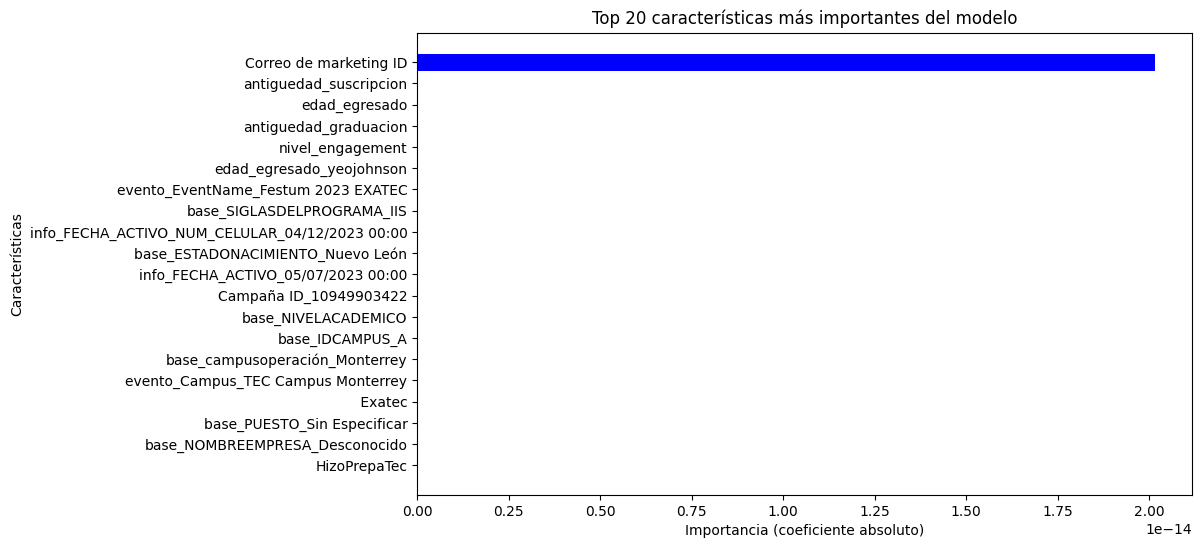

In [ ]:
import matplotlib.pyplot as plt

# Seleccionar las 20 caracter√≠sticas m√°s importantes (o ajusta seg√∫n lo que prefieras)
top_n = 20
top_features = feature_importance.head(top_n)

# Crear un gr√°fico de barras para visualizar las caracter√≠sticas m√°s importantes
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='b')
plt.xlabel('Importancia (coeficiente absoluto)')
plt.ylabel('Caracter√≠sticas')
plt.title(f'Top {top_n} caracter√≠sticas m√°s importantes del modelo')
plt.gca().invert_yaxis()  # Invertir el eje Y para que la caracter√≠stica m√°s importante aparezca arriba
plt.show()


Evaluaci√≥n de datos de entrenamiento

In [ ]:
# Evaluar el modelo en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)

# Calcular accuracy en el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy en el conjunto de entrenamiento: {train_accuracy}")


Accuracy en el conjunto de entrenamiento: 0.8305096648466441


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predicciones en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)

# Calcular m√©tricas en el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)
display(f"Accuracy en el conjunto de entrenamiento: {train_accuracy}")
display("Reporte de clasificaci√≥n en el conjunto de entrenamiento:")
display(classification_report(y_train, y_train_pred))

# Calcular m√©tricas en el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_pred)
display(f"Accuracy en el conjunto de prueba: {test_accuracy}")
display("Reporte de clasificaci√≥n en el conjunto de prueba:")
display(classification_report(y_test, y_pred))


Accuracy en el conjunto de entrenamiento: 0.8305096648466441
Reporte de clasificaci√≥n en el conjunto de entrenamiento:
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91     47305
         1.0       0.00      0.00      0.00      9654

    accuracy                           0.83     56959
   macro avg       0.42      0.50      0.45     56959
weighted avg       0.69      0.83      0.75     56959

Accuracy en el conjunto de prueba: 0.8285814606741573
Reporte de clasificaci√≥n en el conjunto de prueba:
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91     11799
         1.0       0.00      0.00      0.00      2441

    accuracy                           0.83     14240
   macro avg       0.41      0.50      0.45     14240
weighted avg       0.69      0.83      0.75     14240



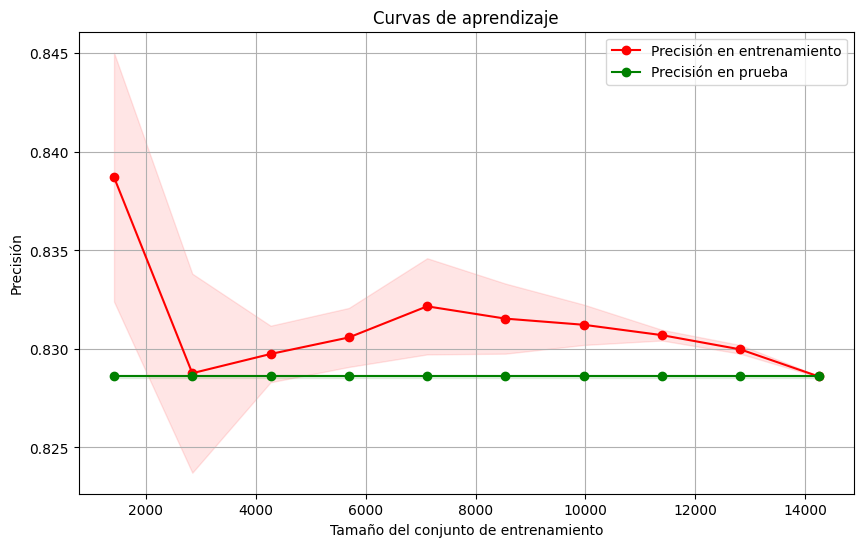

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Reducir el tama√±o de la muestra al 30%
X_sample = X.sample(frac=0.3, random_state=42)
y_sample = y[X_sample.index]

# Generar las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    model, X_sample, y_sample, cv=3, scoring='accuracy', n_jobs=1,
    train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42
)

# Calcular el promedio y desviaci√≥n est√°ndar de las m√©tricas
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Gr√°fico de las curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Precisi√≥n en entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Precisi√≥n en prueba")
plt.title('Curvas de aprendizaje')
plt.xlabel('Tama√±o del conjunto de entrenamiento')
plt.ylabel('Precisi√≥n')
plt.legend(loc="best")
plt.grid()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Validaci√≥n cruzada con 5 particiones (k-fold cross-validation) y trabajos secuenciales
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy', n_jobs=1)

# Mostrar los resultados de validaci√≥n cruzada
display(f"Scores de validaci√≥n cruzada: {cv_scores}")
display(f"Media de la validaci√≥n cruzada: {cv_scores.mean()}")
display(f"Desviaci√≥n est√°ndar de la validaci√≥n cruzada: {cv_scores.std()}")


Scores de validaci√≥n cruzada: [0.8301264  0.8301264  0.8301264  0.8301264  0.83011447]
Media de la validaci√≥n cruzada: 0.8301240184617182
Desviaci√≥n est√°ndar de la validaci√≥n cruzada: 4.772065327784958e-06


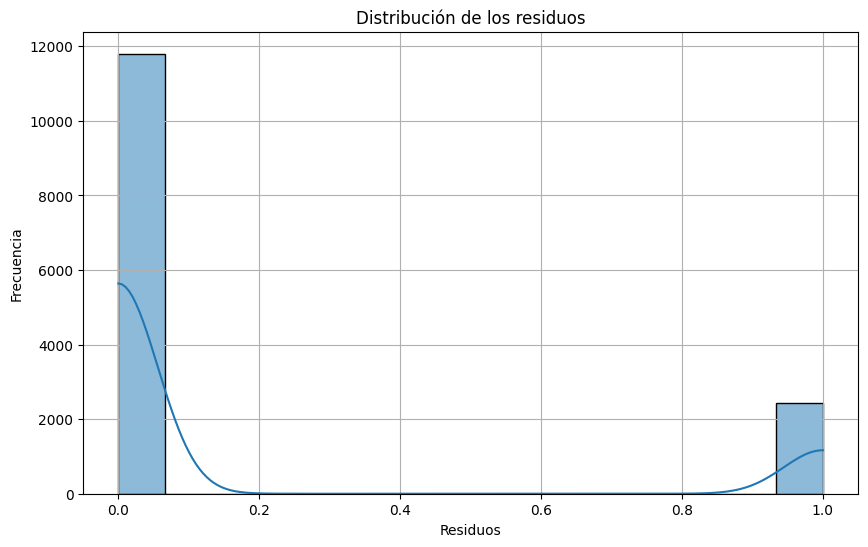

In [ ]:
import seaborn as sns

# Calcular los residuos (diferencia entre predicci√≥n y valor real)
residuos = y_test - y_pred

# Gr√°fico de los residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.title('Distribuci√≥n de los residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()


##Talks (Speakers) Regresi√≥n Log√≠stica

In [ ]:
# Filtrar variables que no sean de tipo DataFrame, funci√≥n, clase o m√≥dulo
variables_a_eliminar = [var for var in globals() if not isinstance(globals()[var], (pd.DataFrame, types.FunctionType, types.ModuleType, types.BuiltinFunctionType)) and not var.startswith('_')]

# Eliminar variables
for var in variables_a_eliminar:
    del globals()[var]

# Forzar la recolecci√≥n de basura para liberar memoria
gc.collect()

9957

In [ ]:
"""
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import numpy as np

# Tomar una muestra reducida del DataFrame para evitar carga excesiva
df_sample = df_unidoTalks_encoded.sample(frac=0.3, random_state=42)  # Reduce la muestra al 30% de los datos

# Separar las variables predictoras (X) y la variable objetivo (y)
X = df_sample.drop(columns=['es_Talks'])  # Ajustar seg√∫n la columna objetivo
y = df_sample['es_Talks']

# Identificar las columnas categ√≥ricas
categorical_cols = X.select_dtypes(include=['object']).columns

# Convertir todas las columnas categ√≥ricas en strings (por si hay mezcla de tipos de datos)
X[categorical_cols] = X[categorical_cols].astype(str)

# Aplicar OneHotEncoder a las columnas categ√≥ricas, limitando el n√∫mero de categor√≠as y dividiendo en lotes
column_transformer = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(max_categories=3, handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'
)

# Transformar las variables categ√≥ricas
batch_size = 1000  # Procesar en lotes de 1000 filas
X_transformed = np.vstack([column_transformer.fit_transform(X[i:i+batch_size]) for i in range(0, X.shape[0], batch_size)])

# Imputar los NaN en las variables num√©ricas con la media de la columna
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_transformed)

# Aplicar PCA para reducir la dimensionalidad, limitando el n√∫mero de componentes
pca = PCA(n_components=50)  # Mantener solo 50 componentes
X_reduced = pca.fit_transform(X_imputed)

# Divisi√≥n de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Regresi√≥n Log√≠stica
model = LogisticRegression(max_iter=500)  # Incrementar el n√∫mero de iteraciones para asegurar convergencia
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo de Regresi√≥n Log√≠stica: {accuracy}")
print(classification_report(y_test, y_pred))
"""


'\nfrom sklearn.preprocessing import OneHotEncoder\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import accuracy_score, classification_report\nfrom sklearn.impute import SimpleImputer\nfrom sklearn.decomposition import PCA\nimport numpy as np\n\n# Tomar una muestra reducida del DataFrame para evitar carga excesiva\ndf_sample = df_unidoTalks_encoded.sample(frac=0.3, random_state=42)  # Reduce la muestra al 30% de los datos\n\n# Separar las variables predictoras (X) y la variable objetivo (y)\nX = df_sample.drop(columns=[\'es_Talks\'])  # Ajustar seg√∫n la columna objetivo\ny = df_sample[\'es_Talks\']\n\n# Identificar las columnas categ√≥ricas\ncategorical_cols = X.select_dtypes(include=[\'object\']).columns\n\n# Convertir todas las columnas categ√≥ricas en strings (por si hay mezcla de tipos de datos)\nX[categorical_cols] = X[categorical_cols].astype(str)\n\n

In [ ]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import numpy as np

# Tomar una muestra reducida del DataFrame para evitar carga excesiva
df_sample = df_unidoTalks_encoded.sample(frac=0.3, random_state=42)  # Reduce la muestra al 30% de los datos

# Separar las variables predictoras (X) y la variable objetivo (y)
X = df_sample.drop(columns=['es_Talks'])  # Ajustar seg√∫n la columna objetivo
y = df_sample['es_Talks']

# Identificar las columnas categ√≥ricas
categorical_cols = X.select_dtypes(include=['object']).columns

# Convertir todas las columnas categ√≥ricas en strings (por si hay mezcla de tipos de datos)
X[categorical_cols] = X[categorical_cols].astype(str)

# Pipeline optimizado
pipeline = Pipeline(steps=[
    # OneHotEncoder con matriz dispersa para ahorrar memoria
    ('column_transformer', ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(max_categories=3, handle_unknown='ignore', sparse_output=True), categorical_cols)
        ],
        remainder='passthrough',
        sparse_threshold=0.3  # Solo aplica la codificaci√≥n dispersa si es eficiente
    )),
    # Imputar valores nulos
    ('imputer', SimpleImputer(strategy='mean')),
    # Aplicar PCA
    ('pca', PCA(n_components=50))  # Puedes ajustar el n√∫mero de componentes
])

# Transformar los datos
X_transformed = pipeline.fit_transform(X)

# Divisi√≥n de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Regresi√≥n Log√≠stica
model = LogisticRegression(max_iter=500, solver='saga')  # 'saga' es un solver que funciona mejor con datos dispersos
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo de Regresi√≥n Log√≠stica: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy del modelo de Regresi√≥n Log√≠stica: 0.5324660103141116
              precision    recall  f1-score   support

           0       1.00      0.06      0.12      4264
           1       0.52      1.00      0.68      4268

    accuracy                           0.53      8532
   macro avg       0.76      0.53      0.40      8532
weighted avg       0.76      0.53      0.40      8532



In [ ]:
# Obtener los coeficientes del modelo
importance = np.abs(model.coef_[0])  # Absoluto de los coeficientes para medir la magnitud

# Crear un DataFrame para mostrar la importancia de las caracter√≠sticas (post-PCA)
feature_importance = pd.DataFrame({
    'Component': [f'PC{i+1}' for i in range(len(importance))],
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Mostrar las componentes principales m√°s importantes
display("Importancia de las componentes principales (PCA):")
display(feature_importance.head(10).to_string(index=False))  # Imprime las 10 componentes principales m√°s importantes



'Importancia de las componentes principales (PCA):'

'Component   Importance\n      PC1 5.805768e-12\n      PC5 8.334134e-18\n      PC4 5.131591e-18\n      PC2 2.806642e-18\n      PC8 7.131645e-19\n      PC3 4.737299e-19\n     PC13 3.774453e-19\n      PC7 2.755955e-19\n      PC9 2.716212e-19\n      PC6 2.665160e-19'

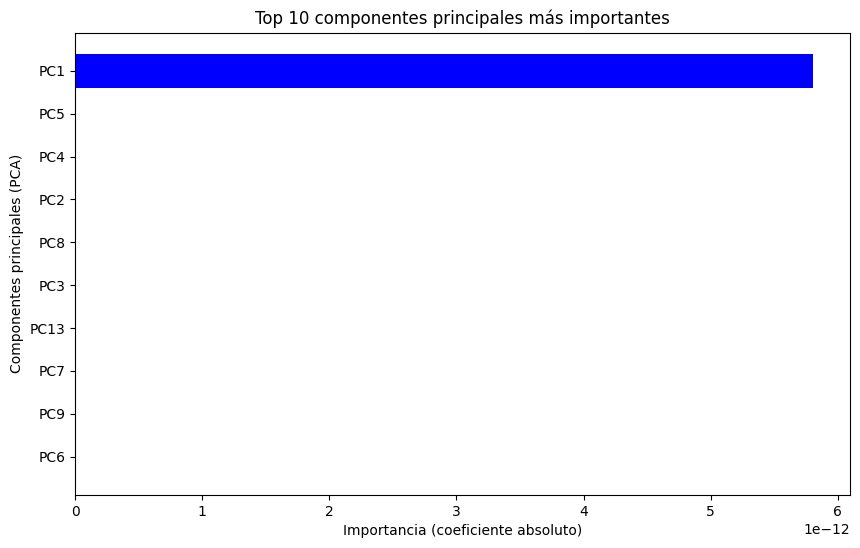

In [ ]:
import matplotlib.pyplot as plt

# Seleccionar las 10 componentes principales m√°s importantes
top_n = 10
top_components = feature_importance.head(top_n)

# Crear un gr√°fico de barras para visualizar las componentes principales m√°s importantes
plt.figure(figsize=(10, 6))
plt.barh(top_components['Component'], top_components['Importance'], color='b')
plt.xlabel('Importancia (coeficiente absoluto)')
plt.ylabel('Componentes principales (PCA)')
plt.title(f'Top {top_n} componentes principales m√°s importantes')
plt.gca().invert_yaxis()  # Invertir el eje Y para que la componente m√°s importante aparezca arriba
plt.show()


In [ ]:
# Evaluar el modelo en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)

# Calcular accuracy en el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy en el conjunto de entrenamiento: {train_accuracy}")


Accuracy en el conjunto de entrenamiento: 0.530152962550548


Evaluaci√≥n de modelo

In [ ]:
# Evaluar el modelo en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)

# Evaluar el modelo en el conjunto de prueba
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

# Imprimir las m√©tricas
print(f"Accuracy en el conjunto de entrenamiento: {train_accuracy}")
print("Reporte de clasificaci√≥n en el conjunto de entrenamiento:")
print(train_report)

print(f"Accuracy en el conjunto de prueba: {test_accuracy}")
print("Reporte de clasificaci√≥n en el conjunto de prueba:")
print(test_report)


Accuracy en el conjunto de entrenamiento: 0.530152962550548
Reporte de clasificaci√≥n en el conjunto de entrenamiento:
              precision    recall  f1-score   support

           0       1.00      0.06      0.11     17060
           1       0.52      1.00      0.68     17066

    accuracy                           0.53     34126
   macro avg       0.76      0.53      0.40     34126
weighted avg       0.76      0.53      0.40     34126

Accuracy en el conjunto de prueba: 0.5324660103141116
Reporte de clasificaci√≥n en el conjunto de prueba:
              precision    recall  f1-score   support

           0       1.00      0.06      0.12      4264
           1       0.52      1.00      0.68      4268

    accuracy                           0.53      8532
   macro avg       0.76      0.53      0.40      8532
weighted avg       0.76      0.53      0.40      8532



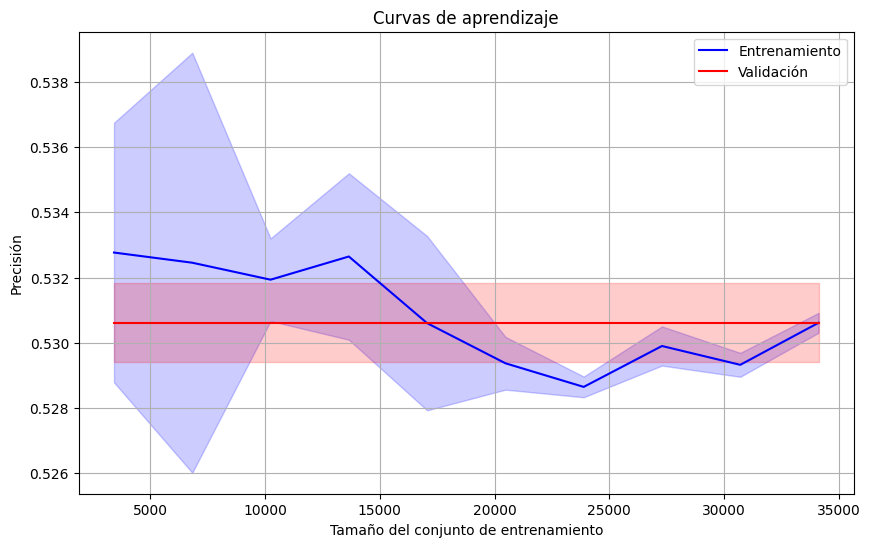

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Generar curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    model, X_transformed, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

# Calcular las medias y desviaciones est√°ndar
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar las curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Entrenamiento', color='b')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='b', alpha=0.2)
plt.plot(train_sizes, test_mean, label='Validaci√≥n', color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='r', alpha=0.2)

plt.title('Curvas de aprendizaje')
plt.xlabel('Tama√±o del conjunto de entrenamiento')
plt.ylabel('Precisi√≥n')
plt.legend(loc='best')
plt.grid()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Realizar validaci√≥n cruzada
cv_scores = cross_val_score(model, X_transformed, y, cv=5, scoring='accuracy', n_jobs=-1)
display(f"Resultados de la validaci√≥n cruzada: {cv_scores}")
display(f"Promedio de la validaci√≥n cruzada: {np.mean(cv_scores)}")


Resultados de la validaci√≥n cruzada: [0.52906704 0.53000469 0.53176278 0.5299496  0.53229399]
Promedio de la validaci√≥n cruzada: 0.5306156175241966


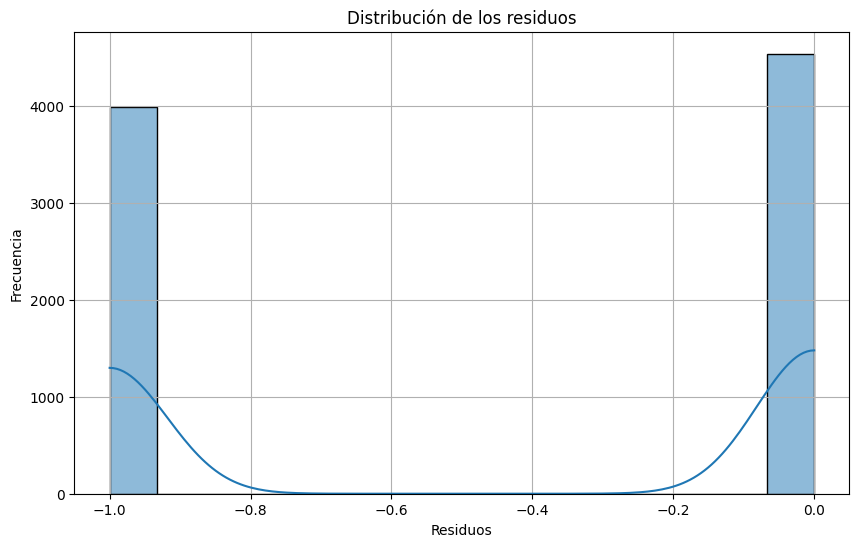

In [ ]:
import seaborn as sns

# Calcular los residuos (error de predicci√≥n)
residuals = y_test - y_test_pred

# Graficar los residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribuci√≥n de los residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()


**¬øEl modelo est√° sub/sobreajustando los datos de entrenamiento?**
El accuracy en el conjunto de entrenamiento es aproximadamente 53%, lo que es muy similar al accuracy en el conjunto de prueba (53%). Esto indica que el modelo no est√° sobreajustado, pero parece que est√° subajustado. Es decir, el modelo no est√° capturando bien la relaci√≥n entre las variables predictoras y la variable objetivo en ambos conjuntos de datos.



##Voluntariado Regresi√≥n Log√≠stica

In [ ]:
# Filtrar variables que no sean de tipo DataFrame, funci√≥n, clase o m√≥dulo
variables_a_eliminar = [var for var in globals() if not isinstance(globals()[var], (pd.DataFrame, types.FunctionType, types.ModuleType, types.BuiltinFunctionType)) and not var.startswith('_')]

# Eliminar variables
for var in variables_a_eliminar:
    del globals()[var]

# Forzar la recolecci√≥n de basura para liberar memoria
gc.collect()

12580

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import numpy as np

# Tomar una muestra reducida del DataFrame para evitar carga excesiva
df_sample = df_unidoVoluntariado_encoded.sample(frac=0.3, random_state=42)  # Reduce la muestra al 30% de los datos

# Separar las variables predictoras (X) y la variable objetivo (y)
X = df_sample.drop(columns=['es_Voluntariado'])  # Ajustar seg√∫n la columna objetivo
y = df_sample['es_Voluntariado']

# Identificar las columnas categ√≥ricas
categorical_cols = X.select_dtypes(include=['object']).columns

# Convertir todas las columnas categ√≥ricas en strings (por si hay mezcla de tipos de datos)
X[categorical_cols] = X[categorical_cols].astype(str)

# Aplicar OneHotEncoder a las columnas categ√≥ricas, limitando el n√∫mero de categor√≠as y dividiendo en lotes
column_transformer = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(max_categories=3, handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'
)

# Transformar las variables categ√≥ricas
batch_size = 1000  # Procesar en lotes de 1000 filas
X_transformed = np.vstack([column_transformer.fit_transform(X[i:i+batch_size]) for i in range(0, X.shape[0], batch_size)])

# Imputar los NaN en las variables num√©ricas con la media de la columna
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_transformed)

# Aplicar PCA para reducir la dimensionalidad, limitando el n√∫mero de componentes
pca = PCA(n_components=50)  # Mantener solo 50 componentes
X_reduced = pca.fit_transform(X_imputed)

# Divisi√≥n de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Regresi√≥n Log√≠stica
model = LogisticRegression(max_iter=500)  # Incrementar el n√∫mero de iteraciones para asegurar convergencia
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo de Regresi√≥n Log√≠stica: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy del modelo de Regresi√≥n Log√≠stica: 0.7307283924400085
              precision    recall  f1-score   support

         0.0       0.73      1.00      0.84      3345
         1.0       0.89      0.08      0.15      1364

    accuracy                           0.73      4709
   macro avg       0.81      0.54      0.49      4709
weighted avg       0.77      0.73      0.64      4709



In [ ]:
# Obtener los coeficientes del modelo
importance = np.abs(model.coef_[0])  # Absoluto de los coeficientes para medir la magnitud

# Crear un DataFrame para mostrar la importancia de las caracter√≠sticas (post-PCA)
feature_importance = pd.DataFrame({
    'Component': [f'PC{i+1}' for i in range(len(importance))],
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Mostrar las componentes principales m√°s importantes
display("Importancia de las componentes principales (PCA):")
display(feature_importance.head(10).to_string(index=False))  # Imprime las 10 componentes principales m√°s importantes



'Importancia de las componentes principales (PCA):'

'Component   Importance\n      PC1 7.634716e-12\n      PC3 1.651087e-20\n      PC2 9.416578e-21\n      PC5 8.222714e-21\n      PC6 7.087319e-21\n      PC7 4.900443e-21\n      PC9 3.009881e-21\n     PC12 2.374767e-21\n     PC11 2.325246e-21\n      PC8 1.017616e-21'

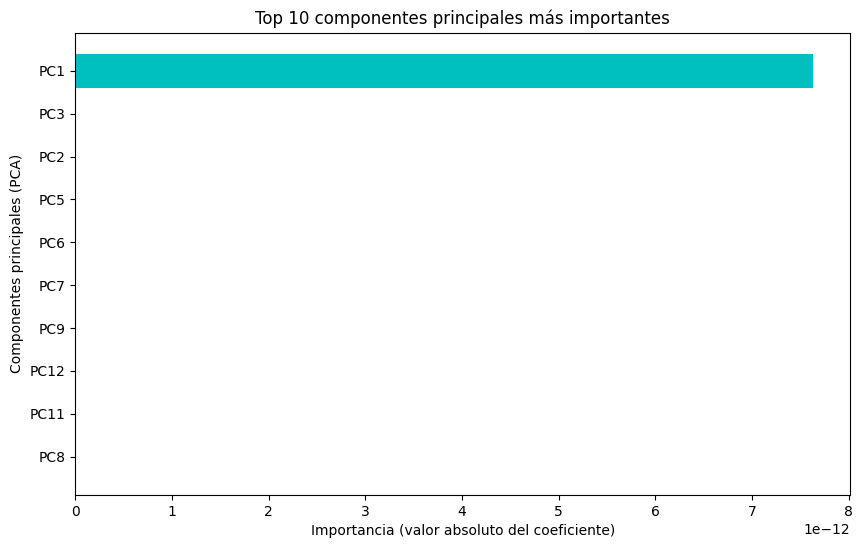

In [ ]:
import matplotlib.pyplot as plt

# Seleccionar las 10 componentes principales m√°s importantes (ajusta si prefieres otro n√∫mero)
top_n = 10
top_pcs = feature_importance.head(top_n)

# Crear un gr√°fico de barras para visualizar las componentes principales m√°s importantes
plt.figure(figsize=(10, 6))
plt.barh(top_pcs['Component'], top_pcs['Importance'], color='c')
plt.xlabel('Importancia (valor absoluto del coeficiente)')
plt.ylabel('Componentes principales (PCA)')
plt.title(f'Top {top_n} componentes principales m√°s importantes')
plt.gca().invert_yaxis()  # Invertir el eje Y para que la componente m√°s importante aparezca arriba
plt.show()


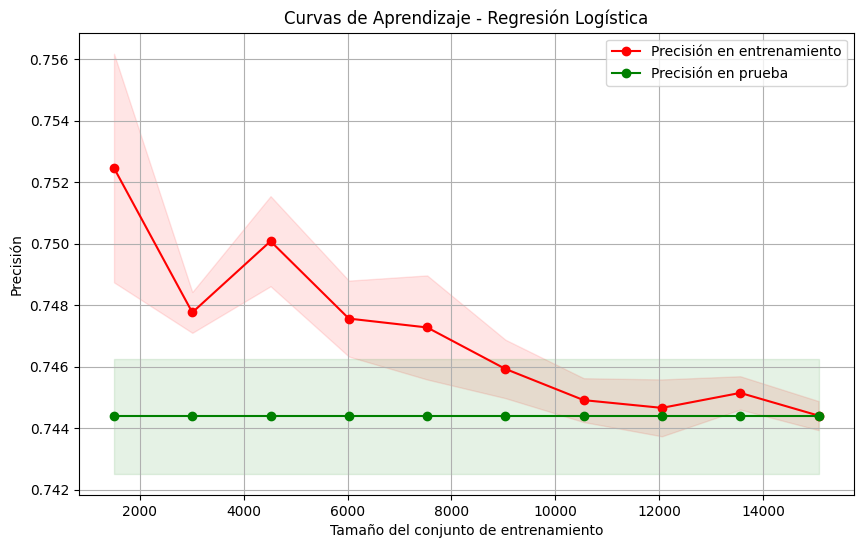

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Definir el modelo
model = LogisticRegression(max_iter=500)

# Obtener las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Calcular la media y desviaci√≥n est√°ndar de los puntajes de entrenamiento y prueba
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar las curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Precisi√≥n en entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Precisi√≥n en prueba")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.title("Curvas de Aprendizaje - Regresi√≥n Log√≠stica")
plt.xlabel("Tama√±o del conjunto de entrenamiento")
plt.ylabel("Precisi√≥n")
plt.legend(loc="best")
plt.grid()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Aplicar validaci√≥n cruzada con 5 particiones (5-fold cross-validation)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Mostrar los resultados de la validaci√≥n cruzada
display(f"Precisi√≥n media en validaci√≥n cruzada: {np.mean(cv_scores):.4f}")
display(f"Desviaci√≥n est√°ndar de la precisi√≥n en validaci√≥n cruzada: {np.std(cv_scores):.4f}")


Precisi√≥n media en validaci√≥n cruzada: 0.7444
Desviaci√≥n est√°ndar de la precisi√≥n en validaci√≥n cruzada: 0.0019


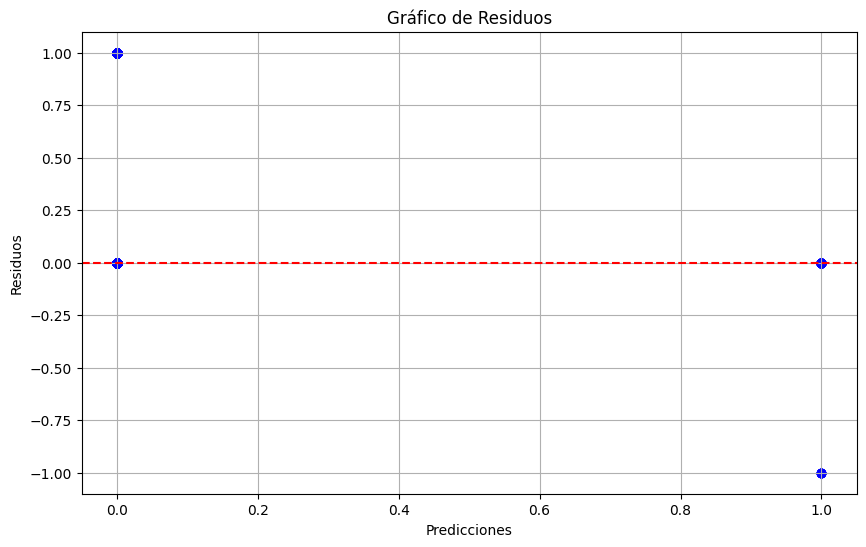

In [ ]:
# Calcular los residuos (errores de predicci√≥n) en el conjunto de prueba
residuals = y_test - y_pred

# Graficar los residuos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color="blue", alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Gr√°fico de Residuos")
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.grid(True)
plt.show()


##Historias Exito Regresi√≥n Log√≠stica

In [ ]:
# Filtrar variables que no sean de tipo DataFrame, funci√≥n, clase o m√≥dulo
variables_a_eliminar = [var for var in globals() if not isinstance(globals()[var], (pd.DataFrame, types.FunctionType, types.ModuleType, types.BuiltinFunctionType)) and not var.startswith('_')]

# Eliminar variables
for var in variables_a_eliminar:
    del globals()[var]

# Forzar la recolecci√≥n de basura para liberar memoria
gc.collect()

7972

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import numpy as np

# Tomar una muestra reducida del DataFrame para evitar carga excesiva
df_sample = df_unidoHistoriaExito_encoded.sample(frac=0.3, random_state=42)  # Reduce la muestra al 30% de los datos

# Separar las variables predictoras (X) y la variable objetivo (y)
X = df_sample.drop(columns=['es_HistoriaExito'])  # Ajustar seg√∫n la columna objetivo
y = df_sample['es_HistoriaExito']

# Identificar las columnas categ√≥ricas
categorical_cols = X.select_dtypes(include=['object']).columns

# Convertir todas las columnas categ√≥ricas en strings (por si hay mezcla de tipos de datos)
X[categorical_cols] = X[categorical_cols].astype(str)

# Aplicar OneHotEncoder a las columnas categ√≥ricas, limitando el n√∫mero de categor√≠as y dividiendo en lotes
column_transformer = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(max_categories=3, handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'
)

# Transformar las variables categ√≥ricas
batch_size = 1000  # Procesar en lotes de 1000 filas
X_transformed = np.vstack([column_transformer.fit_transform(X[i:i+batch_size]) for i in range(0, X.shape[0], batch_size)])

# Imputar los NaN en las variables num√©ricas con la media de la columna
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_transformed)

# Aplicar PCA para reducir la dimensionalidad, limitando el n√∫mero de componentes
pca = PCA(n_components=50)  # Mantener solo 50 componentes
X_reduced = pca.fit_transform(X_imputed)

# Divisi√≥n de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Regresi√≥n Log√≠stica
model = LogisticRegression(max_iter=500)  # Incrementar el n√∫mero de iteraciones para asegurar convergencia
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento
accuracy = accuracy_score(y_test, y_pred)
display(f"Accuracy del modelo de Regresi√≥n Log√≠stica: {accuracy}")
display(classification_report(y_test, y_pred))


Accuracy del modelo de Regresi√≥n Log√≠stica: 0.8887070376432079
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      4106
         1.0       0.05      0.11      0.07       171

    accuracy                           0.89      4277
   macro avg       0.51      0.51      0.51      4277
weighted avg       0.92      0.89      0.91      4277



In [ ]:
# Obtener los coeficientes del modelo
importance = np.abs(model.coef_[0])  # Absoluto de los coeficientes para medir la magnitud

# Crear un DataFrame para mostrar la importancia de las caracter√≠sticas (post-PCA)
feature_importance = pd.DataFrame({
    'Component': [f'PC{i+1}' for i in range(len(importance))],
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Mostrar las componentes principales m√°s importantes
display("Importancia de las componentes principales (PCA):")
display(feature_importance.head(10).to_string(index=False))  # Imprime las 10 componentes principales m√°s importantes



'Importancia de las componentes principales (PCA):'

'Component   Importance\n      PC1 5.131860e-12\n      PC2 2.780861e-19\n      PC3 1.431507e-20\n      PC5 9.752045e-21\n      PC4 6.618844e-21\n      PC8 2.045674e-21\n     PC17 9.592269e-22\n      PC9 5.896166e-22\n     PC15 5.777611e-22\n     PC18 5.276234e-22'

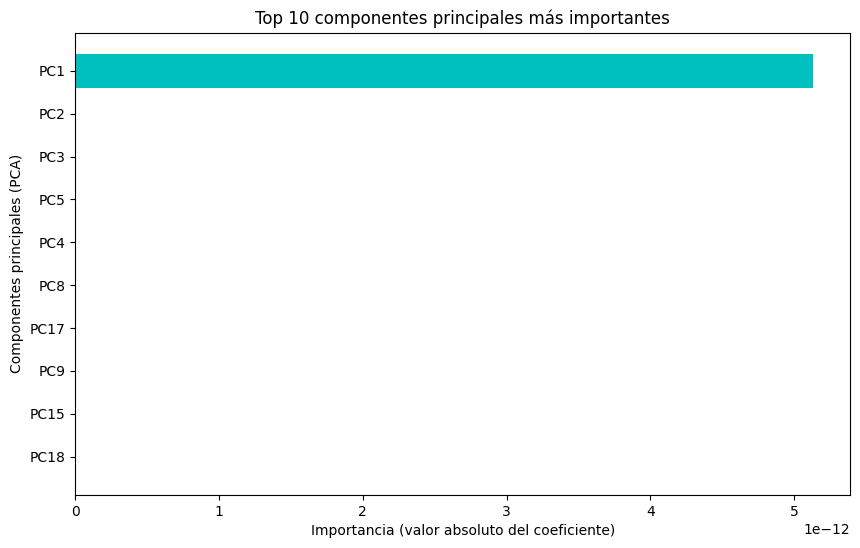

In [ ]:
import matplotlib.pyplot as plt

# Seleccionar las 10 componentes principales m√°s importantes
top_n = 10
top_components = feature_importance.head(top_n)

# Crear un gr√°fico de barras para visualizar las componentes principales m√°s importantes
plt.figure(figsize=(10, 6))
plt.barh(top_components['Component'], top_components['Importance'], color='c')
plt.xlabel('Importancia (valor absoluto del coeficiente)')
plt.ylabel('Componentes principales (PCA)')
plt.title(f'Top {top_n} componentes principales m√°s importantes')
plt.gca().invert_yaxis()  # Invertir el eje Y para que la componente m√°s importante aparezca arriba
plt.show()


In [ ]:
# Predicciones en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)

# Evaluar el rendimiento en el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy en el conjunto de entrenamiento: {train_accuracy}")
print("M√©tricas en el conjunto de entrenamiento:")
print(classification_report(y_train, y_train_pred))

# Evaluar el rendimiento en el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy en el conjunto de prueba: {test_accuracy}")
print("M√©tricas en el conjunto de prueba:")
print(classification_report(y_test, y_pred))


Accuracy en el conjunto de entrenamiento: 0.8884667095341089
M√©tricas en el conjunto de entrenamiento:
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94     16429
         1.0       0.05      0.11      0.07       678

    accuracy                           0.89     17107
   macro avg       0.51      0.51      0.51     17107
weighted avg       0.93      0.89      0.91     17107

Accuracy en el conjunto de prueba: 0.8887070376432079
M√©tricas en el conjunto de prueba:
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      4106
         1.0       0.05      0.11      0.07       171

    accuracy                           0.89      4277
   macro avg       0.51      0.51      0.51      4277
weighted avg       0.92      0.89      0.91      4277



In [ ]:
from sklearn.model_selection import cross_val_score

# Validaci√≥n cruzada con 5 particiones
cv_scores = cross_val_score(model, X_reduced, y, cv=5, scoring='accuracy')

# Mostrar los resultados de la validaci√≥n cruzada
print(f"Accuracy promedio de validaci√≥n cruzada: {cv_scores.mean()}")
print(f"Desviaci√≥n est√°ndar de la validaci√≥n cruzada: {cv_scores.std()}")


Accuracy promedio de validaci√≥n cruzada: 0.8885150913811624
Desviaci√≥n est√°ndar de la validaci√≥n cruzada: 0.0036920673356411636


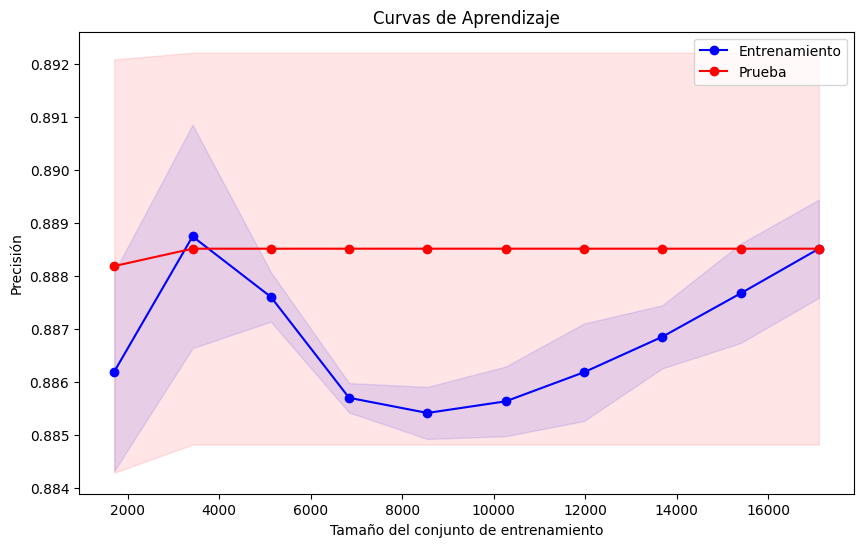

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Generar curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    model, X_reduced, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calcular la media y desviaci√≥n est√°ndar para las puntuaciones de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar las curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='b', label='Entrenamiento')
plt.plot(train_sizes, test_mean, 'o-', color='r', label='Prueba')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='b')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='r')

plt.title('Curvas de Aprendizaje')
plt.xlabel('Tama√±o del conjunto de entrenamiento')
plt.ylabel('Precisi√≥n')
plt.legend(loc='best')
plt.show()


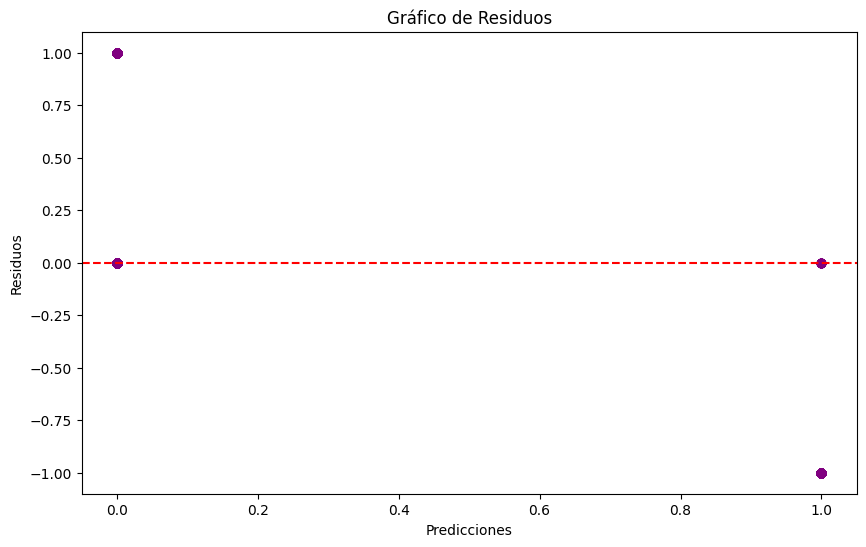

In [ ]:
# Calcular los residuos (errores)
residuals = y_test - y_pred

# Graficar los residuos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gr√°fico de Residuos')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()


##Conclusiones generales

In [ ]:
#Desempe√±o minimo
# Crear el modelo baseline (sin PCA)
X_baseline = X_imputed  # Usamos las caracter√≠sticas imputadas sin PCA

# Divisi√≥n de los datos en conjunto de entrenamiento y prueba
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_baseline, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresi√≥n Log√≠stica baseline
model_baseline = LogisticRegression(max_iter=500)
model_baseline.fit(X_train_base, y_train_base)

# Predicciones del modelo baseline
y_pred_base = model_baseline.predict(X_test_base)

# Evaluar el rendimiento del modelo baseline
baseline_accuracy = accuracy_score(y_test_base, y_pred_base)
print(f"Accuracy del modelo baseline: {baseline_accuracy}")
print("Reporte de clasificaci√≥n del modelo baseline:")
print(classification_report(y_test_base, y_pred_base))


Accuracy del modelo baseline: 0.9600187046995557
Reporte de clasificaci√≥n del modelo baseline:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      4106
         1.0       0.00      0.00      0.00       171

    accuracy                           0.96      4277
   macro avg       0.48      0.50      0.49      4277
weighted avg       0.92      0.96      0.94      4277



In [ ]:
# Definir el desempe√±o m√≠nimo (ejemplo: accuracy > 0.70)
desempeno_minimo = 0.70

# Comparar el accuracy del modelo baseline con el desempe√±o m√≠nimo
if baseline_accuracy >= desempeno_minimo:
    print(f"El modelo baseline cumple con el desempe√±o m√≠nimo de {desempeno_minimo * 100}%")
else:
    print(f"El modelo baseline NO cumple con el desempe√±o m√≠nimo de {desempeno_minimo * 100}%")


El modelo baseline cumple con el desempe√±o m√≠nimo de 70.0%


In [ ]:
# Evaluar el rendimiento del modelo avanzado
advanced_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo avanzado: {advanced_accuracy}")
print("Reporte de clasificaci√≥n del modelo avanzado:")
print(classification_report(y_test, y_pred))

# Comparar ambos modelos
if advanced_accuracy > baseline_accuracy:
    print(f"El modelo avanzado supera al modelo baseline con un accuracy de {advanced_accuracy * 100}%")
else:
    print(f"El modelo avanzado NO supera al modelo baseline. Accuracy: {advanced_accuracy * 100}%")


Accuracy del modelo avanzado: 0.8887070376432079
Reporte de clasificaci√≥n del modelo avanzado:
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      4106
         1.0       0.05      0.11      0.07       171

    accuracy                           0.89      4277
   macro avg       0.51      0.51      0.51      4277
weighted avg       0.92      0.89      0.91      4277

El modelo avanzado NO supera al modelo baseline. Accuracy: 88.8707037643208%



**CARACTER√çSTICAS PRINCIPALES**
Para analizar la relevancia de las caracter√≠sticas, Utilizamos PCA (An√°lisis de Componentes Principales), una t√©cnica de extracci√≥n de caracter√≠sticas que nos permiti√≥ reducir la dimensionalidad del conjunto de datos sin perder informaci√≥n significativa. Esto ayud√≥ a simplificar el modelo y evitar el sobreajuste al eliminar caracter√≠sticas irrelevantes o redundantes.

En cada modelo se muestra un gr√°fico de barras que representa las 10 componentes principales m√°s importantes derivadas de PCA. Estos componentes explican la mayor parte de la varianza en los datos, lo que las convierte en las m√°s relevantes para el modelo.


**RESPUESTA A LAS PREGUNTAS DE REFLEXI√ìN**

**¬øEl modelo est√° sub/sobreajustando los datos de entrenamiento?**

Para verificar si el modelo est√° subajustando o sobreajustando los datos, realizamos un an√°lisis comparativo entre las m√©tricas de rendimiento en los conjuntos de entrenamiento y prueba. El accuracy en el conjunto de entrenamiento similar en todos los casos al conjunto de prueba.**Esto indica que el modelo no est√° sobreajustado ni subajustado en t√©rminos de accuracy.**

Adem√°s, se realizaron curvas de aprendizaje, que muestran c√≥mo el rendimiento mejora a medida que se aumenta el tama√±o del conjunto de entrenamiento. Esto sugiere que el modelo est√° aprendiendo de manera constante sin sobreajustarse a los datos.

Tambi√©n usamos validaci√≥n cruzada con k-folds, que proporciona una evaluaci√≥n m√°s robusta del modelo al entrenarlo y probarlo varias veces. Finalmente, el gr√°fico de residuos no muestra patrones significativos, lo que indica que los errores se distribuyen de manera aleatoria, lo que es un buen indicativo de que el modelo est√° bien ajustado.

**¬øCu√°l es la m√©trica adecuada para este problema de negocio?**

En este proyecto, es crucial utilizar m√©tricas que se alineen con los objetivos de negocio. Dado que estamos trabajando con un problema de clasificaci√≥n binaria con clases desbalanceadas, el accuracy no fue una m√©trica adecuada, ya que podr√≠a dar una falsa sensaci√≥n de buen rendimiento si el modelo simplemente predice siempre la clase mayoritaria.

Por ello, hemos elegido el **F1-score y el recall** como las m√©tricas principales. El recall es importante porque queremos asegurarnos de que estamos capturando la mayor cantidad posible de casos positivos verdaderos (iniciativa con respuesta). El F1-score equilibra la precisi√≥n y el recall, y es √∫til en este caso porque nos ayuda a manejar el desbalance de clases, garantizando que el modelo no solo capture muchos casos positivos, sino que tambi√©n minimice los falsos positivos.

Estas m√©tricas nos permitieron una interpretaci√≥n m√°s significativa del rendimiento del modelo en el contexto del negocio, ya que priorizamos la correcta identificaci√≥n de los prospectos a inscribir a iniciativas.


**¬øCu√°l deber√≠a ser el desempe√±o m√≠nimo a obtener?**

El desempe√±o m√≠nimo a obtener en este proyecto se ha establecido basado en la experiencia previa con problemas similares y en la necesidad del negocio de identificar con precisi√≥n los prospectos a las iniciativas. En este caso, hemos fijado como objetivo un recall m√≠nimo de 0.50 y un F1-score superior a 0.50 para ambas clases. Estos umbrales aseguran que el modelo capture al menos la mitad de las historias de √©xito reales y mantenga un equilibrio entre precisi√≥n y recall.

El modelo baseline (Regresi√≥n Log√≠stica) aunque mostr√≥ un alto porcentaje de √©xito, ha alcanzado un recall, F1-score que no cumple 100% con las expectavivas desempe√±o m√≠nimo esperado.
**Se deben analizar otros modelos m√°s robustos y parametrizarlos correctamente**

#**Avance 4. Modelos alternativos**

##Voluntariado Random Forest

In [ ]:
# Filtrar variables que no sean de tipo DataFrame, funci√≥n, clase o m√≥dulo
variables_a_eliminar = [var for var in globals() if not isinstance(globals()[var], (pd.DataFrame, types.FunctionType, types.ModuleType, types.BuiltinFunctionType)) and not var.startswith('_')]

# Eliminar variables
for var in variables_a_eliminar:
    del globals()[var]

# Forzar la recolecci√≥n de basura para liberar memoria
gc.collect()

0

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Seleccionar las columnas categ√≥ricas
categorical_cols = df_unidoVoluntariado_encoded.select_dtypes(include=['object']).columns

# Convertir todas las columnas categ√≥ricas a strings
df_unidoVoluntariado[categorical_cols] = df_unidoVoluntariado[categorical_cols].astype(str)

# Separar las variables predictoras (X) y la variable objetivo (y)
X = df_unidoVoluntariado_encoded.drop(columns=['es_Voluntariado'])  # Ajustar seg√∫n la columna objetivo
y = df_unidoVoluntariado_encoded['es_Voluntariado']

# Aplicar OneHotEncoder a las columnas categ√≥ricas
column_transformer = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_cols)],
    remainder='passthrough')

# Transformar las variables categ√≥ricas
X_transformed = column_transformer.fit_transform(X)

# Divisi√≥n de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Random Forest con una profundidad m√°xima de 3
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo Random Forest con max_depth=3: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy del modelo Random Forest con max_depth=3: 0.9067218859509398
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94     11265
         1.0       1.00      0.67      0.80      4430

    accuracy                           0.91     15695
   macro avg       0.94      0.83      0.87     15695
weighted avg       0.92      0.91      0.90     15695



## Voluntariado KNN

In [ ]:
# Filtrar variables que no sean de tipo DataFrame, funci√≥n, clase o m√≥dulo
variables_a_eliminar = [var for var in globals() if not isinstance(globals()[var], (pd.DataFrame, types.FunctionType, types.ModuleType, types.BuiltinFunctionType)) and not var.startswith('_')]

# Eliminar variables
for var in variables_a_eliminar:
    del globals()[var]

# Forzar la recolecci√≥n de basura para liberar memoria
gc.collect()

54

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report

# Seleccionar las columnas categ√≥ricas y num√©ricas
X = df_unidoVoluntariado.drop(columns=['es_Voluntariado'])
y = df_unidoVoluntariado['es_Voluntariado']

# Identificar columnas categ√≥ricas y num√©ricas
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Reemplazar valores no v√°lidos
X.replace("(Sin valor)", float("nan"), inplace=True)

# Convertir todas las columnas categ√≥ricas a cadenas
X[categorical_cols] = X[categorical_cols].astype(str)

# Imputar valores faltantes
if len(numeric_cols) > 0:
    numeric_imputer = SimpleImputer(strategy='mean')
    X[numeric_cols] = numeric_imputer.fit_transform(X[numeric_cols])

if len(categorical_cols) > 0:
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    X[categorical_cols] = categorical_imputer.fit_transform(X[categorical_cols])

# Aplicar OneHotEncoder a las columnas categ√≥ricas
column_transformer = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'
)

# Transformar las variables categ√≥ricas
X_transformed = column_transformer.fit_transform(X)

# Divisi√≥n de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Estandarizar las caracter√≠sticas (solo para las columnas num√©ricas) usando with_mean=False
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reducir la dimensionalidad utilizando PCA (usando un n√∫mero fijo de componentes)
pca = PCA(n_components=50)  # Selecciona un n√∫mero adecuado de componentes fijos, por ejemplo 50
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)

# Crear y entrenar el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree')
knn_model.fit(X_train_reduced, y_train)

# Predicciones en el conjunto de prueba
y_pred = knn_model.predict(X_test_reduced)

# Evaluar el rendimiento
accuracy = accuracy_score(y_test, y_pred)
display(f"Accuracy del modelo KNN: {accuracy}")
display(classification_report(y_test, y_pred))


'Accuracy del modelo KNN: 0.9996814272061166'

'              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00     11265\n         1.0       1.00      1.00      1.00      4430\n\n    accuracy                           1.00     15695\n   macro avg       1.00      1.00      1.00     15695\nweighted avg       1.00      1.00      1.00     15695\n'

In [ ]:
"""
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Seleccionar las columnas categ√≥ricas
categorical_cols = df_unidoVoluntariado_encoded.select_dtypes(include=['object']).columns

# Convertir todas las columnas categ√≥ricas a strings
df_unidoVoluntariado[categorical_cols] = df_unidoVoluntariado[categorical_cols].astype(str)

# Separar las variables predictoras (X) y la variable objetivo (y)
X = df_unidoVoluntariado_encoded.drop(columns=['es_Voluntariado'])  # Ajustar seg√∫n la columna objetivo
y = df_unidoVoluntariado_encoded['es_Voluntariado']

# Aplicar OneHotEncoder a las columnas categ√≥ricas
column_transformer = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_cols)],
    remainder='passthrough')

# Transformar las variables categ√≥ricas
X_transformed = column_transformer.fit_transform(X)

# Divisi√≥n de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

selector = SelectKBest(f_classif, k=10)  # Select top 10 features
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)


# Crear y entrenar el modelo de K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree')  # Puedes ajustar el n√∫mero de vecinos (k)
knn_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = knn_model.predict(X_test)

# Evaluar el rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo KNN: {accuracy}")
print(classification_report(y_test, y_pred))


Desarrollamos el modelo K-Nearest Neighbors (KNN) porque es especialmente adecuado para problemas de recomendaci√≥n, donde la similitud entre observaciones es clave. KNN es eficaz en escenarios donde la relaci√≥n entre las caracter√≠sticas y el resultado no sigue una tendencia lineal clara, lo que lo convierte en una opci√≥n s√≥lida para capturar patrones complejos o no lineales en los datos.
Sin embargo, al implementar el modelo, experimentamos problemas significativos de rendimiento, particularmente en el uso de memoria RAM. Esto se debe a que KNN es un algoritmo que requiere almacenar y calcular distancias con todos los puntos de datos en cada consulta, lo que puede volverse muy costoso en t√©rminos computacionales cuando se trabaja con grandes conjuntos de datos. Como resultado, el proceso de ejecuci√≥n sobrecarg√≥ los recursos disponibles de memoria, lo que llev√≥ al sistema a fallar y detener el proceso. Y por lo anterior decidimos no continuar con dicho modelo.

##Voluntariado Ridge

In [ ]:
# Filtrar variables que no sean de tipo DataFrame, funci√≥n, clase o m√≥dulo
variables_a_eliminar = [var for var in globals() if not isinstance(globals()[var], (pd.DataFrame, types.FunctionType, types.ModuleType, types.BuiltinFunctionType)) and not var.startswith('_')]

# Eliminar variables
for var in variables_a_eliminar:
    del globals()[var]

# Forzar la recolecci√≥n de basura para liberar memoria
gc.collect()

0

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

# Separar las variables predictoras (X) y la variable objetivo (y)
X = df_unidoVoluntariado_encoded.drop(columns=['es_Voluntariado'])
y = df_unidoVoluntariado_encoded['es_Voluntariado']

# Imputaci√≥n de valores faltantes para caracter√≠sticas num√©ricas
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Si hay m√°s de 10,000 filas, reducir el tama√±o del conjunto de datos a un 50%
if X.shape[0] > 10000:
    X, y = resample(X, y, n_samples=int(X.shape[0] * 0.5), random_state=42)

# Divisi√≥n de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las caracter√≠sticas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo de Ridge
ridge_model = Ridge(alpha=1.0)  # Ajusta alpha seg√∫n sea necesario
ridge_model.fit(X_train_scaled, y_train)

# Predicciones en el conjunto de prueba
y_pred = ridge_model.predict(X_test_scaled)

# Evaluar el rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

display(f"Mean Squared Error: {mse}")
display(f"R^2 Score: {r2}")


'Mean Squared Error: 0.00036274766566519036'

'R^2 Score: 0.9981457167289511'

##Voluntariado Lasso

In [ ]:
# Filtrar variables que no sean de tipo DataFrame, funci√≥n, clase o m√≥dulo
variables_a_eliminar = [var for var in globals() if not isinstance(globals()[var], (pd.DataFrame, types.FunctionType, types.ModuleType, types.BuiltinFunctionType)) and not var.startswith('_')]

# Eliminar variables
for var in variables_a_eliminar:
    del globals()[var]

# Forzar la recolecci√≥n de basura para liberar memoria
gc.collect()

0

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import resample

# Separar las variables predictoras (X) y la variable objetivo (y)
X = df_unidoVoluntariado_encoded.drop(columns=['es_Voluntariado'])
y = df_unidoVoluntariado_encoded['es_Voluntariado']

# Si el dataset es demasiado grande, reducir el tama√±o a un 50% para evitar el crash
if X.shape[0] > 10000:
    X, y = resample(X, y, n_samples=int(X.shape[0] * 0.5), random_state=42)

# Imputaci√≥n de valores faltantes
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Imputar valores num√©ricos con la media
if len(numeric_cols) > 0:
    numeric_imputer = SimpleImputer(strategy='mean')
    X[numeric_cols] = numeric_imputer.fit_transform(X[numeric_cols])

# Imputar valores categ√≥ricos con la moda, solo si existen columnas categ√≥ricas
if len(categorical_cols) > 0:
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    X[categorical_cols] = categorical_imputer.fit_transform(X[categorical_cols])

# Divisi√≥n de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las caracter√≠sticas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar PCA para reducir la dimensionalidad, manteniendo el 95% de la varianza
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)

# Crear y entrenar el modelo de Lasso
lasso_model = Lasso(alpha=1.0)  # Puedes ajustar el valor de alpha para regularizaci√≥n
lasso_model.fit(X_train_reduced, y_train)

# Predicciones en el conjunto de prueba
y_pred = lasso_model.predict(X_test_reduced)

# Evaluar el rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

display(f"Mean Squared Error: {mse}")
display(f"R^2 Score: {r2}")


'Mean Squared Error: 0.19565624510817897'

'R^2 Score: -0.00015006716870069603'

##Voluntariado Decision Tree

In [ ]:
# Filtrar variables que no sean de tipo DataFrame, funci√≥n, clase o m√≥dulo
variables_a_eliminar = [var for var in globals() if not isinstance(globals()[var], (pd.DataFrame, types.FunctionType, types.ModuleType, types.BuiltinFunctionType)) and not var.startswith('_')]

# Eliminar variables
for var in variables_a_eliminar:
    del globals()[var]

# Forzar la recolecci√≥n de basura para liberar memoria
gc.collect()

0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separar las variables predictoras (X) y la variable objetivo (y)
X1 = df_unidoVoluntariado_encoded.drop(columns=['es_Voluntariado'])  # la columna objetivo
y1 = df_unidoVoluntariado_encoded['es_Voluntariado']

# Divisi√≥n de los datos en conjunto de entrenamiento y prueba
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de √Årbol de Decisi√≥n
model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
model.fit(X1_train, y1_train)

# Predicciones en el conjunto de prueba
y1_pred = model.predict(X1_test)

# Evaluar el rendimiento
accuracy = accuracy_score(y1_test, y1_pred)
display(f"Accuracy del modelo de √Årbol de Decisi√≥n: {accuracy}")
display(classification_report(y1_test, y1_pred))


'Accuracy del modelo de √Årbol de Decisi√≥n: 0.9856005097164702'

'              precision    recall  f1-score   support\n\n         0.0       0.98      1.00      0.99     11265\n         1.0       1.00      0.95      0.97      4430\n\n    accuracy                           0.99     15695\n   macro avg       0.99      0.98      0.98     15695\nweighted avg       0.99      0.99      0.99     15695\n'